    Muhammad Faris Akbar
    Home Credit Data Science Project

# **Problem Statement**

Berdasarkan ketersediaan data dan pemahaman model bisnis yang terdapat pada perusahaan Home Credit, dikembangkan beberapa hipotesis masalah yang menjadi patokan analisis pada problem statement ini sebagai pengganti dari tidak adanya studi case.

## **Kelengkapan dan Variabel Data**
*   **Hipotesis 0** : Keseluruhan variabel data dapat digunakan untuk analisis statistik dan prediksi
*   **Hipotesis 1** : Hanya beberapa variabel data yang dapat digunakan untuk analisis statistik dan prediksi

## **Kelengkapan dan Korelasi Data**
*   **Hipotesis 0** : Tidak adanya korelasi antara variabel data dengan variabel target
*   **Hipotesis 1** : Adanya korelasi antara variabel data dengan variabel target

## **Kelengkapan dan kebersihan Data**
*   **Hipotesis 0** : Tidak adanya nilai kosong, duplikat atau outlier pada data
*   **Hipotesis 1** : Adanya nilai kosong, duplikat atau outlier pada data

Selanjutnya, dari pembuatan hipotesis ini, akan dibuktikan melalui serangkaian eksperimen menggunakan python dengan tujuan eksperimen adalah :

*   Mengetahui variabel mana yang paling berpengaruh dengan variabel targer
*   Mengetahui informasi yang terkandung dari setiap variabel guna menambah wawasan analisis
*   Mengetahui persebaran variabel data dan target guna memastikan ketepatan dari analisis prediksi
*   Memprediksi variabel target berdasarkan variabel data sebelumnya



# **Python Solution Implementation**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

from google.colab import drive
from scipy.stats import iqr

In [2]:
try:
  drive.mount('/content/drive', force_remount=True)
except Exception as e:
  print(f"Gagal menghubungkan ke Google Drive: {e}")

Mounted at /content/drive


In [3]:
base_path = "/content/drive/MyDrive/Dataset/"

train_data_path = "application_train.csv"
test_data_path = "application_test.csv"

train_path = os.path.join(base_path, train_data_path)
test_path = os.path.join(base_path, test_data_path)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

try:
  train_data = pd.read_csv(train_path)
  test_data = pd.read_csv(test_path)
except FileNotFoundError as e:
  print(f"Data {train_data_path} atau {test_data_path} Tidak Ditemukan")

In [4]:
train_data.head(5)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [5]:
test_data.head(5)

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

  NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0   Unaccompanied          Working               Higher education   
1   Unaccompanied          Working  Secondary / secondary special   
2             NaN          Working               Higher education   
3   Unaccompanied          Working  Secondary / secondary special   
4   Unaccompanied          Working  Secondary / secondary special   

  NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0            Married  House / apartment                    0.018850   
1            Married  House / apartment                    0.035792   
2            Married  House / apartment                    0.019101   
3            Married  House / apartment                    0.026392   
4            Married  House / apartment                    0.010032   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
0      -19241          -2329            -5170.0             -812          NaN   
1      -18064          -4469            -9118.0            -1623          NaN   
2      -20038          -4458            -2175.0            -3503          5.0   
3      -13976          -1866            -2000.0            -4208          NaN   
4      -13040          -2191            -4000.0            -4262         16.0   

   FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
0           1               1                0                 1           0   
1           1               1                0                 1           0   
2           1               1                0                 1           0   
3           1               1                0                 1           1   
4           1               1                1                 1           0   

   FLAG_EMAIL     OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0           1                 NaN              2.0                     2   
1           0  Low-skill Laborers              2.0                     2   
2           0             Drivers              2.0                     2   
3           0         Sales staff              4.0                     2   
4           0                 NaN              3.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                    TUESDAY   
1                            2                     FRIDAY   
2                            2                     MONDAY   
3                            2                  WEDNESDAY   
4                            2                     FRIDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       18                           0   
1                        9                           0   
2                       14                           0   
3                       11                           0   
4                        5                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                   

## **Data Understanding**

In [6]:
train_data.shape

(307511, 122)

In [7]:
train_data.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

In [8]:
train_data.describe(include='object')

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
count              307511      307511       307511          307511   
unique                  2           3            2               2   
top            Cash loans           F            N               Y   
freq               278232      202448       202924          213312   

       NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
count           306219           307511                         307511   
unique               7                8                              5   
top      Unaccompanied          Working  Secondary / secondary special   
freq            248526           158774                         218391   

       NAME_FAMILY_STATUS  NAME_HOUSING_TYPE OCCUPATION_TYPE  \
count              307511             307511          211120   
unique                  6                  6              18   
top               Married  House / apartment        Laborers   
freq               196432             272868           55186   

       WEEKDAY_APPR_PROCESS_START       ORGANIZATION_TYPE FONDKAPREMONT_MODE  \
count                      307511                  307511              97216   
unique                          7                      58                  4   
top                       TUESDAY  Business Entity Type 3   reg oper account   
freq                        53901                   67992              73830   

        HOUSETYPE_MODE WALLSMATERIAL_MODE EMERGENCYSTATE_MODE  
count           153214             151170              161756  
unique               3                  7                   2  
top     block of flats              Panel                  No  
freq            150503              66040              159428

In [9]:
train_data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

Untuk memastikan bahwa data yang akan dianalisis memang memiliki variasi yang cukup dan memiliki kombinasi informasi yang beragam akan dilakukan pemeriksaan jumlah nilai unik dalam data. Dimana jika data memiliki jumlah informasi sebesar 1 atau sebesar jumlah dari data, maka data tersebut akan dibuang untuk efektifitas analisis.

Untuk data yang memiliki variasi informasi yang terbatas, data akan disimpan sementara untuk analisis lebih lanjut secara terpisah.

In [10]:
drop_column = []
minimun_information_column = []

for col in train_data.columns:
  print(f"Column: {col} ({train_data[col].nunique()} Nilai Unique)")
  print(train_data[col].unique())
  print('\n')

  if train_data[col].nunique() == train_data.shape[0] or train_data[col].nunique() == 1:
    drop_column.append(col)
  elif train_data[col].nunique() == 2:
    minimun_information_column.append(col)

Column: SK_ID_CURR (307511 Nilai Unique)
[100002 100003 100004 ... 456253 456254 456255]


Column: TARGET (2 Nilai Unique)
[1 0]


Column: NAME_CONTRACT_TYPE (2 Nilai Unique)
['Cash loans' 'Revolving loans']


Column: CODE_GENDER (3 Nilai Unique)
['M' 'F' 'XNA']


Column: FLAG_OWN_CAR (2 Nilai Unique)
['N' 'Y']


Column: FLAG_OWN_REALTY (2 Nilai Unique)
['Y' 'N']


Column: CNT_CHILDREN (15 Nilai Unique)
[ 0  1  2  3  4  7  5  6  8  9 11 12 10 19 14]


Column: AMT_INCOME_TOTAL (2548 Nilai Unique)
[202500.  270000.   67500.  ...  96768.  546250.5 113062.5]


Column: AMT_CREDIT (5603 Nilai Unique)
[ 406597.5 1293502.5  135000.  ...  181989.   743863.5 1391130. ]


Column: AMT_ANNUITY (13672 Nilai Unique)
[24700.5 35698.5  6750.  ... 71986.5 58770.  77809.5]


Column: AMT_GOODS_PRICE (1002 Nilai Unique)
[ 351000.  1129500.   135000.  ...  453465.   143977.5  743863.5]


Column: NAME_TYPE_SUITE (7 Nilai Unique)
['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 

In [11]:
train_data.drop(columns=drop_column, inplace=True)

In [12]:
train_data.head(5)

TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0       1         Cash loans           M            N               Y   
1       0         Cash loans           F            N               N   
2       0    Revolving loans           M            Y               Y   
3       0         Cash loans           F            N               Y   
4       0         Cash loans           M            N               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          202500.0    406597.5      24700.5         351000.0   
1             0          270000.0   1293502.5      35698.5        1129500.0   
2             0           67500.0    135000.0       6750.0         135000.0   
3             0          135000.0    312682.5      29686.5         297000.0   
4             0          121500.0    513000.0      21865.5         513000.0   

  NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0   Unaccompanied          Working  Secondary / secondary special   
1          Family    State servant               Higher education   
2   Unaccompanied          Working  Secondary / secondary special   
3   Unaccompanied          Working  Secondary / secondary special   
4   Unaccompanied          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  Single / not married  House / apartment                    0.018801   
1               Married  House / apartment                    0.003541   
2  Single / not married  House / apartment                    0.010032   
3        Civil marriage  House / apartment                    0.008019   
4  Single / not married  House / apartment                    0.028663   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
0       -9461           -637            -3648.0            -2120          NaN   
1      -16765          -1188            -1186.0             -291          NaN   
2      -19046           -225            -4260.0            -2531         26.0   
3      -19005          -3039            -9833.0            -2437          NaN   
4      -19932          -3038            -4311.0            -3458          NaN   

   FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
0           1               1                0                 1           1   
1           1               1                0                 1           1   
2           1               1                1                 1           1   
3           1               1                0                 1           0   
4           1               1                0                 1           0   

   FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0           0        Laborers              1.0                     2   
1           0      Core staff              2.0                     1   
2           0        Laborers              1.0                     2   
3           0        Laborers              2.0                     2   
4           0      Core staff              1.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                  WEDNESDAY   
1                            1                     MONDAY   
2                            2                     MONDAY   
3                            2                  WEDNESDAY   
4                            2                   THURSDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                     

### **Function dan Procedure Section (Visualization)**

In [13]:
def visualize_plot(data, method='all', plot='boxplot', columns=None):
  """
  Procedure yang digunakan untuk menvisualisasikan plot boxplot, histogram, atau barplot.
  input   : data, method, columns
  output  : boxplot, histogram, barplot
  """
  try:
    if method not in ['all', 'column', 'columns']:
      raise ValueError("Metode tidak valid. Pilih salah satu dari 'all', 'column', 'columns'.")

    if plot not in ['boxplot', 'histogram', 'barplot']:
      raise ValueError("Plot tidak valid. Pilih salah satu dari 'boxplot', 'histogram', 'barplot'.")

    cols_to_plot = []

    if method == 'all':
      if plot == 'boxplot' or plot == 'histogram':
        cols_to_plot = data.select_dtypes(include=np.number).columns.tolist()
      elif plot == 'barplot':
        cols_to_plot = data.select_dtypes(exclude=np.number).columns.tolist()

    elif method == 'column':
      if not isinstance(columns, str):
          raise TypeError("Untuk metode 'column', argumen 'columns' harus berupa String.")
      if columns not in data.columns:
          raise KeyError(f"Kolom '{columns}' tidak ditemukan.")

      if plot == 'boxplot' or plot == 'histogram':
        if not np.issubdtype(data[columns].dtype, np.number):
          raise TypeError(f"Kolom '{columns}') bukan tipe numerik.")
      elif plot == 'barplot':
        if np.issubdtype(data[columns].dtype, np.number):
          raise TypeError(f"Kolom '{columns}' bukan tipe kategori.")

      cols_to_plot = [columns]

    elif method == 'columns':
      if not isinstance(columns, list):
          raise TypeError("Untuk metode 'columns', argumen 'columns' harus berupa list.")
      for col in columns:
        if col not in data.columns:
          raise KeyError(f"Kolom '{col}' tidak ditemukan.")
        if plot == 'boxplot' or plot == 'histogram':
            if not np.issubdtype(data[col].dtype, np.number):
                raise TypeError(f"Kolom '{col}' bukan tipe numerik.")
        elif plot == 'barplot':
            if np.issubdtype(data[col].dtype, np.number):
                raise TypeError(f"Kolom '{col}' bukan tipe kategori.")

      cols_to_plot = columns

    if not cols_to_plot:
        print(f"Tidak ada kolom yang sesuai untuk divisualisasikan dengan plot '{plot}'.")
        return

    num_cols = len(cols_to_plot)
    num_rows = (num_cols + 1) // 2  # Calculate the number of rows needed for subplots

    plt.figure(figsize=(15, num_rows * 5))

    for i, col in enumerate(cols_to_plot):
      plt.subplot(num_rows, 2, i + 1)
      if plot == 'boxplot':
        sns.boxplot(y=data[col])
        plt.title(f'Boxplot dari kolom {col}')
        plt.ylabel(col)
      elif plot == 'histogram':
        sns.histplot(data[col], kde=True)
        plt.title(f'Histogram dari kolom {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
      elif plot == 'barplot':
        data[col].value_counts().plot(kind='bar')
        plt.title(f'Bar Plot dari kolom {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')


    plt.tight_layout()
    plt.show()

  except (TypeError, KeyError, ValueError) as e:
    print(f"Kesalahan dalam memproses data: {e}")

### **Function dan Procedure Section (Pre-Processing)**

In [14]:
def cek_nan(data):
  """
  Function yang digunakan untuk memeriksa nilai nan dari data
  input   : data
  output  : nan_info (DataFrame)
  return  : nan_info (DataFrame)
  """
  nan_info = pd.DataFrame(data.isna().sum().sort_values(ascending=False), columns=['Jumlah Nilai Missing'])

  if nan_info['Jumlah Nilai Missing'].sum() == 0:
    print("Tidak ada nilai missing")
    return None
  else:
    nan_info['Persentase Nilai Missing (%)'] = ((nan_info['Jumlah Nilai Missing'] / len(data)) * 100).round(3)

    # return data dengan nilai missing, apabila ingin mereturn keseluruhan data maka ubah menjadi return nan_info
    return nan_info[nan_info['Jumlah Nilai Missing'] > 0]


def visualize_row_with_nan(data, method='all', columns=None):
  """
  Procedure yang digunakan untuk menvisualisasikan baris yang mengandung NaN berdasarkan metode yang dipilih
  input   : data, method, columns
  output  : baris_nan (DataFrame)
  """
  try:
    if method not in ['all', 'column', 'columns']:
      raise ValueError("Metode tidak valid. Pilih salah satu dari 'all', 'column', 'columns'.")

    if method == 'all':
      display(data[data.isna().any(axis=1)])

    elif method == 'column':
      if not isinstance(columns, str):
          raise TypeError("Untuk metode 'column', argumen 'columns' harus berupa String.")
      if columns not in data.columns:
          raise KeyError(f"Kolom '{columns}' tidak ditemukan dalam DataFrame.")
      display(data[data[columns].isna()])

    elif method == 'columns':
      if not isinstance(columns, list):
          raise TypeError("Untuk metode 'columns', argumen 'columns' harus berupa list.")
      for column in columns:
          if column not in data.columns:
              raise KeyError(f"Kolom '{column}' tidak ditemukan dalam DataFrame.")
      display(data[data[columns].isna().all(axis=1)])

  except (TypeError, KeyError) as e:
    print(f"Kesalahan dalam memproses data: {e}")


def visualize_row_with_duplicated(data):
  """
  Procedure yang digunakan untuk menvisualisasikan baris yang mengandung data duplikat
  input   : data
  output  : baris_duplikat (DataFrame)
  """
  duplicated = data.duplicated().sum()

  if duplicated > 0:
    print("Jumlah Data Duplikat :", duplicated)
    all_duplicates = data[data.duplicated(keep=False)]

    duplicate_indices = all_duplicates.groupby(list(all_duplicates.columns)).groups
    print("Pasangan Data Duplikat :")
    for group_indices in duplicate_indices.values():
      if len(group_indices) > 1:
        display(data.iloc[list(group_indices)])
        print("\n")
  else:
    print("Tidak ada data duplikat")


def get_bounds(data):
  """
  Function helper yang digunakan untuk mendapatkan batas bawah dan batas atas dari data
  input   : data
  output  : lower, upper
  return  : lower, upper
  """
  q1 = data.quantile(0.25)
  q3 = data.quantile(0.75)
  # nan_policy omit digunakan untuk ignore nilai NaN, sehingga perhitungan outlier tidak terganggu oleh nilai NaN
  IQR = iqr(data, nan_policy='omit')

  lower = q1 - 1.5 * IQR
  upper = q3 + 1.5 * IQR

  return lower, upper


def get_outlier(data, lower, upper, columns=None):
  """
  Function helper untuk mendapatkan outlier dari data
  input   : data, lower, upper, columns
  output  : outliers (DataFrame)
  return  : outliers (DataFrame)
  """
  return data[(data[columns] < lower) | (data[columns] > upper)]


def cek_outlier_iqr(data, method='all', columns=None):
  """
  Function untuk memeriksa outlier menggunakan metode IQR
  input   : data, method, columns
  output  : outliers (DataFrame)
  return  : column outlier (Array)
  """
  try:
    # column_outlier = []

    if method not in ['all', 'column', 'columns']:
      raise ValueError("Metode tidak valid. Pilih salah satu dari 'all', 'column', 'columns'.")

    if method == 'all':
      for column in data.select_dtypes(include=np.number).columns:
        lower, upper = get_bounds(data[column])
        outliers = get_outlier(data, lower, upper, column)

        if not outliers.empty:
          print(f"Outliers pada kolom {column}:")
          display(outliers[column].unique())
          print(f"Jumlah Outliers: {outliers[column].shape[0]}")
          print("\n")
          # column_outlier.append(column)

      if outliers.empty:
        print(f"Tidak ada outlier pada data")

    elif method == 'column':
      if not isinstance(columns, str):
        raise TypeError("Untuk metode 'column', argumen 'columns' harus berupa String.")
      if columns not in data.columns:
        raise KeyError(f"Kolom '{columns}' tidak ditemukan dalam DataFrame.")
      if not np.issubdtype(data[columns].dtype, np.number):
        raise TypeError(f"Kolom '{columns}' bukan tipe numerik.")
      lower, upper = get_bounds(data[columns])
      outliers = get_outlier(data, lower, upper, columns)

      if not outliers.empty:
        print(f"Outliers pada kolom {columns}:")
        display(outliers[columns].unique())
        print(f"Jumlah Outliers: {outliers[columns].shape[0]}")
        print("\n")
        # column_outlier.append(columns)

      else:
        print(f"Tidak ada outlier pada kolom {columns}")

    elif method == 'columns':
      if not isinstance(columns, list):
        raise TypeError("Untuk metode 'columns', argumen 'columns' harus berupa list.")
      for column in columns:
        if column not in data.columns:
          raise KeyError(f"Kolom '{column}' tidak ditemukan dalam DataFrame.")
        if not np.issubdtype(data[column].dtype, np.number):
          raise TypeError(f"Kolom '{column}' bukan tipe numerik.")

        lower, upper = get_bounds(data[column])
        outliers = get_outlier(data, lower, upper, column)

        if not outliers.empty:
          print(f"Outliers pada kolom {column}:")
          display(outliers[column].unique())
          print(f"Jumlah Outliers: {outliers[column].shape[0]}")
          print("\n")
          # column_outlier.append(columns)

        else:
          print(f"Tidak ada outlier pada kolom {column}")

  except (TypeError, KeyError) as e:
    print(f"Kesalahan dalam memproses data: {e}")

  # return column_outlier


def filter_outlier_method(data, lower, upper, method='capping', column=None):
  """
  Function helper untuk menfilter data berdasarkan batas bawah dan batas atas
  input   : data, lower, upper, method, columns
  output  : filtered_data (DataFrame)
  return  : filtered_data (DataFrame)
  """
  # Type conversion is now handled in filter_outliers_iqr to avoid redundant checks
  # and potential SettingWithCopyWarning issues when `data` is a view.

  if method == "nan":  # ubah outlier → NaN
    data.loc[(data[column] < lower) | (data[column] > upper), column] = np.nan
  elif method == "drop":  # hapus baris dengan outlier
    data = data[(data[column] >= lower) & (data[column] <= upper)]
  elif method == "capping":
    data.loc[data[column] < lower, column] = lower
    data.loc[data[column] > upper, column] = upper

  return data


def filter_outliers_iqr(data, filter_method="capping", column_method="all", columns=None):
  """
  Procedure untuk menfilter outlier menggunakan metode IQR
  input   : data, filter_method, column_method, columns
  output  : filtered data (DataFrame)
  return  : filtered data (DataFrame)
  """
  try:
    if filter_method not in ['nan', 'drop', 'capping']:
      raise ValueError("Metode tidak valid. Pilih salah satu dari 'nan', 'drop', 'capping'.")
    if column_method not in ['all', 'column', 'columns']:
      raise ValueError("Metode tidak valid. Pilih salah satu dari 'all', 'column', 'columns'.")

    # Create a copy to avoid modifying the original DataFrame in place when changing dtypes
    # and to ensure consistent type handling throughout the capping process.
    df_processed = data.copy()

    if column_method == 'all':
      for column in df_processed.select_dtypes(include=np.number).columns:
        # if pd.api.types.is_integer_dtype(df_processed[column]):
        #     df_processed[column] = df_processed[column].astype(float)
        lower, upper = get_bounds(df_processed[column])
        df_processed = filter_outlier_method(df_processed, lower, upper, filter_method, column)

    elif column_method == 'column':
      if not isinstance(columns, str):
          raise TypeError("Untuk metode 'column', argumen 'columns' harus berupa String.")
      if columns not in df_processed.columns:
          raise KeyError(f"Kolom '{columns}' tidak ditemukan dalam DataFrame.")
      if not np.issubdtype(df_processed[columns].dtype, np.number):
          raise TypeError(f"Kolom '{columns}' bukan tipe numerik.")
      # if pd.api.types.is_integer_dtype(df_processed[columns]):
      #     df_processed[columns] = df_processed[columns].astype(float)
      lower, upper = get_bounds(df_processed[columns])
      df_processed = filter_outlier_method(df_processed, lower, upper, filter_method, columns)

    elif column_method == 'columns':
      if not isinstance(columns, list):
        raise TypeError("Untuk metode 'columns', argumen 'columns' harus berupa list.")
      for column in columns:
        if column not in df_processed.columns:
          raise KeyError(f"Kolom '{column}' tidak ditemukan dalam DataFrame.")
        if not np.issubdtype(df_processed[column].dtype, np.number):
          raise TypeError(f"Kolom '{column}' bukan tipe numerik.")
        # if pd.api.types.is_integer_dtype(df_processed[column]):
        #     df_processed[column] = df_processed[column].astype(float)
        lower, upper = get_bounds(df_processed[column])
        df_processed = filter_outlier_method(df_processed, lower, upper, filter_method, column)

  except (ValueError, TypeError, KeyError) as e:
    print(f"Kesalahan dalam memproses data: {e}")
  return df_processed


## **Eksploratory Data Analysis Sebelum Pembersihan Data**

--- Proporsi Gender dengan Masalah Pembayaran (TARGET) ---


TARGET              0         1
CODE_GENDER                    
F            0.930007  0.069993
M            0.898581  0.101419
XNA          1.000000  0.000000

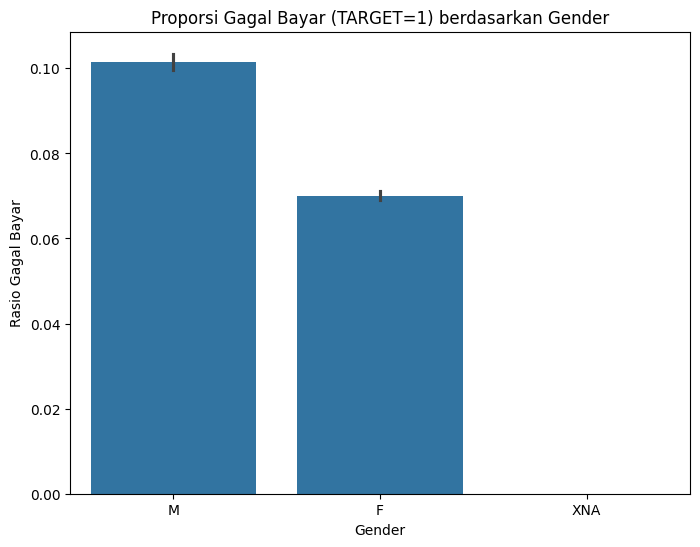

In [15]:
print('--- Proporsi Gender dengan Masalah Pembayaran (TARGET) ---')
gender_target_counts = train_data.groupby(['CODE_GENDER', 'TARGET']).size().unstack(fill_value=0)
gender_target_prop = gender_target_counts.div(gender_target_counts.sum(axis=1), axis=0)
display(gender_target_prop)

plt.figure(figsize=(8, 6))
sns.barplot(x='CODE_GENDER', y='TARGET', data=train_data)
plt.title('Proporsi Gagal Bayar (TARGET=1) berdasarkan Gender')
plt.ylabel('Rasio Gagal Bayar')
plt.xlabel('Gender')
plt.show()


--- Rata-rata Pemasukan berdasarkan Status Pembayaran (TARGET) ---


TARGET
0    169077.722266
1    165611.760906
Name: AMT_INCOME_TOTAL, dtype: float64

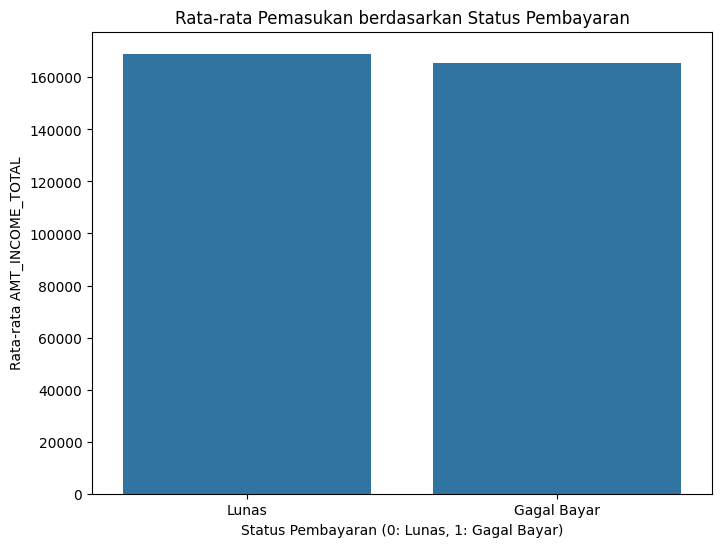

In [16]:
print('\n--- Rata-rata Pemasukan berdasarkan Status Pembayaran (TARGET) ---')
income_by_target = train_data.groupby('TARGET')['AMT_INCOME_TOTAL'].mean()
display(income_by_target)

plt.figure(figsize=(8, 6))
sns.barplot(x=income_by_target.index, y=income_by_target.values)
plt.title('Rata-rata Pemasukan berdasarkan Status Pembayaran')
plt.xlabel('Status Pembayaran (0: Lunas, 1: Gagal Bayar)')
plt.ylabel('Rata-rata AMT_INCOME_TOTAL')
plt.xticks([0, 1], ['Lunas', 'Gagal Bayar'])
plt.show()


--- Proporsi Gagal Bayar berdasarkan Tingkat Pendidikan ---


TARGET                                0         1
NAME_EDUCATION_TYPE                              
Academic degree                0.981707  0.018293
Higher education               0.946449  0.053551
Incomplete higher              0.915150  0.084850
Lower secondary                0.890723  0.109277
Secondary / secondary special  0.910601  0.089399

/tmp/ipython-input-4050190504.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='NAME_EDUCATION_TYPE', y='TARGET', data=train_data, palette='viridis')


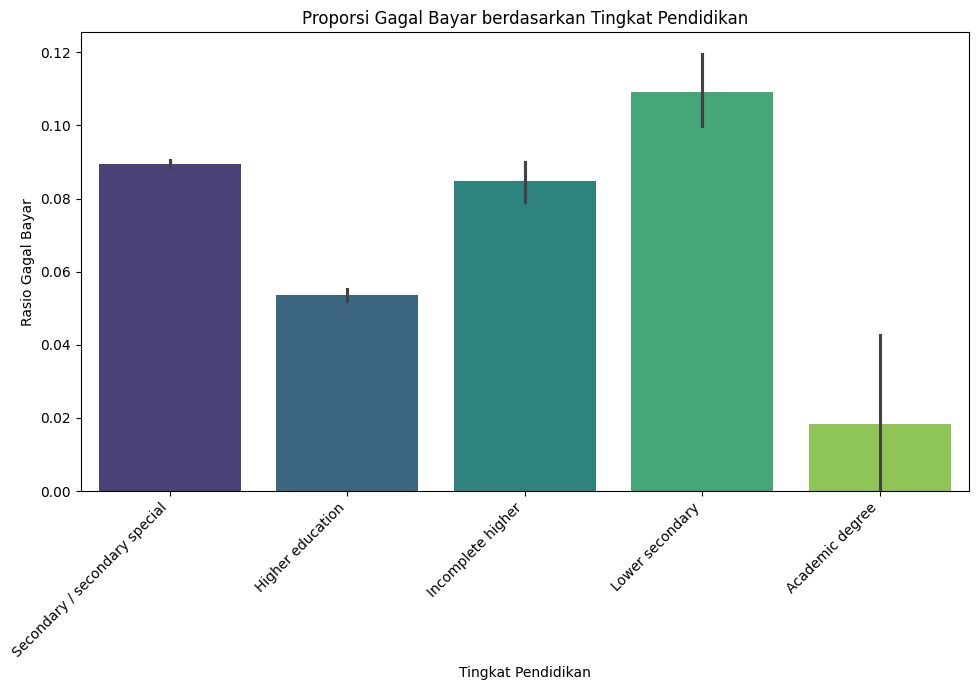

In [17]:
print('\n--- Proporsi Gagal Bayar berdasarkan Tingkat Pendidikan ---')
education_target_prop = train_data.groupby(['NAME_EDUCATION_TYPE', 'TARGET']).size().unstack(fill_value=0)
education_target_prop = education_target_prop.div(education_target_prop.sum(axis=1), axis=0)
display(education_target_prop)

plt.figure(figsize=(10, 7))
sns.barplot(x='NAME_EDUCATION_TYPE', y='TARGET', data=train_data, palette='viridis')
plt.title('Proporsi Gagal Bayar berdasarkan Tingkat Pendidikan')
plt.ylabel('Rasio Gagal Bayar')
plt.xlabel('Tingkat Pendidikan')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


--- Proporsi Gagal Bayar berdasarkan Status Keluarga ---


TARGET                       0         1
NAME_FAMILY_STATUS                      
Civil marriage        0.900554  0.099446
Married               0.924401  0.075599
Separated             0.918058  0.081942
Single / not married  0.901923  0.098077
Unknown               1.000000  0.000000
Widow                 0.941758  0.058242

/tmp/ipython-input-2142206162.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='NAME_FAMILY_STATUS', y='TARGET', data=train_data, palette='magma')


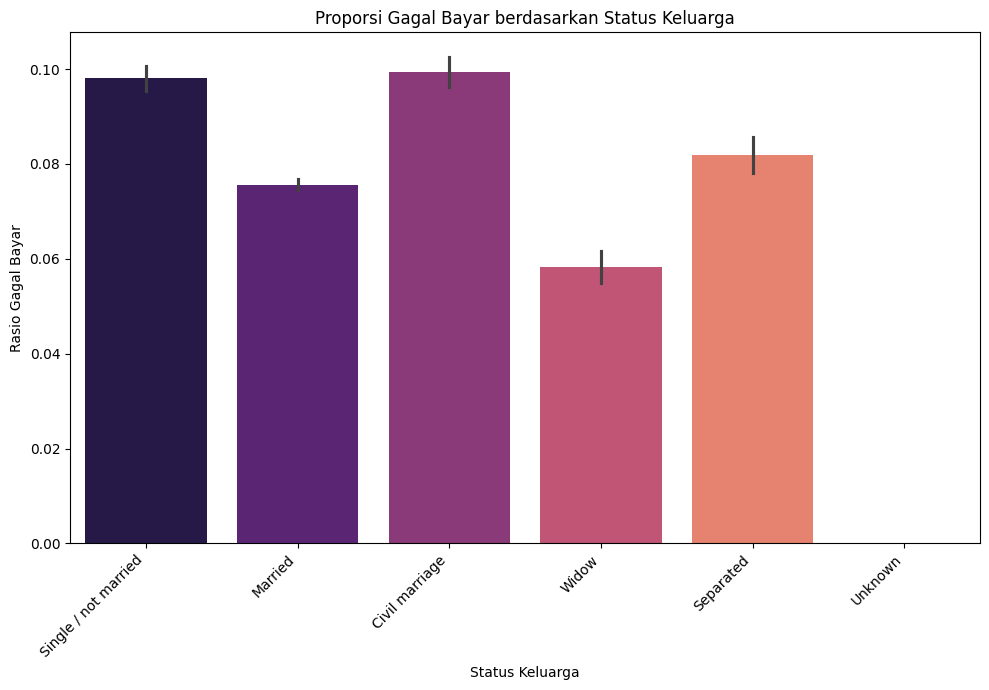

In [18]:
print('\n--- Proporsi Gagal Bayar berdasarkan Status Keluarga ---')
family_status_target_prop = train_data.groupby(['NAME_FAMILY_STATUS', 'TARGET']).size().unstack(fill_value=0)
family_status_target_prop = family_status_target_prop.div(family_status_target_prop.sum(axis=1), axis=0)
display(family_status_target_prop)

plt.figure(figsize=(10, 7))
sns.barplot(x='NAME_FAMILY_STATUS', y='TARGET', data=train_data, palette='magma')
plt.title('Proporsi Gagal Bayar berdasarkan Status Keluarga')
plt.ylabel('Rasio Gagal Bayar')
plt.xlabel('Status Keluarga')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


--- Rata-rata Jumlah Kredit dan Anuitas berdasarkan Status Pembayaran ---


AMT_CREDIT   AMT_ANNUITY
TARGET                             
0       602648.282002  27163.623349
1       557778.527674  26481.744290

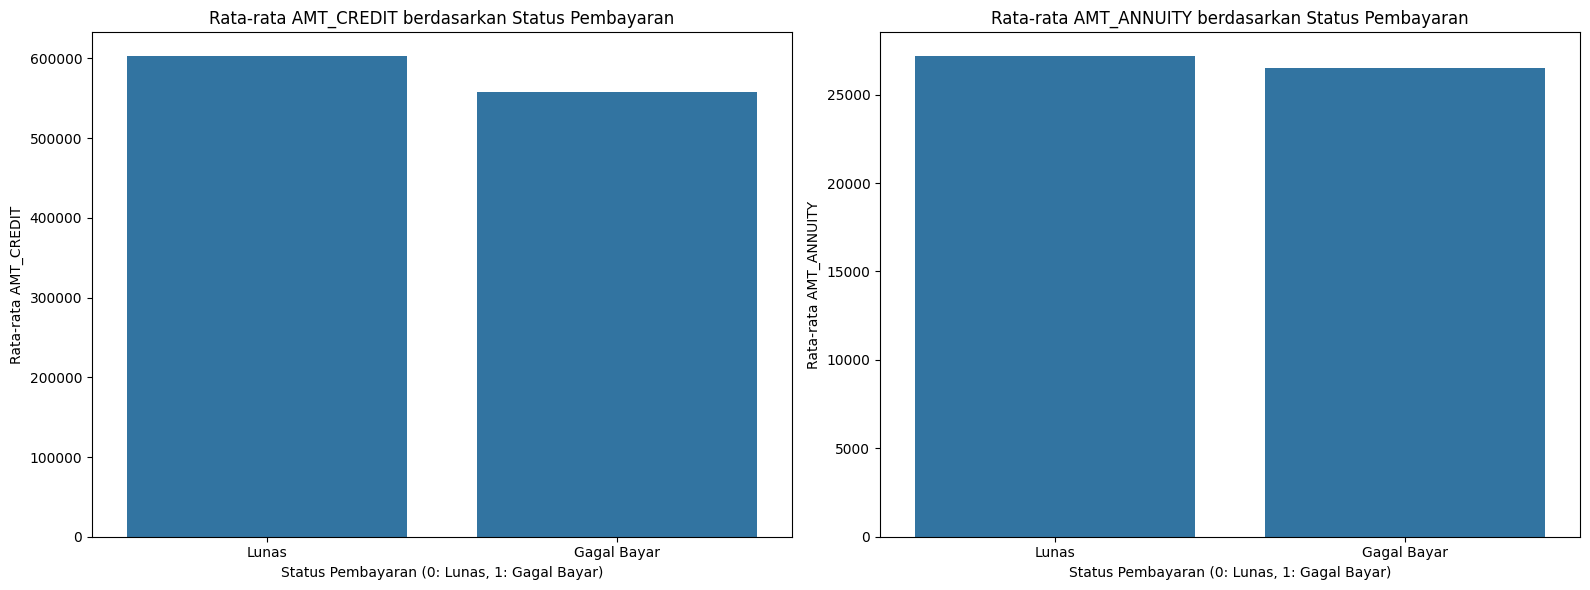

In [19]:
print('\n--- Rata-rata Jumlah Kredit dan Anuitas berdasarkan Status Pembayaran ---')
credit_annuity_by_target = train_data.groupby('TARGET')[['AMT_CREDIT', 'AMT_ANNUITY']].mean()
display(credit_annuity_by_target)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.barplot(x=credit_annuity_by_target.index, y=credit_annuity_by_target['AMT_CREDIT'], ax=axes[0])
axes[0].set_title('Rata-rata AMT_CREDIT berdasarkan Status Pembayaran')
axes[0].set_xlabel('Status Pembayaran (0: Lunas, 1: Gagal Bayar)')
axes[0].set_ylabel('Rata-rata AMT_CREDIT')
axes[0].set_xticks([0, 1], ['Lunas', 'Gagal Bayar'])

sns.barplot(x=credit_annuity_by_target.index, y=credit_annuity_by_target['AMT_ANNUITY'], ax=axes[1])
axes[1].set_title('Rata-rata AMT_ANNUITY berdasarkan Status Pembayaran')
axes[1].set_xlabel('Status Pembayaran (0: Lunas, 1: Gagal Bayar)')
axes[1].set_ylabel('Rata-rata AMT_ANNUITY')
axes[1].set_xticks([0, 1], ['Lunas', 'Gagal Bayar'])

plt.tight_layout()
plt.show()

## **Pemeriksaan Kualitas Data**

In [20]:
cek_nan(train_data)

Jumlah Nilai Missing  \
COMMONAREA_AVG                              214865   
COMMONAREA_MEDI                             214865   
COMMONAREA_MODE                             214865   
NONLIVINGAPARTMENTS_AVG                     213514   
NONLIVINGAPARTMENTS_MEDI                    213514   
NONLIVINGAPARTMENTS_MODE                    213514   
FONDKAPREMONT_MODE                          210295   
LIVINGAPARTMENTS_MEDI                       210199   
LIVINGAPARTMENTS_AVG                        210199   
LIVINGAPARTMENTS_MODE                       210199   
FLOORSMIN_MODE                              208642   
FLOORSMIN_AVG                               208642   
FLOORSMIN_MEDI                              208642   
YEARS_BUILD_MODE                            204488   
YEARS_BUILD_MEDI                            204488   
YEARS_BUILD_AVG                             204488   
OWN_CAR_AGE                                 202929   
LANDAREA_MEDI                               182590   
LANDAREA_AVG                                182590   
LANDAREA_MODE                               182590   
BASEMENTAREA_MODE                           179943   
BASEMENTAREA_AVG                            179943   
BASEMENTAREA_MEDI                           179943   
EXT_SOURCE_1                                173378   
NONLIVINGAREA_AVG                           169682   
NONLIVINGAREA_MODE                          169682   
NONLIVINGAREA_MEDI                          169682   
ELEVATORS_MEDI                              163891   
ELEVATORS_AVG                               163891   
ELEVATORS_MODE                              163891   
WALLSMATERIAL_MODE                          156341   
APARTMENTS_AVG                              156061   
APARTMENTS_MODE                             156061   
APARTMENTS_MEDI                             156061   
ENTRANCES_MEDI                              154828   
ENTRANCES_MODE                              154828   
ENTRANCES_AVG                               154828   
LIVINGAREA_AVG                              154350   
LIVINGAREA_MODE                             154350   
LIVINGAREA_MEDI                             154350   
HOUSETYPE_MODE                              154297   
FLOORSMAX_MODE                              153020   
FLOORSMAX_AVG                               153020   
FLOORSMAX_MEDI                              153020   
YEARS_BEGINEXPLUATATION_MODE                150007   
YEARS_BEGINEXPLUATATION_AVG                 150007   
YEARS_BEGINEXPLUATATION_MEDI                150007   
TOTALAREA_MODE                              148431   
EMERGENCYSTATE_MODE                         145755   
OCCUPATION_TYPE                              96391   
EXT_SOURCE_3                                 60965   
AMT_REQ_CREDIT_BUREAU_WEEK                   41519   
AMT_REQ_CREDIT_BUREAU_MON                    41519   
AMT_REQ_CREDIT_BUREAU_HOUR                   41519   
AMT_REQ_CREDIT_BUREAU_DAY                    41519   
AMT_REQ_CREDIT_BUREAU_YEAR                   41519   
AMT_REQ_CREDIT_BUREAU_QRT                    41519   
NAME_TYPE_SUITE                               1292   
OBS_60_CNT_SOCIAL_CIRCLE                      1021   
DEF_60_CNT_SOCIAL_CIRCLE                      1021   
OBS_30_CNT_SOCIAL_CIRCLE                      1021   
DEF_30_CNT_SOCIAL_CIRCLE                      1021   
EXT_SOURCE_2                                   660   
AMT_GOODS_PRICE                                278   
AMT_ANNUITY                                     12   
CNT_FAM_MEMBERS                                  2   
DAYS_LAST_PHONE_CHANGE                           1   

                              Persentase Nilai Missing (%)  
COMMONAREA_AVG                                      69.872  
COMMONAREA_MEDI                                     69.872  
COMMONAREA_MODE                                     69.872  
NONLIVINGAPARTMENTS_AVG                             69.433  
NONLIVINGAPARTMENTS_MEDI                            

In [21]:
visualize_row_with_duplicated(train_data)

Tidak ada data duplikat


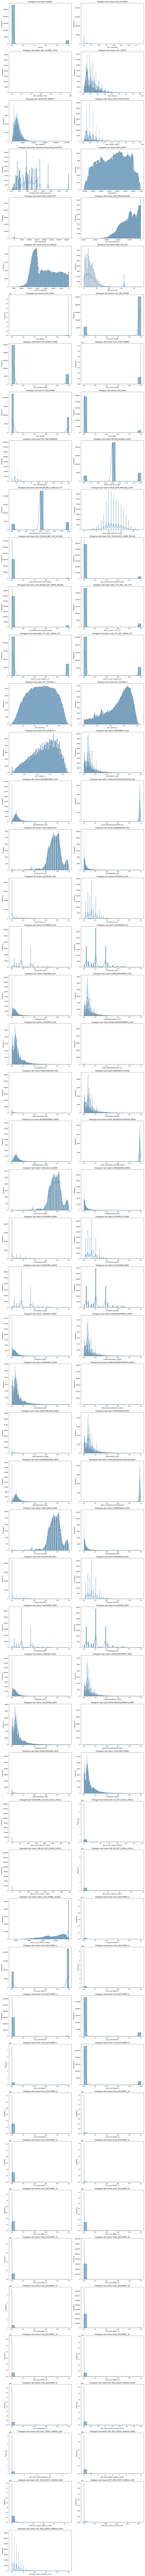

In [22]:
visualize_plot(train_data, method='all', plot='histogram')

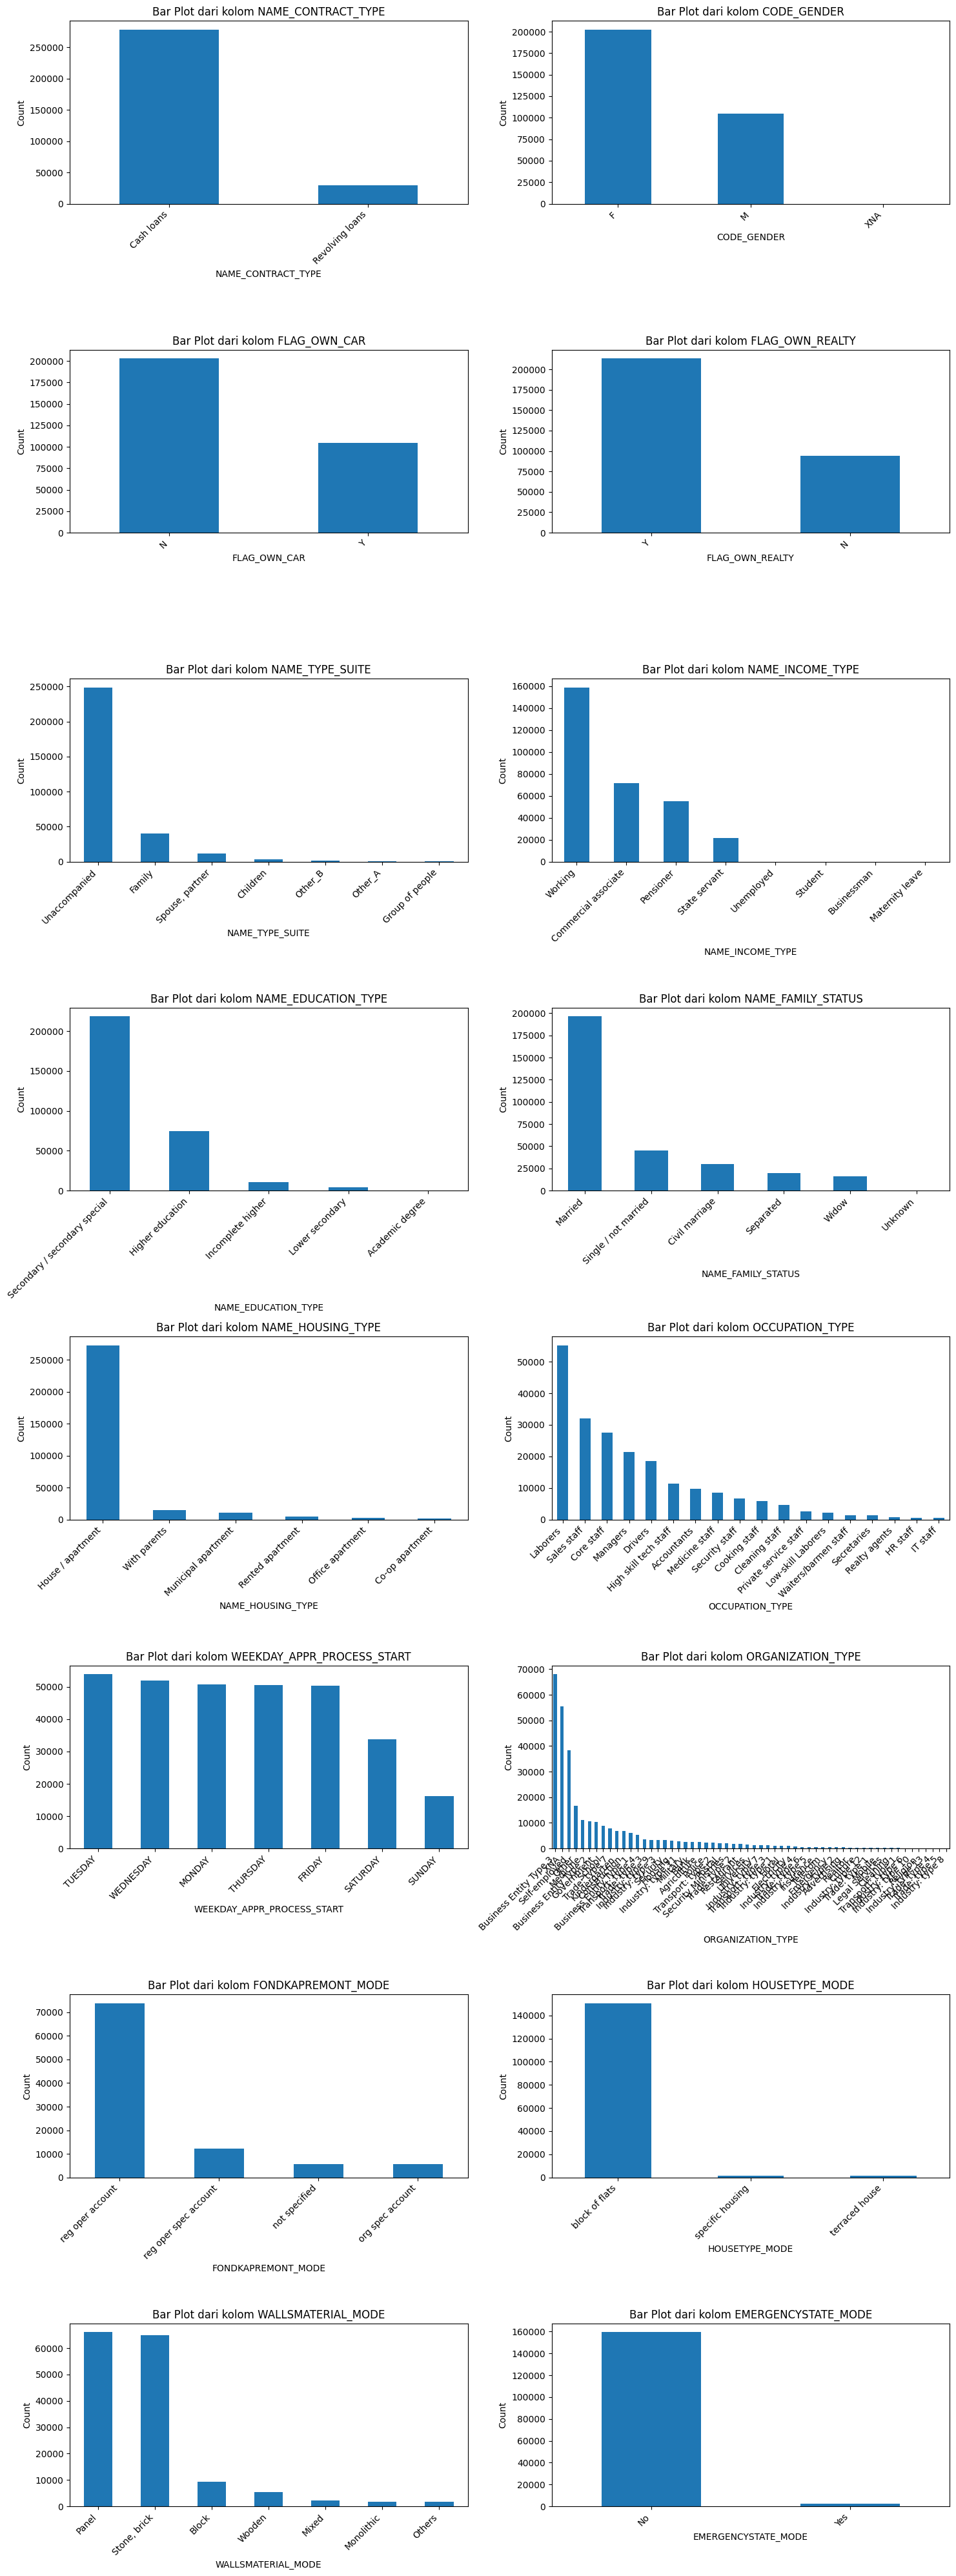

In [23]:
visualize_plot(train_data, method='all', plot='barplot')

Sebelum dilakukan analisis modeling, sebelumnya data perlu melalui tahapan preprocessing terlebih dahulu untuk memastikan bahwa data yang dianalisis sudah bersih dari nilai kosong, duplikat ataupun outlier serta nilai yang terindikasi kesalahan input atau error data.

Seperti yang tertera pada kode dan hasil visualiasi diatas, tidak ditemukan adanya nilai duplikat namun data ini masih memiliki banyak nilai yang kosong sehingga diperlukan penanganan untuk nilai kosong yang ada, selain dari itu, ditemukan bahwa adanya imbalance class yang ada pada data ini, dimana class 0 lebih mendominasi dibandingkan dengan class 1, yang mana jika dibiarkan dapat mempengaruhi hasil dari prediksi model nantinya.

Melalui visualisasi diatas pun, kita dapat menemukan kondisi persebaran dari setiap variable dalam data, apakah terjadi kemiringan atau tidak. Kita pun dapat melakukan ekstraksi informasi dari dalam data, sebagai contoh:
*   Berdasarkan data tersebut, ditemukan bahwa mayoritas nasabah peminjam di Home Credit ini berjenis kelamin perempuan.
*   Mayoritas nya pun sudah menikah dan juga bekerja, namun dibalik fakta tersebut, ditemukan bahwa mayoritas latar pendidikan nasabah peminjam ini merupakan lulusan secondary education atau setara SMP/SMA.
*   Informasi ini dapat mendukung alasan mengapa walaupun para nasabah sudah bekerja, mereka masih membutuhkan uang pinjaman tambahan terutama karena mayoritas nasabah berprofesi sebagai buruh yang mana pada tahun 2025 sendiri rata-rata gaji buruh hanya 3.3 juta di indonesia, dan bisa mencapai 6000 dolar lebih perbulan jika di luar negeri. Dimana jika mempertimbangkan tanggungan keluarga yang dimiliki oleh nasabah, gaji tersebut diperkirakan tidak akan cukup untuk memenuhi kebutuhan nasabah.


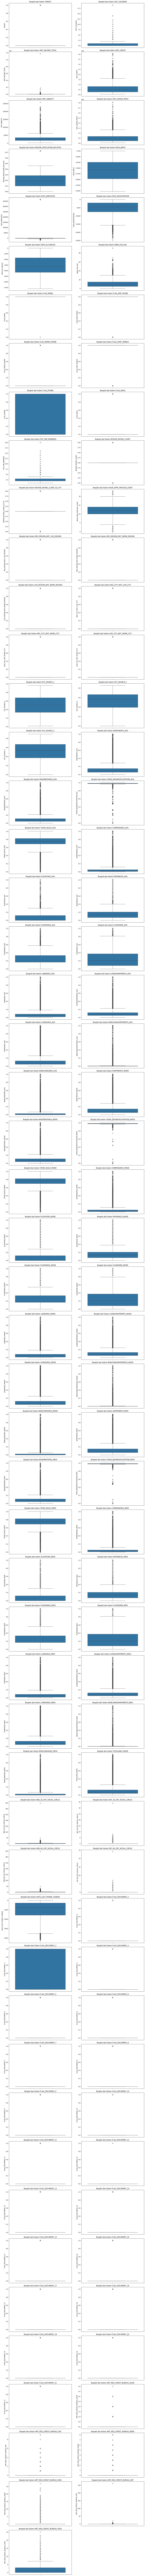

In [24]:
visualize_plot(train_data, method='all', plot='boxplot')

Seperti yang tertera sebelumnya, selain dari pemeriksaan nilai duplikat, nilai kosong dan kemiringan, perlu dilakukan pemeriksaan nilai outlier yang ada pada data, sebagai contoh menggunakan visualisasi boxplot diatas.

Berdasarkan visualisasi boxplot tersebut, ditemukan bahwa mayoritas nilai di kolom numerik yang ada pada data ini dianggap sebagai outlier, namun belum tentu nilai ini memang benar merupakan outlier, karena bisa jadi nilai tersebut memang benar dan memiliki informasi didalamnya.

Untuk memastikan bahwa nilai outlier ini ditangani dengan tepat, akan dibagi menjadi 2 tahapan sesuai dengan jenis dari data nya.

*   Untuk data biner dan target, akan pertahankan sementara karena nilai tersebut bukan sepenuhnya outlier namun ada beberapa yang dianggap outlier karena frekuensi nya sedikit namun mengandung informasi yang penting.
*   Untuk data lainnya, akan dilakukan pemeriksaan dahulu apakah nilai yang terkandung merupakan nilai yang masuk akal dan benar atau memang termasuk outlier atau nilai palsu.
*   Data tersebut pun akan dipisahkan dahulu berdasarkan dengan target nya sehingga metode analisis dan penanganan yang digunakan bisa lebih tepat.




In [25]:
preprocess_data = train_data.copy()
preprocess_data_label_0 = preprocess_data[preprocess_data['TARGET'] == 0]
preprocess_data_label_1 = preprocess_data[preprocess_data['TARGET'] == 1]
# preprocess_data.drop(columns=minimun_information_column, inplace=True)

In [26]:
preprocess_data_label_0.shape

(282686, 121)

In [27]:
preprocess_data_label_1.shape

(24825, 121)

## **Pemeriksaan Data Label 0**

In [28]:
cek_outlier_iqr(preprocess_data_label_0, method='all')

Outliers pada kolom CNT_CHILDREN:


array([ 3,  4,  7,  5,  6,  8, 12, 10, 19, 14])

Jumlah Outliers: 3843


Outliers pada kolom AMT_INCOME_TOTAL:


array([  360000. ,   450000. ,   540000. ,   382500. ,   765000. ,
         630000. ,   405000. ,   472500. ,   607500. ,   342000. ,
         400500. ,   522000. ,   720000. ,   810000. ,   346500. ,
         364500. ,  1080000. ,   378000. ,  1935000. ,   396000. ,
         369000. ,   675000. ,   391500. ,   351000. ,   356625. ,
         468823.5,   693000. ,   427500. ,   418500. ,   585000. ,
         414000. ,   468000. ,  1350000. ,   787500. ,   426019.5,
         436500. ,   445500. ,   441000. ,   432000. ,   339750. ,
         567000. ,   517500. ,   967500. ,   697500. ,   348750. ,
         553500. ,   495000. ,   652500. ,   463500. ,   612000. ,
         562500. ,  1035000. ,   387000. ,   900000. ,   355500. ,
         373500. ,  2250000. ,   855000. ,   353250. ,  1125000. ,
         576000. ,   409500. ,   688500. ,   508500. ,   346275. ,
         347400. ,   454500. ,   424350. ,   350392.5,   749331. ,
         760846.5,   877500. ,   378900. ,   459000. ,  180000

Jumlah Outliers: 13219


Outliers pada kolom AMT_CREDIT:


array([1663987.5, 1755000. , 2250000. , 1800000. , 1971072. , 1724220. ,
       2286211.5, 1649646. , 2085120. , 2125953. , 1661418. , 1757466. ,
       2254500. , 1963494. , 2013840. , 1635795. , 2159842.5, 1965226.5,
       1774039.5, 1622691. , 1712727. , 1872517.5, 1705500. , 2517300. ,
       2160000. , 1823242.5, 1890000. , 1886850. , 1762110. , 1928304. ,
       1832940. , 2156400. , 1644255. , 2447937. , 2356920. , 2245500. ,
       1837629. , 2410380. , 2020347. , 1695483. , 1724688. , 1812456. ,
       1626516. , 1921797. , 2395917. , 1732500. , 1682446.5, 1671210. ,
       1635120. , 1638009. , 1777500. , 2205000. , 1710000. , 1666746. ,
       2377431. , 1687266. , 1787283. , 1736937. , 1748304. , 1650771. ,
       1759180.5, 1665000. , 1773963. , 1720224. , 2695500. , 1862802. ,
       1948500. , 1658340. , 1723500. , 2925000. , 1696981.5, 2606400. ,
       2220259.5, 1822500. , 1993954.5, 1700050.5, 2428200. , 2047500. ,
       1626174. , 1711764. , 2028942. , 1942560. , 

Jumlah Outliers: 6254


Outliers pada kolom AMT_ANNUITY:


array([ 86989.5,  73611. ,  83515.5, ..., 166572. ,  71986.5,  77809.5])

Jumlah Outliers: 6772


Outliers pada kolom AMT_GOODS_PRICE:


array([1395000. , 1530000. , 1588500. , 1435500. , 1755000. , 2250000. ,
       1575000. , 1800000. , 2182500. , 1377000. , 1984500. , 1485000. ,
       1467000. , 2254500. , 1579500. , 1930500. , 1453500. , 1696500. ,
       1656000. , 1710000. , 1705500. , 2160000. , 1665000. , 1890000. ,
       1399500. , 1539000. , 1372500. , 1381500. , 1507500. , 1440000. ,
       1498500. , 2245500. , 1642500. , 1845000. , 1602000. , 1417500. ,
       1620000. , 2236500. , 1732500. , 1570500. , 1561500. , 1777500. ,
       2205000. , 1386000. , 1597500. , 1476000. , 1552500. , 1368000. ,
       1606500. , 1413000. , 1948500. , 1548000. , 1512000. , 1723500. ,
       2925000. , 1458000. , 1822500. , 1903500. , 1444500. , 2047500. ,
       1813500. , 2070000. , 2002500. , 1746000. , 1489500. , 2025000. ,
       1390500. , 1611000. , 1768500. , 1584000. , 3825000. , 4050000. ,
       1854000. , 1651500. , 2475000. , 1471500. , 1773000. , 1638000. ,
       1462500. , 1426500. , 1849500. , 1687500. , 

Jumlah Outliers: 7947


Outliers pada kolom REGION_POPULATION_RELATIVE:


array([0.072508])

Jumlah Outliers: 8078


Outliers pada kolom DAYS_EMPLOYED:


array([365243,  -7804,  -9523, ..., -12971, -11084,  -8694])

Jumlah Outliers: 67737


Outliers pada kolom DAYS_REGISTRATION:


array([-17298., -17013., -15926., -16093., -17313., -20981., -17959.,
       -17252., -16970., -16988., -16533., -16391., -16261., -16520.,
       -16222., -16591., -18761., -17974., -16492., -16438., -17999.,
       -16507., -17709., -17164., -17141., -16711., -17188., -18758.,
       -17096., -19344., -16191., -16761., -16143., -16394., -18289.,
       -16636., -16798., -21244., -15958., -18616., -16421., -16237.,
       -18660., -18006., -16908., -16654., -20452., -16095., -16662.,
       -17870., -16302., -16169., -17620., -18584., -20447., -19244.,
       -17201., -16185., -17389., -16406., -16504., -16595., -18497.,
       -16796., -16666., -17596., -21249., -19488., -22392., -16586.,
       -20571., -16233., -15989., -16387., -18579., -16198., -15901.,
       -15985., -15930., -17536., -17480., -17333., -17122., -15837.,
       -17077., -16596., -16009., -15843., -16047., -15832., -16026.,
       -18341., -16782., -16038., -16106., -16315., -16347., -16248.,
       -18231., -159

Jumlah Outliers: 567


Outliers pada kolom OWN_CAR_AGE:


array([65., 64., 36., 39., 40., 41., 31., 42., 35., 34., 33., 54., 37.,
       38., 32., 43., 55., 49., 44., 63., 46., 45., 48., 56., 51., 69.,
       50., 47., 91., 52.])

Jumlah Outliers: 4492


Outliers pada kolom FLAG_MOBIL:


array([0])

Jumlah Outliers: 1


Outliers pada kolom FLAG_EMP_PHONE:


array([0])

Jumlah Outliers: 52395


Outliers pada kolom FLAG_WORK_PHONE:


array([1])

Jumlah Outliers: 55404


Outliers pada kolom FLAG_CONT_MOBILE:


array([0])

Jumlah Outliers: 529


Outliers pada kolom FLAG_EMAIL:


array([1])

Jumlah Outliers: 16068


Outliers pada kolom CNT_FAM_MEMBERS:


array([ 5.,  6.,  9.,  7.,  8., 10., 14., 12., 20., 15., 16.])

Jumlah Outliers: 3610


Outliers pada kolom REGION_RATING_CLIENT:


array([1, 3])

Jumlah Outliers: 73609


Outliers pada kolom REGION_RATING_CLIENT_W_CITY:


array([1, 3])

Jumlah Outliers: 71372


Outliers pada kolom HOUR_APPR_PROCESS_START:


array([ 3, 21, 22,  2,  1, 23,  0])

Jumlah Outliers: 2062


Outliers pada kolom REG_REGION_NOT_LIVE_REGION:


array([1])

Jumlah Outliers: 4224


Outliers pada kolom REG_REGION_NOT_WORK_REGION:


array([1])

Jumlah Outliers: 14224


Outliers pada kolom LIVE_REGION_NOT_WORK_REGION:


array([1])

Jumlah Outliers: 11447


Outliers pada kolom REG_CITY_NOT_LIVE_CITY:


array([1])

Jumlah Outliers: 21100


Outliers pada kolom REG_CITY_NOT_WORK_CITY:


array([1])

Jumlah Outliers: 63347


Outliers pada kolom LIVE_CITY_NOT_WORK_CITY:


array([1])

Jumlah Outliers: 49712


Outliers pada kolom EXT_SOURCE_2:


array([0.01027165, 0.0028123 , 0.01529023, ..., 0.01003475, 0.00269422,
       0.00278017])

Jumlah Outliers: 1717


Outliers pada kolom APARTMENTS_AVG:


array([0.3495, 0.367 , 0.5309, 0.3887, 0.2959, 0.332 , 0.5351, 0.3247,
       0.5845, 0.3093, 0.4753, 0.3041, 0.4072, 0.4082, 0.4572, 0.4402,
       0.3309, 0.6639, 0.4113, 0.2969, 0.4   , 0.4268, 0.3361, 0.3979,
       0.3845, 0.2876, 0.3464, 0.4052, 0.5474, 0.3165, 0.3351, 0.2887,
       0.3959, 1.    , 0.2918, 0.5134, 0.4299, 0.3763, 0.3814, 0.2928,
       0.3227, 0.7119, 0.3711, 0.2938, 0.4619, 0.3089, 0.5258, 0.4351,
       0.5443, 0.4206, 0.6268, 0.3876, 0.8531, 0.5196, 0.5278, 0.3918,
       0.5866, 0.3784, 0.2907, 0.3649, 0.3928, 0.3175, 0.2948, 0.3392,
       0.4443, 0.3433, 0.2912, 0.3072, 0.399 , 0.2897, 0.4649, 0.3753,
       0.2866, 0.3301, 0.5124, 0.5711, 0.3577, 0.2921, 0.333 , 0.3619,
       0.4258, 0.4948, 0.5722, 0.5804, 0.3969, 0.6485, 0.6186, 0.5402,
       0.6526, 0.2979, 0.3897, 0.3608, 0.3206, 0.3443, 0.3155, 0.3598,
       0.3289, 0.4902, 0.3237, 0.7412, 0.4691, 0.3371, 0.3804, 0.4103,
       0.3113, 0.6304, 0.3938, 0.4474, 0.5773, 0.3907, 0.3423, 0.4371,
      

Jumlah Outliers: 10169


Outliers pada kolom BASEMENTAREA_AVG:


array([0.3751, 0.2491, 0.2309, ..., 0.274 , 0.2733, 0.636 ])

Jumlah Outliers: 6763


Outliers pada kolom YEARS_BEGINEXPLUATATION_AVG:


array([0.9354, 0.6508, 0.9578, 0.9518, 0.9414, 0.9608, 0.9503, 0.9598,
       0.9583, 0.929 , 0.9617, 0.9563, 0.9508, 0.9359, 0.9573, 0.9588,
       0.9513, 0.9553, 0.9603, 0.9543, 0.9568, 0.6538, 0.9523, 0.4953,
       0.    , 0.9071, 0.9593, 0.9613, 0.9439, 0.9434, 0.9488, 0.4973,
       0.9459, 0.9334, 0.9424, 0.9449, 0.4913, 0.9468, 0.9001, 0.9324,
       0.9473, 0.9389, 0.9548, 0.9493, 0.9463, 0.9498, 0.92  , 0.4903,
       0.9121, 0.9444, 0.3259, 0.9409, 0.4848, 0.9329, 0.9429, 0.928 ,
       0.9483, 0.9478, 0.9538, 0.9404, 0.4759, 0.8977, 0.7442, 0.927 ,
       0.9528, 0.8927, 0.9344, 0.9379, 0.3279, 0.9275, 0.9056, 0.9558,
       0.4983, 0.4883, 0.9339, 0.7432, 0.7829, 0.6533, 0.9384, 0.9136,
       0.1987, 0.9195, 0.4933, 0.9419, 0.9319, 0.5315, 0.9309, 0.9349,
       0.6841, 0.9399, 0.9066, 0.926 , 0.4943, 0.9394, 0.9245, 0.3294,
       0.9295, 0.8674, 0.229 , 0.9175, 0.8579, 0.5852, 0.4863, 0.9454,
       0.93  , 0.916 , 0.9314, 0.9369, 0.924 , 0.6513, 0.3304, 0.8877,
      

Jumlah Outliers: 4387


Outliers pada kolom YEARS_BUILD_AVG:


array([1.160e-01, 4.628e-01, 3.200e-01, 4.492e-01, 4.288e-01, 2.760e-02,
       4.764e-01, 3.268e-01, 4.356e-01, 3.336e-01, 3.880e-01, 3.404e-01,
       3.472e-01, 0.000e+00, 4.220e-01, 4.696e-01, 2.316e-01, 2.248e-01,
       2.996e-01, 8.880e-02, 4.016e-01, 4.424e-01, 2.180e-01, 7.520e-02,
       2.792e-01, 1.636e-01, 4.560e-01, 3.812e-01, 3.064e-01, 2.112e-01,
       2.384e-01, 3.132e-01, 2.928e-01, 4.084e-01, 2.588e-01, 2.724e-01,
       3.744e-01, 2.452e-01, 2.860e-01, 1.568e-01, 4.152e-01, 1.908e-01,
       4.000e-04, 3.540e-01, 3.948e-01, 7.200e-03, 9.560e-02, 3.676e-01,
       2.044e-01, 1.228e-01, 2.656e-01, 1.092e-01, 1.772e-01, 1.704e-01,
       4.800e-02, 3.440e-02, 6.840e-02, 6.160e-02, 1.364e-01, 3.608e-01,
       1.024e-01, 2.520e-01, 1.432e-01, 8.200e-02, 1.500e-01, 5.480e-02,
       1.840e-01, 1.296e-01, 4.120e-02, 1.976e-01, 2.080e-02, 1.400e-02])

Jumlah Outliers: 1985


Outliers pada kolom COMMONAREA_AVG:


array([0.1221, 0.2632, 0.2781, ..., 0.2254, 0.3272, 0.162 ])

Jumlah Outliers: 7461


Outliers pada kolom ELEVATORS_AVG:


array([0.4   , 0.88  , 0.32  , 0.4264, 0.36  , 0.68  , 0.56  , 0.6   ,
       0.52  , 0.44  , 0.48  , 0.64  , 0.72  , 0.9   , 0.5   , 0.42  ,
       0.384 , 0.3732, 0.54  , 0.76  , 0.34  , 0.84  , 0.74  , 1.    ,
       0.58  , 0.448 , 0.3464, 0.96  , 0.38  , 0.5864, 0.352 , 0.9332,
       0.5332, 0.8   , 0.92  , 0.33  , 0.3332, 0.304 , 0.78  , 0.808 ,
       0.4532, 0.66  , 0.432 , 0.5732, 0.3668, 0.336 , 0.3064, 0.46  ,
       0.512 , 0.39  , 0.332 , 0.35  , 0.344 , 0.3564, 0.45  , 0.3864,
       0.62  , 0.3108, 0.312 , 0.392 , 0.4132, 0.6132, 0.566 , 0.59  ])

Jumlah Outliers: 9890


Outliers pada kolom ENTRANCES_AVG:


array([0.4828, 0.4483, 0.5172, 0.4138, 0.5517, 0.6207, 0.6897, 0.6552,
       0.5862, 0.8276, 0.7586, 0.4655, 0.7241, 0.431 , 0.4597, 1.    ,
       0.8966, 0.9655, 0.7931, 0.5   , 0.931 , 0.8621, 0.569 , 0.4741])

Jumlah Outliers: 3659


Outliers pada kolom FLOORSMAX_AVG:


array([0.6667, 0.5833, 0.625 , 0.9167, 0.9583, 1.    , 0.6042, 0.875 ,
       0.7083, 0.5971, 0.7292, 0.8125, 0.6146, 0.75  , 0.6108, 0.84  ,
       0.6458, 0.7917, 0.6333, 0.6875, 0.6417, 0.6387, 0.65  , 0.8958,
       0.6308, 0.8333, 0.6842, 0.6783, 0.7637, 0.7833, 0.725 , 0.6525,
       0.5917, 0.6771, 0.7   , 0.8992, 0.7708, 0.8542, 0.6788, 0.6625,
       0.6725, 0.7358, 0.8021, 0.9304, 0.7775, 0.6017, 0.9   , 0.6804,
       0.6375, 0.6833, 0.6354, 0.9792, 0.6083, 0.8192, 0.6071, 0.6979,
       0.6342, 0.6   , 0.7812, 0.9375, 0.6917, 0.595 , 0.6583, 0.5863,
       0.6129, 0.8054, 0.8888, 0.6317, 0.6942, 0.5979, 0.6167, 0.5938,
       0.8608, 0.8471, 0.9479])

Jumlah Outliers: 4986


Outliers pada kolom FLOORSMIN_AVG:


array([1.    , 0.8333, 0.9583, 0.9167, 0.9408, 0.8229, 0.8917, 0.9792,
       0.8542, 0.9304, 0.875 , 0.8471, 0.8608, 0.8192, 0.9025])

Jumlah Outliers: 330


Outliers pada kolom LANDAREA_AVG:


array([0.2371, 0.3977, 0.2208, ..., 0.4394, 0.2662, 0.313 ])

Jumlah Outliers: 6426


Outliers pada kolom LIVINGAPARTMENTS_AVG:


array([0.2849, 0.2564, 0.2412, 0.4194, 0.4287, 0.2522, 0.3261, 0.2404,
       0.3291, 0.3728, 0.3589, 0.2673, 0.2387, 0.3345, 0.2421, 0.348 ,
       0.2723, 0.3135, 0.3085, 0.2345, 0.4455, 0.2572, 0.4152, 0.3076,
       0.2627, 0.5707, 0.3026, 0.2393, 0.2396, 0.3001, 0.3547, 0.4438,
       0.3425, 0.3522, 0.3093, 0.6918, 0.4236, 0.4127, 0.3194, 0.4623,
       0.4035, 0.295 , 0.2278, 0.3202, 0.2589, 0.2379, 0.2631, 0.2765,
       0.3354, 0.2799, 0.2471, 0.232 , 0.3782, 0.5632, 0.4177, 0.2782,
       0.2356, 0.2715, 0.3455, 0.2732, 0.2295, 0.4665, 0.4606, 0.3236,
       0.4976, 0.3068, 0.4909, 0.4396, 0.5131, 0.3177, 0.2614, 0.316 ,
       0.2791, 0.3051, 0.2824, 0.2908, 0.2606, 0.5018, 0.4421, 0.6043,
       0.3766, 0.2749, 0.2992, 0.3329, 0.2505, 0.3614, 0.3648, 0.4707,
       0.3173, 0.3043, 0.2454, 0.4564, 0.2858, 0.2513, 0.406 , 0.6338,
       0.4219, 0.3392, 0.2303, 0.2774, 0.5262, 0.3219, 0.3013, 0.2707,
       0.4026, 0.3018, 0.2816, 0.3631, 0.3917, 0.3165, 0.3102, 0.3244,
      

Jumlah Outliers: 7433


Outliers pada kolom LIVINGAREA_AVG:


array([0.3774, 0.5878, 0.2818, ..., 0.4256, 0.6005, 0.9279])

Jumlah Outliers: 11529


Outliers pada kolom NONLIVINGAPARTMENTS_AVG:


array([0.0193, 0.0656, 0.278 , 0.0232, 0.0772, 0.1931, 0.0386, 0.0154,
       0.2201, 0.0116, 0.027 , 0.1622, 0.0309, 0.0425, 0.0618, 0.0502,
       0.0174, 0.029 , 0.0135, 0.0579, 0.2625, 0.1969, 0.0483, 0.0463,
       0.0444, 0.0103, 0.0566, 0.0283, 0.1158, 0.0347, 0.0811, 0.0734,
       0.7452, 0.1236, 0.1506, 0.0927, 0.0489, 0.1429, 0.0869, 0.0541,
       0.0208, 0.0141, 0.0695, 0.0888, 0.0222, 0.01  , 0.1029, 0.2046,
       0.1081, 1.    , 0.139 , 0.2317, 0.3822, 0.0849, 0.0161, 0.1197,
       0.2857, 0.1313, 0.0212, 0.3629, 0.1023, 0.0399, 0.9923, 0.018 ,
       0.0127, 0.056 , 0.4595, 0.3205, 0.0182, 0.0753, 0.305 , 0.0131,
       0.0373, 0.4208, 0.1139, 0.1004, 0.0183, 0.0129, 0.2085, 0.1042,
       0.1274, 0.0724, 0.1583, 0.0244, 0.0257, 0.148 , 0.6795, 0.1351,
       0.2124, 0.1055, 0.0521, 0.0139, 0.036 , 0.5907, 0.2934, 0.0402,
       0.5135, 0.112 , 0.2587, 0.0203, 0.3977, 0.2425, 0.2741, 0.6178,
       0.0415, 0.2336, 0.4672, 0.1988, 0.0251, 0.4131, 0.0965, 0.5521,
      

Jumlah Outliers: 14592


Outliers pada kolom NONLIVINGAREA_AVG:


array([0.1001, 0.1341, 0.1749, ..., 0.3368, 0.6024, 0.2879])

Jumlah Outliers: 15467


Outliers pada kolom APARTMENTS_MODE:


array([0.3561, 0.3739, 0.541 , 0.3015, 0.3382, 0.5452, 0.3309, 0.5956,
       0.3151, 0.4842, 0.3099, 0.4149, 0.4485, 0.3372, 0.6765, 0.4191,
       0.3025, 0.4076, 0.4349, 0.3424, 0.4055, 0.3918, 0.2931, 0.3529,
       0.4128, 0.5578, 0.3225, 0.3414, 0.2941, 0.4034, 1.    , 0.2973,
       0.5231, 0.438 , 0.3834, 0.3887, 0.2983, 0.479 , 0.3782, 0.2994,
       0.4706, 0.5357, 0.4433, 0.5546, 0.6387, 0.395 , 0.4979, 0.5294,
       0.5378, 0.5977, 0.3855, 0.2962, 0.3718, 0.2847, 0.3004, 0.3456,
       0.4527, 0.3498, 0.2952, 0.4065, 0.4737, 0.3824, 0.292 , 0.5221,
       0.5819, 0.3645, 0.3393, 0.3687, 0.4338, 0.2868, 0.583 , 0.5914,
       0.4044, 0.6607, 0.6303, 0.3761, 0.4874, 0.3036, 0.3971, 0.3676,
       0.3267, 0.3981, 0.3508, 0.3214, 0.3666, 0.3351, 0.3697, 0.3298,
       0.7553, 0.4779, 0.3435, 0.3876, 0.4181, 0.3172, 0.4853, 0.4013,
       0.4559, 0.416 , 0.5882, 0.3487, 0.4454, 0.4317, 0.3067, 0.5777,
       0.3571, 0.3929, 0.5725, 0.5074, 0.7962, 0.5273, 0.3939, 0.2878,
      

Jumlah Outliers: 9583


Outliers pada kolom BASEMENTAREA_MODE:


array([0.3893, 0.2585, 0.2396, ..., 0.2843, 0.5461, 0.2808])

Jumlah Outliers: 6474


Outliers pada kolom YEARS_BEGINEXPLUATATION_MODE:


array([9.136e-01, 0.000e+00, 9.578e-01, 9.518e-01, 9.414e-01, 9.608e-01,
       9.503e-01, 9.598e-01, 9.583e-01, 9.290e-01, 9.618e-01, 9.563e-01,
       9.508e-01, 9.359e-01, 9.573e-01, 9.588e-01, 9.513e-01, 9.593e-01,
       9.553e-01, 9.603e-01, 9.484e-01, 5.000e-04, 9.523e-01, 9.071e-01,
       9.494e-01, 9.613e-01, 9.439e-01, 9.434e-01, 9.489e-01, 9.459e-01,
       9.335e-01, 9.568e-01, 9.424e-01, 9.449e-01, 9.469e-01, 9.002e-01,
       9.325e-01, 9.474e-01, 9.389e-01, 9.548e-01, 9.464e-01, 9.499e-01,
       9.201e-01, 9.121e-01, 8.401e-01, 9.444e-01, 9.409e-01, 9.330e-01,
       9.429e-01, 9.280e-01, 9.543e-01, 9.364e-01, 9.479e-01, 9.384e-01,
       9.538e-01, 9.404e-01, 8.977e-01, 9.270e-01, 9.528e-01, 8.928e-01,
       9.558e-01, 9.345e-01, 9.379e-01, 9.275e-01, 9.057e-01, 9.340e-01,
       9.076e-01, 9.146e-01, 9.196e-01, 9.355e-01, 9.419e-01, 9.320e-01,
       5.318e-01, 9.310e-01, 9.350e-01, 4.359e-01, 9.399e-01, 9.067e-01,
       9.454e-01, 9.260e-01, 9.394e-01, 9.245e-01, 

Jumlah Outliers: 4651


Outliers pada kolom YEARS_BUILD_MODE:


array([0.000e+00, 4.838e-01, 3.466e-01, 4.708e-01, 4.512e-01, 6.570e-02,
       4.969e-01, 3.532e-01, 4.577e-01, 3.597e-01, 3.989e-01, 4.642e-01,
       4.120e-01, 3.205e-01, 3.662e-01, 3.728e-01, 4.446e-01, 4.904e-01,
       2.617e-01, 2.552e-01, 3.270e-01, 1.245e-01, 4.316e-01, 4.250e-01,
       2.486e-01, 4.381e-01, 1.114e-01, 3.074e-01, 1.964e-01, 4.773e-01,
       4.054e-01, 3.336e-01, 3.401e-01, 2.421e-01, 2.682e-01, 2.878e-01,
       3.009e-01, 2.748e-01, 3.140e-01, 1.898e-01, 2.225e-01, 3.950e-02,
       3.793e-01, 4.185e-01, 4.610e-02, 1.310e-01, 3.924e-01, 2.356e-01,
       1.571e-01, 2.944e-01, 1.441e-01, 2.094e-01, 2.650e-02, 2.029e-01,
       7.220e-02, 1.049e-01, 9.830e-02, 1.702e-01, 3.000e-04, 3.858e-01,
       1.375e-01, 2.813e-01, 1.340e-02, 1.768e-01, 1.506e-01, 1.179e-01,
       1.833e-01, 9.180e-02, 2.160e-01, 1.637e-01, 8.530e-02, 7.870e-02,
       2.290e-01, 5.910e-02, 5.260e-02, 3.300e-02])

Jumlah Outliers: 2102


Outliers pada kolom COMMONAREA_MODE:


array([0.1153, 0.2656, 0.2807, ..., 0.3449, 0.3302, 0.1635])

Jumlah Outliers: 7432


Outliers pada kolom ELEVATORS_MODE:


array([0.4028, 0.8862, 0.3222, 0.3625, 0.6848, 0.5639, 0.6042, 0.5236,
       0.4431, 0.4834, 0.6445, 0.725 , 0.8459, 1.    , 0.9667, 0.8056,
       0.9264, 0.7653])

Jumlah Outliers: 9228


Outliers pada kolom ENTRANCES_MODE:


array([0.4828, 0.4483, 0.5172, 0.5517, 0.4138, 0.6207, 0.6897, 0.6552,
       0.5862, 0.8276, 0.7586, 0.7241, 1.    , 0.8966, 0.9655, 0.7931,
       0.931 , 0.8621])

Jumlah Outliers: 3616


Outliers pada kolom FLOORSMAX_MODE:


array([0.6667, 0.5833, 0.625 , 0.9167, 0.9583, 1.    , 0.875 , 0.7083,
       0.75  , 0.7917, 0.8333])

Jumlah Outliers: 4880


Outliers pada kolom FLOORSMIN_MODE:


array([1.    , 0.9583, 0.9167, 0.8333, 0.875 ])

Jumlah Outliers: 307


Outliers pada kolom LANDAREA_MODE:


array([0.2425, 0.4067, 0.2259, ..., 0.2958, 0.4494, 0.2723])

Jumlah Outliers: 6531


Outliers pada kolom LIVINGAPARTMENTS_MODE:


array([0.3113, 0.2635, 0.4582, 0.4683, 0.2755, 0.3563, 0.2626, 0.3921,
       0.292 , 0.2608, 0.3655, 0.2645, 0.3802, 0.2975, 0.3425, 0.337 ,
       0.2562, 0.4867, 0.281 , 0.4536, 0.3361, 0.4132, 0.3306, 0.3278,
       0.3875, 0.4848, 0.3848, 0.3379, 0.4334, 0.4628, 0.4509, 0.5051,
       0.4408, 0.2479, 0.3223, 0.2489, 0.2599, 0.2874, 0.3021, 0.3664,
       0.3058, 0.3489, 0.2534, 0.6152, 0.4564, 0.3039, 0.2966, 0.3774,
       0.2984, 0.2507, 0.5096, 0.5032, 0.3535, 0.5436, 0.3352, 0.5363,
       0.3287, 0.3471, 0.2856, 0.3453, 0.3049, 0.3333, 0.3085, 0.3177,
       0.2847, 0.5464, 0.483 , 0.6602, 0.4114, 0.3003, 0.3269, 0.3636,
       0.2736, 0.3949, 0.3499, 0.3985, 0.5142, 0.3324, 0.2681, 0.4986,
       0.3122, 0.2746, 0.4435, 0.6924, 0.461 , 0.3196, 0.2516, 0.303 ,
       0.5748, 0.3517, 0.2957, 0.4399, 0.3297, 0.3076, 0.3967, 0.4279,
       0.3388, 0.3545, 0.2691, 0.4601, 0.5859, 0.4316, 0.2893, 0.5546,
       0.4031, 0.2801, 0.36  , 0.2718, 0.3444, 0.3609, 0.2525, 0.2865,
      

Jumlah Outliers: 7035


Outliers pada kolom LIVINGAREA_MODE:


array([0.3932, 0.2682, 0.6124, ..., 0.3491, 0.6257, 0.9667])

Jumlah Outliers: 12300


Outliers pada kolom NONLIVINGAPARTMENTS_MODE:


array([0.0195, 0.0661, 0.1556, 0.0233, 0.0778, 0.1946, 0.0389, 0.0156,
       0.2218, 0.0117, 0.0272, 0.1634, 0.0311, 0.0428, 0.0623, 0.0506,
       0.0584, 0.2646, 0.1984, 0.0467, 0.1167, 0.0817, 0.0739, 0.751 ,
       0.1245, 0.0934, 0.144 , 0.0545, 0.07  , 0.0895, 0.035 , 0.2062,
       0.1089, 1.    , 0.1401, 0.2335, 0.3852, 0.0856, 0.1206, 0.1323,
       0.3658, 0.463 , 0.323 , 0.3074, 0.4241, 0.1012, 0.2101, 0.1284,
       0.1595, 0.6848, 0.1362, 0.214 , 0.5953, 0.2957, 0.5175, 0.1128,
       0.2607, 0.4008, 0.2763, 0.6226, 0.4708, 0.1051, 0.4163, 0.0973,
       0.5564, 0.1673, 0.2802, 0.8482, 0.2023, 0.3113, 0.1479, 0.5331,
       0.9416, 0.8911, 0.7121, 0.2568, 0.3152, 0.7004, 0.9805, 0.3891,
       0.2412, 0.3035, 0.5136, 0.249 , 0.4125, 0.3463, 0.3268, 0.2918,
       0.3307, 0.2724, 0.2179, 0.3385, 0.4202, 0.4591, 0.8249, 0.4475,
       0.3502, 0.179 , 0.4086, 0.2296, 0.4825, 0.5447, 0.9339, 0.8444,
       0.5759, 0.4358, 0.2996, 0.428 , 0.1829, 0.3424, 0.8755, 0.7938,
      

Jumlah Outliers: 13316


Outliers pada kolom NONLIVINGAREA_MODE:


array([0.106 , 0.142 , 0.1852, ..., 0.3565, 0.4629, 0.3048])

Jumlah Outliers: 17562


Outliers pada kolom APARTMENTS_MEDI:


array([0.3529, 0.3706, 0.5361, 0.3872, 0.2987, 0.3352, 0.5402, 0.3279,
       0.5902, 0.3123, 0.4799, 0.3071, 0.4112, 0.4122, 0.4616, 0.4445,
       0.3341, 0.6703, 0.4153, 0.2998, 0.4039, 0.4309, 0.3393, 0.4018,
       0.3883, 0.2904, 0.3497, 0.4091, 0.5527, 0.3196, 0.3383, 0.2915,
       0.3997, 1.    , 0.2946, 0.5184, 0.4341, 0.3799, 0.3851, 0.2956,
       0.3258, 0.7188, 0.3747, 0.2967, 0.4663, 0.3154, 0.5309, 0.4393,
       0.5496, 0.4247, 0.6329, 0.3914, 0.8614, 0.5246, 0.5329, 0.3955,
       0.5923, 0.382 , 0.2935, 0.3685, 0.3966, 0.3206, 0.2977, 0.3425,
       0.4486, 0.3466, 0.2941, 0.3591, 0.4028, 0.2925, 0.4695, 0.3789,
       0.2894, 0.5173, 0.5767, 0.3612, 0.3362, 0.3654, 0.4299, 0.4996,
       0.5777, 0.586 , 0.4008, 0.6547, 0.6245, 0.5454, 0.6589, 0.3008,
       0.3935, 0.3643, 0.3237, 0.3477, 0.3185, 0.3633, 0.3321, 0.495 ,
       0.3268, 0.7484, 0.4736, 0.3404, 0.3841, 0.4143, 0.3144, 0.6365,
       0.3976, 0.4518, 0.5829, 0.3945, 0.3456, 0.4413, 0.4278, 0.3039,
      

Jumlah Outliers: 9973


Outliers pada kolom BASEMENTAREA_MEDI:


array([0.3751, 0.2491, 0.2309, ..., 0.3482, 0.274 , 0.2733])

Jumlah Outliers: 6723


Outliers pada kolom YEARS_BEGINEXPLUATATION_MEDI:


array([0.9136, 0.9578, 0.9518, 0.9414, 0.9608, 0.9503, 0.9598, 0.9583,
       0.929 , 0.9617, 0.9563, 0.9508, 0.9359, 0.9573, 0.9588, 0.9513,
       0.9553, 0.9603, 0.9568, 0.9523, 0.4953, 0.    , 0.9071, 0.9593,
       0.9613, 0.9439, 0.9434, 0.9488, 0.4973, 0.9459, 0.9334, 0.9424,
       0.9449, 0.4913, 0.9468, 0.9001, 0.9324, 0.9473, 0.9389, 0.9548,
       0.9493, 0.9463, 0.9498, 0.92  , 0.4903, 0.9121, 0.9444, 0.9409,
       0.4848, 0.9329, 0.9429, 0.928 , 0.9483, 0.9543, 0.9478, 0.9538,
       0.9404, 0.4759, 0.8977, 0.927 , 0.9528, 0.8927, 0.9344, 0.9379,
       0.9275, 0.9056, 0.9558, 0.4983, 0.4883, 0.9339, 0.9384, 0.9195,
       0.4933, 0.9354, 0.9419, 0.9319, 0.5315, 0.9309, 0.9349, 0.6841,
       0.9399, 0.9066, 0.926 , 0.4943, 0.9394, 0.9245, 0.9295, 0.9175,
       0.8579, 0.4863, 0.9454, 0.93  , 0.916 , 0.9314, 0.9369, 0.924 ,
       0.8877, 0.8922, 0.921 , 0.9106, 0.9305, 0.9533, 0.4779, 0.9235,
       0.9151, 0.4978, 0.4898, 0.4893, 0.0979, 0.9374, 0.9096, 0.4938,
      

Jumlah Outliers: 4366


Outliers pada kolom YEARS_BUILD_MEDI:


array([0.000e+00, 4.700e-01, 3.291e-01, 4.566e-01, 4.364e-01, 4.060e-02,
       4.834e-01, 3.358e-01, 4.431e-01, 3.425e-01, 3.962e-01, 3.492e-01,
       4.901e-01, 3.559e-01, 4.297e-01, 4.767e-01, 2.419e-01, 2.352e-01,
       3.090e-01, 1.010e-01, 4.163e-01, 4.096e-01, 4.499e-01, 2.285e-01,
       8.760e-02, 2.888e-01, 1.748e-01, 4.633e-01, 3.895e-01, 3.157e-01,
       2.217e-01, 2.486e-01, 3.224e-01, 3.023e-01, 2.687e-01, 2.821e-01,
       3.828e-01, 2.553e-01, 2.955e-01, 1.681e-01, 4.230e-01, 2.016e-01,
       1.380e-02, 3.626e-01, 4.029e-01, 2.050e-02, 1.077e-01, 3.761e-01,
       2.150e-01, 1.345e-01, 2.754e-01, 1.211e-01, 1.882e-01, 3.000e-04,
       1.815e-01, 4.730e-02, 8.090e-02, 7.410e-02, 1.479e-01, 3.693e-01,
       1.144e-01, 2.620e-01, 1.547e-01, 9.430e-02, 1.614e-01, 6.740e-02,
       1.278e-01, 1.949e-01, 1.412e-01, 6.070e-02, 5.400e-02, 2.083e-01,
       3.390e-02, 2.720e-02, 7.100e-03])

Jumlah Outliers: 2093


Outliers pada kolom COMMONAREA_MEDI:


array([0.1201, 0.2649, 0.2799, ..., 0.1631, 0.124 , 0.1648])

Jumlah Outliers: 7476


Outliers pada kolom ELEVATORS_MEDI:


array([0.4 , 0.88, 0.32, 0.36, 0.68, 0.56, 0.6 , 0.52, 0.44, 0.48, 0.64,
       0.72, 0.9 , 0.5 , 0.42, 0.54, 0.76, 0.34, 0.84, 0.74, 1.  , 0.58,
       0.96, 0.38, 0.8 , 0.92, 0.78, 0.66, 0.46, 0.62])

Jumlah Outliers: 9862


Outliers pada kolom ENTRANCES_MEDI:


array([0.4828, 0.4483, 0.5172, 0.4138, 0.5517, 0.6207, 0.6897, 0.6552,
       0.5862, 0.8276, 0.7586, 0.4655, 0.7241, 0.431 , 1.    , 0.8966,
       0.9655, 0.7931, 0.5   , 0.931 , 0.8621, 0.569 ])

Jumlah Outliers: 3667


Outliers pada kolom FLOORSMAX_MEDI:


array([0.6667, 0.5833, 0.625 , 0.9167, 0.9583, 1.    , 0.875 , 0.7083,
       0.6042, 0.7292, 0.8125, 0.75  , 0.7917, 0.6875, 0.6458, 0.8958,
       0.8333, 0.7708, 0.8542, 0.9792, 0.9375])

Jumlah Outliers: 5122


Outliers pada kolom FLOORSMIN_MEDI:


array([1.    , 0.8333, 0.9583, 0.9167, 0.9792, 0.8542, 0.875 ])

Jumlah Outliers: 331


Outliers pada kolom LANDAREA_MEDI:


array([0.2412, 0.4046, 0.2247, ..., 0.29  , 0.447 , 0.2709])

Jumlah Outliers: 6415


Outliers pada kolom LIVINGAPARTMENTS_MEDI:


array([0.2899, 0.2608, 0.2454, 0.4267, 0.4361, 0.2565, 0.3318, 0.2446,
       0.3348, 0.3792, 0.3651, 0.2719, 0.2428, 0.3403, 0.2463, 0.354 ,
       0.277 , 0.3189, 0.3138, 0.2386, 0.4532, 0.2617, 0.4224, 0.313 ,
       0.2672, 0.5806, 0.3078, 0.2822, 0.242 , 0.3053, 0.3608, 0.4515,
       0.3484, 0.3583, 0.3147, 0.7037, 0.431 , 0.4198, 0.3249, 0.4703,
       0.4104, 0.2309, 0.3001, 0.2317, 0.3258, 0.2634, 0.2676, 0.2813,
       0.3412, 0.2847, 0.236 , 0.3848, 0.5729, 0.425 , 0.283 , 0.2762,
       0.3514, 0.2779, 0.2334, 0.4746, 0.4686, 0.3292, 0.5062, 0.3121,
       0.4994, 0.4472, 0.522 , 0.2437, 0.3232, 0.2659, 0.3215, 0.2839,
       0.3104, 0.2873, 0.2959, 0.2651, 0.5105, 0.4498, 0.6148, 0.3831,
       0.2796, 0.3044, 0.3386, 0.2548, 0.3677, 0.3711, 0.4788, 0.3228,
       0.3095, 0.2497, 0.4643, 0.2907, 0.2557, 0.413 , 0.6447, 0.4293,
       0.345 , 0.2343, 0.5353, 0.3275, 0.3065, 0.2753, 0.4096, 0.307 ,
       0.2865, 0.3694, 0.3985, 0.3219, 0.3155, 0.3301, 0.2505, 0.4284,
      

Jumlah Outliers: 7476


Outliers pada kolom LIVINGAREA_MEDI:


array([0.3842, 0.262 , 0.5983, ..., 0.4333, 0.6113, 0.9445])

Jumlah Outliers: 11934


Outliers pada kolom NONLIVINGAPARTMENTS_MEDI:


array([0.0194, 0.066 , 0.2601, 0.0233, 0.0776, 0.1941, 0.0388, 0.0155,
       0.2213, 0.0116, 0.0272, 0.163 , 0.0311, 0.0427, 0.0621, 0.0505,
       0.0175, 0.0291, 0.0136, 0.0582, 0.264 , 0.198 , 0.0485, 0.0466,
       0.0446, 0.1165, 0.0349, 0.0815, 0.0738, 0.7492, 0.1242, 0.1514,
       0.0932, 0.1436, 0.0873, 0.0543, 0.0699, 0.0893, 0.2057, 0.1087,
       1.    , 0.1397, 0.2329, 0.3843, 0.0854, 0.1203, 0.2873, 0.132 ,
       0.0214, 0.3649, 0.1029, 0.9976, 0.0563, 0.4619, 0.3222, 0.0757,
       0.3067, 0.4231, 0.1145, 0.1009, 0.2096, 0.1048, 0.1281, 0.1592,
       0.6832, 0.1359, 0.2135, 0.0524, 0.5939, 0.295 , 0.5163, 0.1126,
       0.3998, 0.2756, 0.6211, 0.2349, 0.4697, 0.1999, 0.0252, 0.4154,
       0.097 , 0.5551, 0.1669, 0.9608, 0.2795, 0.2678, 0.8463, 0.2019,
       0.3106, 0.1475, 0.0951, 0.0369, 0.5318, 0.9394, 0.889 , 0.6871,
       0.7104, 0.2562, 0.6987, 0.3144, 0.9782, 0.1495, 0.2232, 0.5124,
       0.3513, 0.3882, 0.2407, 0.3028, 0.2484, 0.033 , 0.4814, 0.3455,
      

Jumlah Outliers: 14247


Outliers pada kolom NONLIVINGAREA_MEDI:


array([0.1022, 0.1369, 0.1786, ..., 0.3439, 0.6947, 0.294 ])

Jumlah Outliers: 16104


Outliers pada kolom TOTALAREA_MODE:


array([0.3811, 0.3388, 0.5149, ..., 0.489 , 0.482 , 0.797 ])

Jumlah Outliers: 11102


Outliers pada kolom OBS_30_CNT_SOCIAL_CIRCLE:


array([  8.,   7.,   6.,  12.,   9.,  10.,  13.,  11.,  14.,  22.,  16.,
        15.,  17.,  20.,  25.,  19.,  18.,  21.,  24.,  23.,  28.,  26.,
        29.,  27.,  47., 348.,  30.])

Jumlah Outliers: 18205


Outliers pada kolom DEF_30_CNT_SOCIAL_CIRCLE:


array([ 1.,  2.,  3.,  4.,  5.,  6.,  7., 34.,  8.])

Jumlah Outliers: 31475


Outliers pada kolom OBS_60_CNT_SOCIAL_CIRCLE:


array([  8.,   7.,   6.,  12.,   9.,  10.,  13.,  11.,  14.,  21.,  15.,
        22.,  16.,  20.,  25.,  19.,  17.,  18.,  24.,  23.,  28.,  29.,
        27.,  47., 344.,  30.,  26.])

Jumlah Outliers: 17838


Outliers pada kolom DEF_60_CNT_SOCIAL_CIRCLE:


array([ 1.,  2.,  3.,  5.,  4.,  7., 24.,  6.])

Jumlah Outliers: 22974


Outliers pada kolom DAYS_LAST_PHONE_CHANGE:


array([-3845., -3560., -3882., -3856., -3645., -3611., -3567., -3575.,
       -3667., -3664., -3696., -3983., -3941., -3784., -3610., -3677.,
       -3690., -3736., -3666., -3722., -3606., -3573., -3704., -3548.,
       -3723., -3734., -3763., -3609., -3583., -3545., -3783., -3843.,
       -3986., -3582., -3967., -3592., -3646., -3556., -3960., -3594.,
       -3607., -3629., -3614., -4002., -3732., -3656., -3760., -3793.,
       -3840., -3615., -3949., -3568., -3596., -3939., -3630., -3782.,
       -4021., -3621., -3547., -3762., -3595., -3591., -4078., -3622.,
       -3593., -3791., -4039., -3599., -3553., -3577., -3917., -3841.,
       -3700., -3601., -3857., -3603., -3915., -3598., -3631., -4020.,
       -3651., -3580., -3546., -3647., -3731., -3808., -3735., -3558.,
       -3619., -3566., -3563., -4153., -3574., -3943., -3776., -4131.,
       -3718., -3633., -3555., -3638., -3660., -3697., -3747., -3761.,
       -3702., -3581., -3679., -4079., -4043., -3828., -3818., -3559.,
      

Jumlah Outliers: 351


Outliers pada kolom FLAG_DOCUMENT_2:


array([1])

Jumlah Outliers: 9


Outliers pada kolom FLAG_DOCUMENT_4:


array([1])

Jumlah Outliers: 25


Outliers pada kolom FLAG_DOCUMENT_5:


array([1])

Jumlah Outliers: 4276


Outliers pada kolom FLAG_DOCUMENT_6:


array([1])

Jumlah Outliers: 25571


Outliers pada kolom FLAG_DOCUMENT_7:


array([1])

Jumlah Outliers: 56


Outliers pada kolom FLAG_DOCUMENT_8:


array([1])

Jumlah Outliers: 23188


Outliers pada kolom FLAG_DOCUMENT_9:


array([1])

Jumlah Outliers: 1124


Outliers pada kolom FLAG_DOCUMENT_10:


array([1])

Jumlah Outliers: 7


Outliers pada kolom FLAG_DOCUMENT_11:


array([1])

Jumlah Outliers: 1128


Outliers pada kolom FLAG_DOCUMENT_12:


array([1])

Jumlah Outliers: 2


Outliers pada kolom FLAG_DOCUMENT_13:


array([1])

Jumlah Outliers: 1054


Outliers pada kolom FLAG_DOCUMENT_14:


array([1])

Jumlah Outliers: 873


Outliers pada kolom FLAG_DOCUMENT_15:


array([1])

Jumlah Outliers: 361


Outliers pada kolom FLAG_DOCUMENT_16:


array([1])

Jumlah Outliers: 2903


Outliers pada kolom FLAG_DOCUMENT_17:


array([1])

Jumlah Outliers: 80


Outliers pada kolom FLAG_DOCUMENT_18:


array([1])

Jumlah Outliers: 2358


Outliers pada kolom FLAG_DOCUMENT_19:


array([1])

Jumlah Outliers: 171


Outliers pada kolom FLAG_DOCUMENT_20:


array([1])

Jumlah Outliers: 143


Outliers pada kolom FLAG_DOCUMENT_21:


array([1])

Jumlah Outliers: 89


Outliers pada kolom AMT_REQ_CREDIT_BUREAU_HOUR:


array([1., 2., 3., 4.])

Jumlah Outliers: 1495


Outliers pada kolom AMT_REQ_CREDIT_BUREAU_DAY:


array([1., 3., 2., 4., 5., 6., 9., 8.])

Jumlah Outliers: 1348


Outliers pada kolom AMT_REQ_CREDIT_BUREAU_WEEK:


array([1., 3., 2., 4., 5., 6., 8., 7.])

Jumlah Outliers: 7868


Outliers pada kolom AMT_REQ_CREDIT_BUREAU_MON:


array([ 1.,  2.,  6.,  5.,  3.,  7.,  9.,  4., 11.,  8., 16., 12., 14.,
       10., 13., 17., 24., 19., 15., 23., 18., 27., 22.])

Jumlah Outliers: 40541


Outliers pada kolom AMT_REQ_CREDIT_BUREAU_QRT:


array([  1.,   2.,   4.,   3.,   8.,   5.,   7.,   6., 261.])

Jumlah Outliers: 46947


Outliers pada kolom AMT_REQ_CREDIT_BUREAU_YEAR:


array([ 8.,  9., 10., 11., 13., 16., 12., 25., 23., 15., 14., 17., 19.,
       18., 21., 20.])

Jumlah Outliers: 3049




Apabila kita perhatikan pada hasil pemeriksaan outlier, ditemukan adanya beberapa keanehan terutama pada kolom CNT_CHILDREN, DAYS_EMPLOYED, OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE dan AMT_REQ_CREDIT_BUREAU_QRT. Dimana kolom ini memiliki nilai dengan nominal yang berbeda jauh dibandingkan dengan nilai outlier lainnya.

In [29]:
CNT_CHILDREN_drop_potential = preprocess_data_label_0.loc[(preprocess_data_label_0['CNT_CHILDREN'] >= 7) & (preprocess_data_label_0['CNT_CHILDREN'] <= 19)]
CNT_CHILDREN_drop_potential['CNT_CHILDREN'].value_counts()

CNT_CHILDREN
7     7
14    3
8     2
12    2
10    2
19    2
Name: count, dtype: int64

In [30]:
preprocess_data_label_0.loc[(preprocess_data_label_0['CNT_CHILDREN'] < 7)]['CNT_CHILDREN'].value_counts()

CNT_CHILDREN
0    198762
1     55665
2     24416
3      3359
4       374
5        77
6        15
Name: count, dtype: int64

In [31]:
preprocess_data_label_0['CNT_CHILDREN'].dtype

dtype('int64')

Berdasarkan rata-rata jumlah anak di dunia, nilai rata-rata anak per keluarga paling tinggi di dunia terdapat di Afrika Sub-Sahara dengan nilai 4,6. Dimana, artinya dari keseluruhan keluarga di daerah tersebut mayoritas memiliki anak sebanyak 4-5. Berdasarkan hal tersebut, jumlah tanggungan anak yang mencapai 6-19 bisa dikatakan sebagai outlier. Namun untuk memastikan bahwa nilai tersebut valid, perlu dilakukan validasi ulang namun sementara ini untuk jumlah anak 6 akan tetap dimasukkan karena mempertimbangkan jumlah yang ada pada data mencakup puluhan dan belum tercakup jauh dari rata-rata jumlah anak di dunia. Sebagai tambahan, untuk validasi data dapat memanfaatkan standar hidup anak di suatu negara yang dikalikan dengan pendapatan perbulan nasabah sehingga apabila memang jumlah anak 6-19 itu adalah valid, maka kita memiliki data tambahan untuk mengestimasi apakah nasabah akan mengalami gagal bayar atau tidak.

In [32]:
preprocess_data_label_0.drop(index=CNT_CHILDREN_drop_potential.index, inplace=True)
# preprocess_data_label_0 = filter_outliers_iqr(preprocess_data_label_0, filter_method="capping", column_method="column", columns='CNT_CHILDREN')
# preprocess_data_label_0['CNT_CHILDREN'] = np.floor(preprocess_data_label_0['CNT_CHILDREN'] + 0.5)

/tmp/ipython-input-2419205555.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preprocess_data_label_0.drop(index=CNT_CHILDREN_drop_potential.index, inplace=True)


In [33]:
preprocess_data_label_0['CNT_CHILDREN'].value_counts()

CNT_CHILDREN
0    198762
1     55665
2     24416
3      3359
4       374
5        77
6        15
Name: count, dtype: int64

In [34]:
DAYS_EMPLOYED_drop_potential = preprocess_data_label_0.loc[preprocess_data_label_0['DAYS_EMPLOYED'] > 0]['DAYS_EMPLOYED']
DAYS_EMPLOYED_drop_potential.unique()

array([365243])

In [35]:
preprocess_data_label_0.loc[preprocess_data_label_0['DAYS_EMPLOYED'] < 0]['DAYS_EMPLOYED'].shape

(230284,)

Pada kolom DAYS_EMPLOYED, keanehan yang terjadi terdapat pada nilai kolom positif yang hanya memiliki nilai 365243, dimana nilai ini terdapat sebanyak 52381 atau sekitar +-20% dari data. Apabila kita bandingkan dengan nilai lainnya, maka bisa diasumsikan bahwa nilai ini mungkin saja merupakan nilai imputasi random karena hanya memiliki 1 nilai saja.

In [36]:
preprocess_data_label_0.drop(index=DAYS_EMPLOYED_drop_potential.index, inplace=True)
# preprocess_data_label_0 = filter_outliers_iqr(preprocess_data_label_0, filter_method="capping", column_method="column", columns='DAYS_EMPLOYED')

/tmp/ipython-input-177729837.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preprocess_data_label_0.drop(index=DAYS_EMPLOYED_drop_potential.index, inplace=True)


In [37]:
# preprocess_data_label_0['DAYS_EMPLOYED'].value_counts()

In [38]:
OBS_30_CNT_SOCIAL_CIRCLE_potential = preprocess_data_label_0.loc[preprocess_data_label_0['OBS_30_CNT_SOCIAL_CIRCLE'] >= 28]['OBS_30_CNT_SOCIAL_CIRCLE']

In [39]:
preprocess_data_label_0.loc[preprocess_data_label_0['OBS_30_CNT_SOCIAL_CIRCLE'] < 28]['OBS_30_CNT_SOCIAL_CIRCLE'].value_counts()

OBS_30_CNT_SOCIAL_CIRCLE
0.0     122723
1.0      36869
2.0      22427
3.0      15288
4.0      10550
5.0       7073
6.0       4713
7.0       3191
8.0       2202
9.0       1463
10.0       973
11.0       618
12.0       474
13.0       281
14.0       186
15.0       125
16.0        91
17.0        67
18.0        35
19.0        34
20.0        21
21.0        19
23.0        10
22.0        10
25.0         6
27.0         5
24.0         5
26.0         2
Name: count, dtype: int64

In [40]:
preprocess_data_label_0.drop(index=OBS_30_CNT_SOCIAL_CIRCLE_potential.index, inplace=True)

/tmp/ipython-input-3212616001.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preprocess_data_label_0.drop(index=OBS_30_CNT_SOCIAL_CIRCLE_potential.index, inplace=True)


In [41]:
DEF_30_CNT_SOCIAL_CIRCLE_potential = preprocess_data_label_0.loc[preprocess_data_label_0['DEF_30_CNT_SOCIAL_CIRCLE'] >= 8.0]['DEF_30_CNT_SOCIAL_CIRCLE']

In [42]:
preprocess_data_label_0.loc[preprocess_data_label_0['DEF_30_CNT_SOCIAL_CIRCLE'] < 34]['DEF_30_CNT_SOCIAL_CIRCLE'].value_counts()

DEF_30_CNT_SOCIAL_CIRCLE
0.0    204517
1.0     20211
2.0      3724
3.0       801
4.0       159
5.0        39
6.0         9
8.0         1
Name: count, dtype: int64

In [43]:
preprocess_data_label_0.drop(index=DEF_30_CNT_SOCIAL_CIRCLE_potential.index, inplace=True)

/tmp/ipython-input-3568174393.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preprocess_data_label_0.drop(index=DEF_30_CNT_SOCIAL_CIRCLE_potential.index, inplace=True)


In [44]:
OBS_60_CNT_SOCIAL_CIRCLE_potential = preprocess_data_label_0.loc[preprocess_data_label_0['OBS_60_CNT_SOCIAL_CIRCLE'] >= 344]['OBS_60_CNT_SOCIAL_CIRCLE'].value_counts()
OBS_60_CNT_SOCIAL_CIRCLE_potential

Series([], Name: count, dtype: int64)

In [45]:
preprocess_data_label_0.loc[preprocess_data_label_0['OBS_60_CNT_SOCIAL_CIRCLE'] < 344]['OBS_60_CNT_SOCIAL_CIRCLE'].value_counts()

OBS_60_CNT_SOCIAL_CIRCLE
0.0     123282
1.0      36969
2.0      22381
3.0      15198
4.0      10397
5.0       6991
6.0       4643
7.0       3173
8.0       2124
9.0       1436
10.0       946
11.0       605
12.0       452
13.0       274
14.0       169
15.0       127
16.0        93
17.0        54
18.0        38
19.0        32
20.0        25
21.0        16
22.0         9
23.0         8
25.0         6
24.0         6
27.0         5
26.0         1
Name: count, dtype: int64

In [46]:
preprocess_data_label_0.drop(index=OBS_60_CNT_SOCIAL_CIRCLE_potential.index, inplace=True)

/tmp/ipython-input-572393446.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preprocess_data_label_0.drop(index=OBS_60_CNT_SOCIAL_CIRCLE_potential.index, inplace=True)


In [47]:
DEF_60_CNT_SOCIAL_CIRCLE_potential = preprocess_data_label_0.loc[preprocess_data_label_0['DEF_60_CNT_SOCIAL_CIRCLE'] >= 24]['DEF_60_CNT_SOCIAL_CIRCLE'].value_counts()

In [48]:
preprocess_data_label_0.loc[preprocess_data_label_0['DEF_60_CNT_SOCIAL_CIRCLE'] < 24]['DEF_60_CNT_SOCIAL_CIRCLE'].value_counts()

DEF_60_CNT_SOCIAL_CIRCLE
0.0    211258
1.0     15504
2.0      2206
3.0       388
4.0        89
5.0        14
6.0         1
Name: count, dtype: int64

In [49]:
# DEF_60_CNT_SOCIAL_CIRCLE_potential = preprocess_data_label_0.loc[preprocess_data_label_0['DEF_60_CNT_SOCIAL_CIRCLE'] >= 6]
preprocess_data_label_0.drop(index=DEF_60_CNT_SOCIAL_CIRCLE_potential.index, inplace=True)

/tmp/ipython-input-531571317.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preprocess_data_label_0.drop(index=DEF_60_CNT_SOCIAL_CIRCLE_potential.index, inplace=True)


In [50]:
AMT_REQ_CREDIT_BUREAU_QRT_potential = preprocess_data_label_0.loc[preprocess_data_label_0['AMT_REQ_CREDIT_BUREAU_QRT'] >= 261]['AMT_REQ_CREDIT_BUREAU_QRT']
AMT_REQ_CREDIT_BUREAU_QRT_potential

239474    261.0
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

In [51]:
preprocess_data_label_0.loc[preprocess_data_label_0['AMT_REQ_CREDIT_BUREAU_QRT'] < 261]['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts()

AMT_REQ_CREDIT_BUREAU_QRT
0.0    162635
1.0     25453
2.0     10450
3.0      1248
4.0       326
5.0        46
6.0        15
8.0         7
7.0         5
Name: count, dtype: int64

Sama seperti sebelumnya, untuk kolom lain yang memiliki rentang jauh dari mayoritas ataupun memiliki frekuensi yang sangat sedikit dengan batas kurang dari puluhan, akan dimasukkan sebagai kolom outlier yang akan dibuang atau dicapping.

In [52]:
# AMT_REQ_CREDIT_BUREAU_QRT_potential = preprocess_data_label_0.loc[preprocess_data_label_0['AMT_REQ_CREDIT_BUREAU_QRT'] >= 8]
preprocess_data_label_0.drop(index=AMT_REQ_CREDIT_BUREAU_QRT_potential.index, inplace=True)

# preprocess_data_label_0 = filter_outliers_iqr(preprocess_data_label_0, filter_method="capping", column_method="columns", columns=['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_QRT'])

/tmp/ipython-input-1237155772.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preprocess_data_label_0.drop(index=AMT_REQ_CREDIT_BUREAU_QRT_potential.index, inplace=True)


In [53]:
preprocess_data_label_0['REGION_POPULATION_RELATIVE'].value_counts()

REGION_POPULATION_RELATIVE
0.035792    12719
0.046220    11258
0.026392     8820
0.030755     8769
0.025164     8640
0.031329     8368
0.028663     7946
0.072508     6466
0.019101     6302
0.020713     5732
0.032561     5657
0.022625     5510
0.018850     5350
0.018634     5102
0.015221     5057
0.020246     4917
0.024610     4882
0.019689     4521
0.018801     4508
0.018029     4344
0.018209     4234
0.014520     3414
0.016612     3276
0.007020     2987
0.022800     2853
0.010006     2823
0.010032     2737
0.014464     2683
0.011703     2488
0.011657     2446
0.010643     2402
0.004960     2330
0.010966     2304
0.010147     2290
0.007330     2284
0.006629     2281
0.009175     2238
0.010500     2046
0.010276     2021
0.007120     1854
0.009657     1818
0.008625     1666
0.009630     1655
0.010556     1584
0.009334     1573
0.006852     1569
0.006207     1491
0.007305     1454
0.009549     1439
0.008019     1417
0.008230     1412
0.006008     1405
0.008575     1405
0.007274     1402
0.008474     1345
0.006671     1326
0.008866     1282
0.003069     1276
0.006305     1266
0.007114     1244
0.008068     1199
0.002042     1167
0.005084     1112
0.003813     1102
0.006296      982
0.005313      927
0.003818      923
0.006233      841
0.003122      825
0.002506      803
0.004849      780
0.005144      749
0.002134      741
0.005002      695
0.003541      510
0.001276      480
0.001417      341
0.001333      177
0.000938       18
0.000533       18
0.000290        1
Name: count, dtype: int64

In [54]:
cek_outlier_iqr(preprocess_data_label_0, method='all')

Outliers pada kolom CNT_CHILDREN:


array([3, 4, 5, 6])

Jumlah Outliers: 3725


Outliers pada kolom AMT_INCOME_TOTAL:


array([  450000. ,   540000. ,   382500. ,   765000. ,   630000. ,
         405000. ,   472500. ,   607500. ,   400500. ,   522000. ,
         810000. ,  1080000. ,   720000. ,   378000. ,   396000. ,
         675000. ,   391500. ,   468823.5,   693000. ,   427500. ,
         418500. ,   585000. ,   414000. ,   468000. ,  1350000. ,
         787500. ,   426019.5,   436500. ,   445500. ,   441000. ,
         432000. ,   567000. ,   517500. ,   967500. ,   697500. ,
         553500. ,   495000. ,   652500. ,   463500. ,   612000. ,
         562500. ,  1035000. ,   387000. ,   900000. ,   373500. ,
        2250000. ,  1125000. ,   576000. ,   409500. ,   688500. ,
         508500. ,   454500. ,   855000. ,   424350. ,   749331. ,
         760846.5,   877500. ,   378900. ,   459000. ,  1800000. ,
         783000. ,   481500. ,   477000. ,   460417.5,  3825000. ,
         616500. ,   479250. ,   371392.2,   711000. ,  1282500. ,
         513000. ,   450225. ,   494100. ,   882000. ,   48285

Jumlah Outliers: 8137


Outliers pada kolom AMT_CREDIT:


array([1755000. , 2250000. , 1800000. , 1971072. , 1724220. , 2286211.5,
       2085120. , 2125953. , 1757466. , 2254500. , 1963494. , 1965226.5,
       1774039.5, 1712727. , 1872517.5, 1705500. , 2517300. , 2160000. ,
       1823242.5, 1890000. , 2013840. , 1886850. , 1762110. , 1928304. ,
       1832940. , 2156400. , 2447937. , 2356920. , 2245500. , 1837629. ,
       2410380. , 2020347. , 1695483. , 1724688. , 1812456. , 1921797. ,
       2395917. , 1732500. , 1682446.5, 1777500. , 2205000. , 1710000. ,
       2377431. , 1787283. , 1736937. , 1748304. , 1687266. , 1759180.5,
       1773963. , 1720224. , 2695500. , 1862802. , 1723500. , 2925000. ,
       1696981.5, 2606400. , 2220259.5, 1822500. , 2047500. , 1711764. ,
       2028942. , 1942560. , 1913148. , 1892241. , 1754253. , 2240397. ,
       1953423. , 2025000. , 1772352. , 1718473.5, 1932673.5, 1768500. ,
       3956274. , 4050000. , 2221092. , 1725120. , 2265570. , 2173108.5,
       1847700. , 2298843. , 2463840. , 1885536. , 

Jumlah Outliers: 5049


Outliers pada kolom AMT_ANNUITY:


array([ 86989.5,  73611. ,  83515.5, ...,  64759.5, 166572. ,  71986.5])

Jumlah Outliers: 4938


Outliers pada kolom AMT_GOODS_PRICE:


array([1395000. , 1530000. , 1588500. , 1435500. , 1755000. , 2250000. ,
       1575000. , 1800000. , 2182500. , 1984500. , 1485000. , 1467000. ,
       2254500. , 1579500. , 1453500. , 1696500. , 1656000. , 1710000. ,
       1705500. , 2160000. , 1665000. , 1890000. , 1539000. , 1507500. ,
       1440000. , 1498500. , 2245500. , 1642500. , 1845000. , 1602000. ,
       1417500. , 1620000. , 2236500. , 1732500. , 1570500. , 1561500. ,
       1777500. , 2205000. , 1597500. , 1476000. , 1552500. , 1606500. ,
       1413000. , 1386000. , 1548000. , 1512000. , 1723500. , 2925000. ,
       1458000. , 1822500. , 2047500. , 1813500. , 2002500. , 1746000. ,
       1489500. , 2025000. , 1390500. , 1611000. , 1768500. , 1584000. ,
       3825000. , 4050000. , 1854000. , 1651500. , 2475000. , 1773000. ,
       1638000. , 1462500. , 1426500. , 1849500. , 1687500. , 1422000. ,
       1647000. , 1534500. , 1669500. , 1867500. , 1615500. , 1737000. ,
       1557000. , 1750500. , 1480500. , 1593000. , 

Jumlah Outliers: 6603


Outliers pada kolom REGION_POPULATION_RELATIVE:


array([0.072508])

Jumlah Outliers: 6466


Outliers pada kolom DAYS_EMPLOYED:


array([ -7804,  -9523,  -6977, ..., -12971, -11084,  -8694])

Jumlah Outliers: 13707


Outliers pada kolom DAYS_REGISTRATION:


array([-17013., -14849., -20981., -17959., -15094., -14881., -16988.,
       -14918., -15645., -16391., -14793., -16520., -15236., -15696.,
       -16591., -15262., -15121., -14795., -15409., -15135., -14960.,
       -14921., -17164., -14764., -14856., -14786., -14990., -17096.,
       -15465., -15758., -16143., -18289., -16798., -15958., -14867.,
       -18616., -14951., -16421., -16237., -18006., -15085., -14825.,
       -15646., -20452., -15319., -16095., -14775., -15611., -14828.,
       -14778., -15622., -17620., -15087., -19244., -17201., -15218.,
       -15006., -14810., -17389., -16504., -14888., -15194., -15604.,
       -18497., -15165., -14743., -15408., -14924., -15474., -17596.,
       -14994., -21249., -14814., -14873., -19488., -16586., -16233.,
       -15989., -16387., -15134., -18579., -15901., -14891., -15127.,
       -15553., -15930., -17480., -15837., -17077., -15843., -15832.,
       -15435., -18341., -15796., -15343., -16038., -16106., -14789.,
       -14796., -153

Jumlah Outliers: 523


Outliers pada kolom OWN_CAR_AGE:


array([65., 64., 36., 41., 31., 42., 35., 34., 54., 37., 33., 40., 38.,
       32., 39., 43., 55., 49., 44., 46., 45., 51., 69., 50., 63., 91.,
       52.])

Jumlah Outliers: 3940


Outliers pada kolom FLAG_MOBIL:


array([0])

Jumlah Outliers: 1


Outliers pada kolom FLAG_EMP_PHONE:


array([0])

Jumlah Outliers: 11


Outliers pada kolom FLAG_WORK_PHONE:


array([1])

Jumlah Outliers: 55395


Outliers pada kolom FLAG_CONT_MOBILE:


array([0])

Jumlah Outliers: 493


Outliers pada kolom FLAG_EMAIL:


array([1])

Jumlah Outliers: 14727


Outliers pada kolom CNT_FAM_MEMBERS:


array([5., 6., 7., 8.])

Jumlah Outliers: 3520


Outliers pada kolom REGION_RATING_CLIENT:


array([1, 3])

Jumlah Outliers: 60581


Outliers pada kolom REGION_RATING_CLIENT_W_CITY:


array([1, 3])

Jumlah Outliers: 58911


Outliers pada kolom HOUR_APPR_PROCESS_START:


array([ 2,  1, 23,  0])

Jumlah Outliers: 379


Outliers pada kolom REG_REGION_NOT_LIVE_REGION:


array([1])

Jumlah Outliers: 3930


Outliers pada kolom REG_REGION_NOT_WORK_REGION:


array([1])

Jumlah Outliers: 14224


Outliers pada kolom LIVE_REGION_NOT_WORK_REGION:


array([1])

Jumlah Outliers: 11447


Outliers pada kolom REG_CITY_NOT_LIVE_CITY:


array([1])

Jumlah Outliers: 19822


Outliers pada kolom LIVE_CITY_NOT_WORK_CITY:


array([1])

Jumlah Outliers: 49708


Outliers pada kolom EXT_SOURCE_2:


array([0.03731524, 0.02654078, 0.01027165, ..., 0.02293571, 0.00278017,
       0.03903072])

Jumlah Outliers: 2481


Outliers pada kolom APARTMENTS_AVG:


array([0.3495, 0.367 , 0.5309, 0.3887, 0.332 , 0.5351, 0.5845, 0.3093,
       0.4753, 0.4072, 0.2959, 0.4082, 0.4572, 0.4402, 0.3309, 0.6639,
       0.4113, 0.2969, 0.4   , 0.4268, 0.3845, 0.2876, 0.3464, 0.4052,
       0.5474, 0.3165, 0.2887, 0.2918, 0.5134, 0.4299, 0.3763, 0.3814,
       0.2928, 0.7119, 0.3711, 0.4619, 0.3089, 0.5258, 0.4351, 0.5443,
       0.6268, 0.3876, 0.5196, 0.3918, 0.5866, 0.3784, 0.2907, 0.3649,
       0.3928, 0.3175, 0.2948, 0.3351, 0.3392, 0.4443, 0.3433, 0.3072,
       0.399 , 0.2897, 0.4649, 0.3753, 0.2866, 0.3301, 0.5711, 0.3577,
       0.333 , 0.3619, 0.4258, 0.3361, 0.3041, 0.4948, 0.5804, 0.2938,
       0.3969, 0.6485, 0.6186, 0.5402, 0.2979, 0.3897, 0.3206, 0.3443,
       0.3598, 0.4902, 0.7412, 0.4691, 0.3371, 0.3113, 0.6304, 0.3938,
       0.4474, 0.5773, 0.3907, 0.3423, 0.4371, 0.4237, 0.301 , 0.3505,
       0.3856, 0.5619, 0.4979, 0.7814, 0.5175, 0.4335, 0.4598, 0.6454,
       0.368 , 0.4711, 0.3747, 0.334 , 0.4876, 0.3474, 0.4454, 0.6557,
      

Jumlah Outliers: 8517


Outliers pada kolom BASEMENTAREA_AVG:


array([0.3751, 0.2491, 0.4212, ..., 0.274 , 0.2733, 0.636 ])

Jumlah Outliers: 5543


Outliers pada kolom YEARS_BEGINEXPLUATATION_AVG:


array([0.9354, 0.6508, 0.9518, 0.9608, 0.9503, 0.9598, 0.9583, 0.929 ,
       0.9563, 0.9508, 0.9359, 0.9573, 0.9588, 0.9513, 0.9553, 0.9603,
       0.9543, 0.9568, 0.6538, 0.9523, 0.4953, 0.    , 0.9071, 0.9593,
       0.9578, 0.9439, 0.9434, 0.9488, 0.9459, 0.9334, 0.9424, 0.9449,
       0.4913, 0.9468, 0.9001, 0.9324, 0.9473, 0.9389, 0.9493, 0.9463,
       0.9498, 0.92  , 0.9121, 0.9444, 0.3259, 0.4848, 0.9329, 0.9429,
       0.928 , 0.9483, 0.9548, 0.9409, 0.9478, 0.9538, 0.9404, 0.4759,
       0.8977, 0.7442, 0.927 , 0.9528, 0.9344, 0.9379, 0.3279, 0.9275,
       0.9056, 0.9558, 0.4983, 0.4883, 0.9339, 0.7432, 0.6533, 0.9384,
       0.9136, 0.1987, 0.9195, 0.9419, 0.9414, 0.9319, 0.5315, 0.9309,
       0.9349, 0.6841, 0.9399, 0.4903, 0.9066, 0.926 , 0.4933, 0.4943,
       0.9394, 0.8927, 0.9245, 0.9295, 0.8674, 0.229 , 0.9175, 0.8579,
       0.5852, 0.4863, 0.9454, 0.93  , 0.916 , 0.9314, 0.924 , 0.6513,
       0.3304, 0.8877, 0.8922, 0.3289, 0.921 , 0.9106, 0.4973, 0.9305,
      

Jumlah Outliers: 3403


Outliers pada kolom YEARS_BUILD_AVG:


array([1.160e-01, 4.628e-01, 3.200e-01, 4.492e-01, 4.288e-01, 2.760e-02,
       3.268e-01, 4.356e-01, 3.336e-01, 3.880e-01, 3.404e-01, 3.472e-01,
       0.000e+00, 4.220e-01, 2.316e-01, 2.248e-01, 2.996e-01, 8.880e-02,
       4.016e-01, 4.424e-01, 2.180e-01, 4.764e-01, 4.696e-01, 7.520e-02,
       2.792e-01, 1.636e-01, 4.560e-01, 3.064e-01, 2.112e-01, 2.384e-01,
       3.132e-01, 2.928e-01, 4.084e-01, 2.588e-01, 3.744e-01, 2.452e-01,
       2.860e-01, 1.568e-01, 4.152e-01, 1.908e-01, 4.000e-04, 3.540e-01,
       3.948e-01, 7.200e-03, 9.560e-02, 3.676e-01, 2.044e-01, 1.228e-01,
       2.656e-01, 1.092e-01, 1.772e-01, 3.812e-01, 2.724e-01, 1.704e-01,
       3.440e-02, 6.840e-02, 6.160e-02, 3.608e-01, 1.024e-01, 8.200e-02,
       5.480e-02, 1.364e-01, 1.432e-01, 2.520e-01, 1.500e-01, 1.840e-01,
       1.296e-01, 4.800e-02, 4.120e-02, 1.976e-01, 2.080e-02, 1.400e-02])

Jumlah Outliers: 1668


Outliers pada kolom COMMONAREA_AVG:


array([0.1221, 0.2632, 0.2781, ..., 0.3272, 0.2225, 0.162 ])

Jumlah Outliers: 6106


Outliers pada kolom ELEVATORS_AVG:


array([0.4   , 0.88  , 0.32  , 0.4264, 0.36  , 0.68  , 0.6   , 0.52  ,
       0.44  , 0.48  , 0.64  , 0.56  , 0.72  , 0.5   , 0.384 , 0.54  ,
       0.34  , 0.84  , 0.74  , 1.    , 0.58  , 0.448 , 0.3464, 0.96  ,
       0.38  , 0.3732, 0.5864, 0.352 , 0.9332, 0.8   , 0.76  , 0.3332,
       0.304 , 0.42  , 0.78  , 0.92  , 0.808 , 0.5332, 0.66  , 0.432 ,
       0.5732, 0.3668, 0.336 , 0.4532, 0.3064, 0.46  , 0.512 , 0.39  ,
       0.9   , 0.332 , 0.35  , 0.3564, 0.3864, 0.62  , 0.3108, 0.33  ,
       0.312 , 0.4132, 0.6132, 0.566 , 0.59  , 0.344 , 0.392 , 0.45  ])

Jumlah Outliers: 8207


Outliers pada kolom ENTRANCES_AVG:


array([0.4828, 0.4483, 0.5172, 0.5517, 0.4138, 0.6207, 0.6897, 0.6552,
       0.5862, 0.8276, 0.7586, 0.4655, 0.7241, 0.431 , 0.4597, 1.    ,
       0.8966, 0.9655, 0.5   , 0.931 , 0.7931, 0.8621, 0.569 , 0.4741])

Jumlah Outliers: 3013


Outliers pada kolom FLOORSMAX_AVG:


array([0.6667, 0.5833, 0.9167, 0.9583, 0.625 , 1.    , 0.875 , 0.7083,
       0.5971, 0.6042, 0.8125, 0.6146, 0.75  , 0.6108, 0.84  , 0.7292,
       0.6458, 0.6333, 0.6875, 0.6417, 0.7917, 0.6387, 0.65  , 0.8958,
       0.6308, 0.8333, 0.6842, 0.6783, 0.7637, 0.7833, 0.725 , 0.6525,
       0.5917, 0.6771, 0.8992, 0.7708, 0.8542, 0.6788, 0.6625, 0.6725,
       0.8021, 0.7775, 0.9304, 0.6017, 0.9   , 0.6804, 0.6833, 0.6354,
       0.9792, 0.6083, 0.8192, 0.6071, 0.6979, 0.7358, 0.6342, 0.7812,
       0.9375, 0.6917, 0.6   , 0.595 , 0.6583, 0.6375, 0.6129, 0.8054,
       0.8888, 0.6317, 0.6942, 0.5979, 0.6167, 0.5938, 0.8471, 0.9479,
       0.7   , 0.8608])

Jumlah Outliers: 4219


Outliers pada kolom FLOORSMIN_AVG:


array([1.    , 0.8333, 0.9583, 0.9167, 0.9408, 0.8229, 0.8917, 0.9792,
       0.9304, 0.875 , 0.8542, 0.8471, 0.8608, 0.8192, 0.9025])

Jumlah Outliers: 279


Outliers pada kolom LANDAREA_AVG:


array([0.3977, 0.2208, 0.2983, ..., 0.4394, 0.2662, 0.313 ])

Jumlah Outliers: 5308


Outliers pada kolom LIVINGAPARTMENTS_AVG:


array([0.2849, 0.2564, 0.4194, 0.4287, 0.2522, 0.3261, 0.2404, 0.3291,
       0.3728, 0.3589, 0.2673, 0.2387, 0.3345, 0.2421, 0.348 , 0.3085,
       0.2345, 0.4455, 0.2572, 0.4152, 0.3076, 0.5707, 0.3026, 0.2393,
       0.2396, 0.3001, 0.3547, 0.4438, 0.3522, 0.3093, 0.4236, 0.3194,
       0.4623, 0.4035, 0.3202, 0.2589, 0.2379, 0.2631, 0.2765, 0.3354,
       0.2799, 0.2412, 0.2471, 0.232 , 0.3782, 0.5632, 0.2782, 0.2715,
       0.3455, 0.2732, 0.2295, 0.4606, 0.3236, 0.4976, 0.3068, 0.4909,
       0.4396, 0.3177, 0.2614, 0.316 , 0.2791, 0.2908, 0.5018, 0.4421,
       0.6043, 0.3766, 0.2749, 0.2505, 0.3614, 0.3648, 0.4707, 0.3173,
       0.2723, 0.3043, 0.2454, 0.2858, 0.3135, 0.2513, 0.406 , 0.6338,
       0.4219, 0.3392, 0.5262, 0.3219, 0.3013, 0.2707, 0.4026, 0.3018,
       0.2816, 0.3631, 0.3165, 0.3102, 0.3244, 0.2463, 0.4211, 0.5363,
       0.395 , 0.2648, 0.5077, 0.3152, 0.3303, 0.2311, 0.3051, 0.2622,
       0.2496, 0.2875, 0.4615, 0.385 , 0.4169, 0.2925, 0.3211, 1.    ,
      

Jumlah Outliers: 6129


Outliers pada kolom LIVINGAREA_AVG:


array([0.3774, 0.5878, 0.2675, ..., 0.4256, 0.6005, 0.9279])

Jumlah Outliers: 9494


Outliers pada kolom NONLIVINGAPARTMENTS_AVG:


array([0.0193, 0.0656, 0.278 , 0.0232, 0.0772, 0.1931, 0.0386, 0.0154,
       0.2201, 0.1622, 0.027 , 0.0309, 0.0425, 0.0618, 0.0502, 0.0174,
       0.029 , 0.0135, 0.0579, 0.2625, 0.1969, 0.0483, 0.0463, 0.0444,
       0.0566, 0.0283, 0.1158, 0.0347, 0.0734, 0.7452, 0.1236, 0.1506,
       0.0927, 0.0489, 0.1429, 0.0541, 0.0208, 0.0141, 0.0222, 0.1029,
       0.2046, 0.1081, 1.    , 0.139 , 0.2317, 0.3822, 0.0695, 0.0849,
       0.0161, 0.1197, 0.1313, 0.0212, 0.3629, 0.0399, 0.9923, 0.018 ,
       0.056 , 0.4595, 0.3205, 0.0182, 0.0131, 0.0373, 0.4208, 0.1139,
       0.1004, 0.0129, 0.2085, 0.1042, 0.0724, 0.1583, 0.0244, 0.148 ,
       0.6795, 0.1351, 0.2124, 0.1055, 0.0521, 0.0811, 0.0139, 0.0888,
       0.5907, 0.2934, 0.0402, 0.5135, 0.112 , 0.2587, 0.0203, 0.036 ,
       0.2425, 0.6178, 0.0415, 0.2336, 0.4672, 0.1988, 0.0251, 0.4131,
       0.0965, 0.2741, 0.166 , 0.9556, 0.2664, 0.0323, 0.8417, 0.0257,
       0.1879, 0.0317, 0.0315, 0.2008, 0.1467, 0.0946, 0.0367, 0.529 ,
      

Jumlah Outliers: 9136


Outliers pada kolom NONLIVINGAREA_AVG:


array([0.1001, 0.1749, 0.1969, ..., 0.3368, 0.6024, 0.2879])

Jumlah Outliers: 12619


Outliers pada kolom APARTMENTS_MODE:


array([0.3561, 0.3739, 0.541 , 0.3382, 0.5452, 0.5956, 0.3151, 0.4842,
       0.4149, 0.3015, 0.4485, 0.3372, 0.6765, 0.4191, 0.3025, 0.4076,
       0.4349, 0.3918, 0.2931, 0.3529, 0.4128, 0.5578, 0.3225, 0.2941,
       0.2973, 0.5231, 0.438 , 0.3834, 0.3887, 0.2983, 0.479 , 0.3782,
       0.4706, 0.5357, 0.4433, 0.5546, 0.6387, 0.395 , 0.5294, 0.5977,
       0.3855, 0.2962, 0.3718, 0.3004, 0.3414, 0.3456, 0.4527, 0.3498,
       0.4065, 0.2952, 0.4737, 0.3824, 0.292 , 0.5819, 0.3645, 0.3393,
       0.3687, 0.4338, 0.3424, 0.3099, 0.2868, 0.5914, 0.2994, 0.4044,
       0.6607, 0.6303, 0.3761, 0.3036, 0.3971, 0.3267, 0.3981, 0.3508,
       0.3666, 0.3697, 0.7553, 0.4779, 0.3435, 0.3172, 0.4853, 0.4013,
       0.4559, 0.416 , 0.5882, 0.3487, 0.4454, 0.4317, 0.3067, 0.3571,
       0.3929, 0.5725, 0.5074, 0.7962, 0.5273, 0.3939, 0.4685, 0.6576,
       0.375 , 0.48  , 0.3403, 0.4968, 0.354 , 0.4538, 0.4884, 0.3634,
       0.396 , 0.4202, 0.4055, 0.5042, 0.9737, 0.3519, 0.3298, 0.3361,
      

Jumlah Outliers: 7893


Outliers pada kolom BASEMENTAREA_MODE:


array([0.3893, 0.2585, 0.4371, ..., 0.2843, 0.5461, 0.2808])

Jumlah Outliers: 5279


Outliers pada kolom YEARS_BEGINEXPLUATATION_MODE:


array([9.136e-01, 0.000e+00, 9.518e-01, 9.608e-01, 9.503e-01, 9.598e-01,
       9.583e-01, 9.290e-01, 9.563e-01, 9.508e-01, 9.359e-01, 9.573e-01,
       9.588e-01, 9.513e-01, 9.593e-01, 9.553e-01, 9.603e-01, 9.484e-01,
       5.000e-04, 9.523e-01, 9.071e-01, 9.578e-01, 9.494e-01, 9.439e-01,
       9.434e-01, 9.489e-01, 9.459e-01, 9.335e-01, 9.613e-01, 9.568e-01,
       9.424e-01, 9.449e-01, 9.618e-01, 9.469e-01, 9.002e-01, 9.325e-01,
       9.474e-01, 9.389e-01, 9.464e-01, 9.499e-01, 9.201e-01, 9.121e-01,
       8.401e-01, 9.444e-01, 9.330e-01, 9.429e-01, 9.280e-01, 9.548e-01,
       9.409e-01, 9.543e-01, 9.364e-01, 9.479e-01, 9.384e-01, 9.538e-01,
       9.404e-01, 8.977e-01, 9.270e-01, 9.528e-01, 9.558e-01, 9.345e-01,
       9.379e-01, 9.275e-01, 9.057e-01, 9.340e-01, 9.076e-01, 9.196e-01,
       9.355e-01, 9.419e-01, 9.414e-01, 9.320e-01, 5.318e-01, 9.310e-01,
       9.350e-01, 4.359e-01, 9.399e-01, 9.067e-01, 9.260e-01, 9.394e-01,
       8.928e-01, 9.245e-01, 9.295e-01, 9.176e-01, 

Jumlah Outliers: 3922


Outliers pada kolom YEARS_BUILD_MODE:


array([0.000e+00, 4.838e-01, 3.466e-01, 4.708e-01, 4.512e-01, 6.570e-02,
       3.532e-01, 4.577e-01, 3.597e-01, 3.989e-01, 4.642e-01, 4.120e-01,
       3.205e-01, 3.662e-01, 3.728e-01, 4.446e-01, 4.969e-01, 2.617e-01,
       2.552e-01, 3.270e-01, 1.245e-01, 4.316e-01, 4.250e-01, 2.486e-01,
       4.904e-01, 1.114e-01, 3.074e-01, 1.964e-01, 4.773e-01, 3.336e-01,
       2.421e-01, 2.682e-01, 3.401e-01, 2.878e-01, 2.748e-01, 3.140e-01,
       1.898e-01, 4.381e-01, 2.225e-01, 3.950e-02, 3.793e-01, 4.185e-01,
       4.610e-02, 1.310e-01, 3.924e-01, 2.356e-01, 1.571e-01, 2.944e-01,
       1.441e-01, 2.094e-01, 3.009e-01, 2.650e-02, 2.029e-01, 7.220e-02,
       1.049e-01, 9.830e-02, 3.000e-04, 3.858e-01, 1.375e-01, 1.340e-02,
       1.506e-01, 1.179e-01, 1.702e-01, 1.768e-01, 4.054e-01, 2.813e-01,
       1.833e-01, 9.180e-02, 2.160e-01, 1.637e-01, 8.530e-02, 7.870e-02,
       2.290e-01, 5.910e-02, 5.260e-02, 3.300e-02])

Jumlah Outliers: 1773


Outliers pada kolom COMMONAREA_MODE:


array([0.1153, 0.2656, 0.2807, ..., 0.3302, 0.2245, 0.1635])

Jumlah Outliers: 6096


Outliers pada kolom ELEVATORS_MODE:


array([0.4028, 0.8862, 0.3222, 0.3625, 0.6848, 0.6042, 0.5236, 0.4431,
       0.4834, 0.6445, 0.5639, 0.725 , 0.8459, 1.    , 0.9667, 0.8056,
       0.9264, 0.7653])

Jumlah Outliers: 7658


Outliers pada kolom ENTRANCES_MODE:


array([0.4828, 0.4483, 0.5172, 0.5517, 0.4138, 0.6207, 0.6897, 0.6552,
       0.5862, 0.8276, 0.7586, 0.7241, 1.    , 0.8966, 0.9655, 0.931 ,
       0.7931, 0.8621])

Jumlah Outliers: 2977


Outliers pada kolom FLOORSMAX_MODE:


array([0.6667, 0.5833, 0.9167, 0.9583, 0.625 , 1.    , 0.875 , 0.7083,
       0.75  , 0.7917, 0.8333])

Jumlah Outliers: 4136


Outliers pada kolom FLOORSMIN_MODE:


array([1.    , 0.9583, 0.9167, 0.8333, 0.875 ])

Jumlah Outliers: 259


Outliers pada kolom LANDAREA_MODE:


array([0.4067, 0.2259, 0.3051, ..., 0.4494, 0.2723, 0.3201])

Jumlah Outliers: 5369


Outliers pada kolom LIVINGAPARTMENTS_MODE:


array([0.3113, 0.4582, 0.4683, 0.2755, 0.3563, 0.2626, 0.3921, 0.292 ,
       0.2608, 0.3655, 0.2645, 0.3802, 0.337 , 0.2562, 0.4867, 0.281 ,
       0.2461, 0.4536, 0.3361, 0.4132, 0.3306, 0.3278, 0.3875, 0.4848,
       0.3848, 0.3379, 0.4628, 0.5051, 0.4408, 0.2479, 0.2489, 0.2599,
       0.2874, 0.3021, 0.3664, 0.3058, 0.2635, 0.3489, 0.2534, 0.6152,
       0.3039, 0.2966, 0.3774, 0.2984, 0.2507, 0.5032, 0.3535, 0.5436,
       0.3352, 0.5363, 0.3287, 0.3471, 0.2856, 0.3453, 0.3049, 0.3177,
       0.5464, 0.483 , 0.6602, 0.4114, 0.3003, 0.2736, 0.3949, 0.3499,
       0.3985, 0.5142, 0.2975, 0.3324, 0.2681, 0.3122, 0.3425, 0.2746,
       0.4435, 0.6924, 0.461 , 0.3196, 0.5748, 0.3517, 0.2957, 0.4399,
       0.3297, 0.3076, 0.3967, 0.3388, 0.3545, 0.2691, 0.4601, 0.5859,
       0.4316, 0.2893, 0.5546, 0.2801, 0.3444, 0.3609, 0.2525, 0.3333,
       0.2865, 0.2727, 0.314 , 0.5041, 0.2617, 0.4206, 0.4555, 0.3581,
       0.3508, 1.    , 0.2938, 0.259 , 0.2773, 0.6905, 0.4619, 0.4031,
      

Jumlah Outliers: 5977


Outliers pada kolom LIVINGAREA_MODE:


array([0.3932, 0.2682, 0.6124, ..., 0.4435, 0.6257, 0.9667])

Jumlah Outliers: 10153


Outliers pada kolom NONLIVINGAPARTMENTS_MODE:


array([0.0195, 0.0661, 0.1556, 0.0233, 0.0778, 0.1946, 0.0389, 0.0156,
       0.2218, 0.0117, 0.1634, 0.0272, 0.0311, 0.0428, 0.0623, 0.0506,
       0.0584, 0.2646, 0.1984, 0.0467, 0.1167, 0.0739, 0.751 , 0.1245,
       0.0934, 0.144 , 0.0545, 0.2062, 0.1089, 1.    , 0.035 , 0.1401,
       0.2335, 0.3852, 0.07  , 0.0856, 0.1206, 0.1323, 0.3658, 0.463 ,
       0.323 , 0.4241, 0.1012, 0.2101, 0.1595, 0.6848, 0.1362, 0.214 ,
       0.0817, 0.0895, 0.5953, 0.2957, 0.5175, 0.1128, 0.2607, 0.6226,
       0.4708, 0.4163, 0.0973, 0.1673, 0.2802, 0.8482, 0.2023, 0.1479,
       0.1051, 0.5331, 0.9416, 0.8911, 0.7121, 0.3074, 0.2568, 0.7004,
       0.9805, 0.3113, 0.3891, 0.2412, 0.3035, 0.5136, 0.249 , 0.4125,
       0.3268, 0.2918, 0.3307, 0.2724, 0.2179, 0.3385, 0.4202, 0.4591,
       0.8249, 0.1284, 0.4475, 0.3152, 0.3502, 0.179 , 0.4086, 0.5564,
       0.2296, 0.4825, 0.2763, 0.9339, 0.8444, 0.5759, 0.4358, 0.428 ,
       0.1829, 0.8755, 0.7938, 0.5058, 0.7082, 0.3969, 0.4669, 0.3813,
      

Jumlah Outliers: 11009


Outliers pada kolom NONLIVINGAREA_MODE:


array([0.106 , 0.1852, 0.2084, ..., 0.4629, 0.3048, 0.2312])

Jumlah Outliers: 14340


Outliers pada kolom APARTMENTS_MEDI:


array([0.3529, 0.3706, 0.5361, 0.3872, 0.3352, 0.5402, 0.5902, 0.3123,
       0.4799, 0.4112, 0.2987, 0.4122, 0.4616, 0.4445, 0.3341, 0.6703,
       0.4153, 0.2998, 0.4039, 0.4309, 0.3883, 0.2904, 0.3497, 0.4091,
       0.5527, 0.3196, 0.2915, 0.2946, 0.5184, 0.4341, 0.3799, 0.3851,
       0.2956, 0.7188, 0.3747, 0.4663, 0.3154, 0.5309, 0.4393, 0.5496,
       0.6329, 0.3914, 0.5246, 0.3955, 0.5923, 0.382 , 0.2935, 0.3685,
       0.3966, 0.3206, 0.2977, 0.3383, 0.3425, 0.4486, 0.3466, 0.3591,
       0.4028, 0.2925, 0.4695, 0.3789, 0.2894, 0.5767, 0.3612, 0.3362,
       0.3654, 0.4299, 0.3393, 0.3071, 0.4996, 0.586 , 0.2967, 0.4008,
       0.6547, 0.6245, 0.5454, 0.3008, 0.3935, 0.3237, 0.3477, 0.3633,
       0.495 , 0.7484, 0.4736, 0.3404, 0.3144, 0.6365, 0.3976, 0.4518,
       0.5829, 0.3945, 0.3456, 0.4413, 0.4278, 0.3039, 0.3539, 0.3893,
       0.5673, 0.5028, 0.789 , 0.5225, 0.4377, 0.4642, 0.6516, 0.3716,
       0.4757, 0.3784, 0.3373, 0.4924, 0.3508, 0.4497, 0.662 , 0.484 ,
      

Jumlah Outliers: 8358


Outliers pada kolom BASEMENTAREA_MEDI:


array([0.3751, 0.2491, 0.4212, ..., 0.3482, 0.274 , 0.2733])

Jumlah Outliers: 5533


Outliers pada kolom YEARS_BEGINEXPLUATATION_MEDI:


array([0.9136, 0.9518, 0.9608, 0.9503, 0.9598, 0.9583, 0.929 , 0.9563,
       0.9508, 0.9359, 0.9573, 0.9588, 0.9513, 0.9553, 0.9603, 0.9568,
       0.9523, 0.4953, 0.    , 0.9071, 0.9593, 0.9578, 0.9439, 0.9434,
       0.9488, 0.9459, 0.9334, 0.9424, 0.9449, 0.4913, 0.9468, 0.9001,
       0.9324, 0.9473, 0.9389, 0.9493, 0.9463, 0.9498, 0.92  , 0.9121,
       0.9444, 0.4848, 0.9329, 0.9429, 0.928 , 0.9483, 0.9548, 0.9409,
       0.9543, 0.9478, 0.9538, 0.9404, 0.4759, 0.8977, 0.927 , 0.9528,
       0.9344, 0.9379, 0.9275, 0.9056, 0.9558, 0.4983, 0.4883, 0.9339,
       0.9384, 0.9195, 0.9354, 0.9419, 0.9414, 0.9319, 0.5315, 0.9309,
       0.9349, 0.6841, 0.9399, 0.4903, 0.9066, 0.926 , 0.4933, 0.4943,
       0.9394, 0.8927, 0.9245, 0.9295, 0.9175, 0.8579, 0.4863, 0.9454,
       0.93  , 0.916 , 0.9314, 0.924 , 0.8877, 0.8922, 0.921 , 0.9106,
       0.4973, 0.9305, 0.9533, 0.4779, 0.9235, 0.9151, 0.4978, 0.4898,
       0.0979, 0.9374, 0.9096, 0.4938, 0.918 , 0.8967, 0.4918, 0.925 ,
      

Jumlah Outliers: 3379


Outliers pada kolom YEARS_BUILD_MEDI:


array([0.000e+00, 4.700e-01, 3.291e-01, 4.566e-01, 4.364e-01, 4.060e-02,
       3.358e-01, 4.431e-01, 3.425e-01, 3.962e-01, 3.492e-01, 4.901e-01,
       3.559e-01, 4.297e-01, 2.419e-01, 2.352e-01, 3.090e-01, 1.010e-01,
       4.163e-01, 4.096e-01, 4.499e-01, 2.285e-01, 4.834e-01, 4.767e-01,
       8.760e-02, 2.888e-01, 1.748e-01, 4.633e-01, 3.157e-01, 2.217e-01,
       2.486e-01, 3.224e-01, 3.023e-01, 2.687e-01, 3.828e-01, 2.553e-01,
       2.955e-01, 1.681e-01, 4.230e-01, 2.016e-01, 1.380e-02, 3.626e-01,
       4.029e-01, 2.050e-02, 1.077e-01, 3.761e-01, 2.150e-01, 1.345e-01,
       2.754e-01, 1.211e-01, 1.882e-01, 3.895e-01, 2.821e-01, 3.000e-04,
       1.815e-01, 4.730e-02, 8.090e-02, 7.410e-02, 3.693e-01, 1.144e-01,
       9.430e-02, 6.740e-02, 1.278e-01, 1.479e-01, 1.547e-01, 2.620e-01,
       1.614e-01, 1.949e-01, 1.412e-01, 6.070e-02, 5.400e-02, 2.083e-01,
       3.390e-02, 2.720e-02, 7.100e-03])

Jumlah Outliers: 1762


Outliers pada kolom COMMONAREA_MEDI:


array([0.1201, 0.2649, 0.2799, ..., 0.2239, 0.1631, 0.124 ])

Jumlah Outliers: 6111


Outliers pada kolom ELEVATORS_MEDI:


array([0.4 , 0.88, 0.32, 0.36, 0.68, 0.6 , 0.52, 0.44, 0.48, 0.64, 0.56,
       0.72, 0.5 , 0.54, 0.34, 0.84, 0.74, 1.  , 0.58, 0.96, 0.38, 0.8 ,
       0.76, 0.42, 0.78, 0.92, 0.66, 0.46, 0.9 , 0.62])

Jumlah Outliers: 8193


Outliers pada kolom ENTRANCES_MEDI:


array([0.4828, 0.4483, 0.5172, 0.5517, 0.4138, 0.6207, 0.6897, 0.6552,
       0.5862, 0.8276, 0.7586, 0.4655, 0.7241, 0.431 , 1.    , 0.8966,
       0.9655, 0.5   , 0.931 , 0.7931, 0.8621, 0.569 ])

Jumlah Outliers: 3020


Outliers pada kolom FLOORSMAX_MEDI:


array([0.6667, 0.5833, 0.9167, 0.9583, 0.625 , 1.    , 0.875 , 0.7083,
       0.6042, 0.8125, 0.75  , 0.7292, 0.6875, 0.7917, 0.8958, 0.8333,
       0.6458, 0.7708, 0.8542, 0.9792, 0.9375])

Jumlah Outliers: 4335


Outliers pada kolom FLOORSMIN_MEDI:


array([1.    , 0.8333, 0.9583, 0.9167, 0.9792, 0.875 , 0.8542])

Jumlah Outliers: 279


Outliers pada kolom LANDAREA_MEDI:


array([0.4046, 0.2247, 0.3035, ..., 0.447 , 0.2709, 0.3184])

Jumlah Outliers: 5308


Outliers pada kolom LIVINGAPARTMENTS_MEDI:


array([0.2899, 0.2608, 0.4267, 0.4361, 0.2565, 0.3318, 0.2446, 0.3348,
       0.3792, 0.3651, 0.2719, 0.2428, 0.3403, 0.2463, 0.354 , 0.3138,
       0.2386, 0.4532, 0.2617, 0.4224, 0.313 , 0.5806, 0.3078, 0.2822,
       0.242 , 0.3053, 0.3608, 0.4515, 0.3583, 0.3147, 0.431 , 0.3249,
       0.4703, 0.4104, 0.2309, 0.2317, 0.3258, 0.2634, 0.2676, 0.2813,
       0.3412, 0.2847, 0.2454, 0.236 , 0.3848, 0.5729, 0.283 , 0.2762,
       0.3514, 0.2779, 0.2334, 0.4686, 0.3292, 0.5062, 0.3121, 0.4994,
       0.4472, 0.2437, 0.3232, 0.2659, 0.3215, 0.2839, 0.2959, 0.5105,
       0.4498, 0.6148, 0.3831, 0.2796, 0.2548, 0.3677, 0.3711, 0.4788,
       0.3228, 0.277 , 0.3095, 0.2497, 0.2907, 0.3189, 0.2557, 0.413 ,
       0.6447, 0.4293, 0.345 , 0.5353, 0.3275, 0.3065, 0.2753, 0.4096,
       0.307 , 0.2865, 0.3694, 0.3219, 0.3155, 0.3301, 0.2505, 0.4284,
       0.5455, 0.4019, 0.2694, 0.5165, 0.3207, 0.336 , 0.2351, 0.3104,
       0.2668, 0.254 , 0.2924, 0.4694, 0.3916, 0.4241, 0.3335, 0.2976,
      

Jumlah Outliers: 6277


Outliers pada kolom LIVINGAREA_MEDI:


array([0.3842, 0.5983, 0.2723, ..., 0.4333, 0.6113, 0.9445])

Jumlah Outliers: 9714


Outliers pada kolom NONLIVINGAPARTMENTS_MEDI:


array([0.0194, 0.066 , 0.2601, 0.0233, 0.0776, 0.1941, 0.0388, 0.0155,
       0.2213, 0.0116, 0.163 , 0.0272, 0.0311, 0.0427, 0.0621, 0.0505,
       0.0175, 0.0291, 0.0136, 0.0582, 0.264 , 0.198 , 0.0485, 0.0466,
       0.0446, 0.1165, 0.0349, 0.0738, 0.7492, 0.1242, 0.1514, 0.0932,
       0.1436, 0.0543, 0.2057, 0.1087, 1.    , 0.1397, 0.2329, 0.3843,
       0.0699, 0.0854, 0.1203, 0.132 , 0.0214, 0.3649, 0.9976, 0.0563,
       0.4619, 0.3222, 0.4231, 0.1145, 0.1009, 0.2096, 0.1048, 0.1592,
       0.6832, 0.1359, 0.2135, 0.0893, 0.0524, 0.0815, 0.5939, 0.295 ,
       0.5163, 0.1126, 0.6211, 0.2349, 0.4697, 0.1999, 0.0252, 0.4154,
       0.097 , 0.2756, 0.1669, 0.9608, 0.2795, 0.2678, 0.8463, 0.2019,
       0.1475, 0.0951, 0.0369, 0.5318, 0.9394, 0.889 , 0.6871, 0.7104,
       0.3067, 0.2562, 0.6987, 0.9782, 0.1495, 0.2232, 0.5124, 0.0757,
       0.3106, 0.3513, 0.3882, 0.2407, 0.3028, 0.2484, 0.033 , 0.4814,
       0.3261, 0.2911, 0.33  , 0.2717, 0.0641, 0.2174, 0.3377, 0.4192,
      

Jumlah Outliers: 11781


Outliers pada kolom NONLIVINGAREA_MEDI:


array([0.1022, 0.1786, 0.201 , ..., 0.3439, 0.6947, 0.294 ])

Jumlah Outliers: 13097


Outliers pada kolom TOTALAREA_MODE:


array([0.3811, 0.3388, 0.5149, ..., 0.489 , 0.482 , 0.797 ])

Jumlah Outliers: 9053


Outliers pada kolom OBS_30_CNT_SOCIAL_CIRCLE:


array([ 8.,  7.,  6.,  9., 10., 13., 12., 11., 14., 16., 15., 17., 25.,
       19., 18., 20., 22., 21., 23., 27., 24., 26.])

Jumlah Outliers: 14530


Outliers pada kolom DEF_30_CNT_SOCIAL_CIRCLE:


array([1., 2., 3., 5., 4., 6.])

Jumlah Outliers: 24943


Outliers pada kolom OBS_60_CNT_SOCIAL_CIRCLE:


array([ 8.,  7.,  6.,  9., 10., 13., 12., 11., 14., 15., 16., 25., 19.,
       17., 20., 18., 21., 23., 22., 27., 24., 26.])

Jumlah Outliers: 14242


Outliers pada kolom DEF_60_CNT_SOCIAL_CIRCLE:


array([1., 2., 3., 5., 4., 6.])

Jumlah Outliers: 18202


Outliers pada kolom DAYS_LAST_PHONE_CHANGE:


array([-3845., -3856., -3645., -3567., -3575., -3667., -3664., -3983.,
       -3610., -3677., -3690., -3736., -3666., -3722., -3606., -3573.,
       -3704., -3723., -3734., -3763., -3609., -3583., -3783., -3843.,
       -3986., -3582., -3967., -3592., -3646., -3960., -3594., -3607.,
       -3614., -4002., -3732., -3560., -3656., -3760., -3793., -3840.,
       -3615., -3949., -3568., -3630., -3621., -3762., -3595., -3591.,
       -3622., -4039., -3599., -3553., -3577., -3917., -3841., -3700.,
       -3601., -3857., -3603., -3915., -3631., -4020., -3629., -3651.,
       -3647., -3731., -3808., -3558., -3619., -3566., -3563., -4153.,
       -3574., -4131., -3718., -3633., -3555., -3638., -3660., -3697.,
       -3747., -3761., -3581., -4079., -4043., -3828., -3818., -3559.,
       -3749., -3737., -3894., -3713., -3978., -3561., -3657., -3641.,
       -3739., -4185., -3671., -3605., -3784., -3554., -3589., -4092.,
       -3850., -3602., -4066., -3753., -4128., -3733., -3770., -4051.,
      

Jumlah Outliers: 276


Outliers pada kolom FLAG_DOCUMENT_2:


array([1])

Jumlah Outliers: 9


Outliers pada kolom FLAG_DOCUMENT_3:


array([0])

Jumlah Outliers: 55852


Outliers pada kolom FLAG_DOCUMENT_4:


array([1])

Jumlah Outliers: 20


Outliers pada kolom FLAG_DOCUMENT_5:


array([1])

Jumlah Outliers: 3747


Outliers pada kolom FLAG_DOCUMENT_6:


array([1])

Jumlah Outliers: 2052


Outliers pada kolom FLAG_DOCUMENT_7:


array([1])

Jumlah Outliers: 49


Outliers pada kolom FLAG_DOCUMENT_8:


array([1])

Jumlah Outliers: 22641


Outliers pada kolom FLAG_DOCUMENT_9:


array([1])

Jumlah Outliers: 1085


Outliers pada kolom FLAG_DOCUMENT_10:


array([1])

Jumlah Outliers: 6


Outliers pada kolom FLAG_DOCUMENT_11:


array([1])

Jumlah Outliers: 1128


Outliers pada kolom FLAG_DOCUMENT_12:


array([1])

Jumlah Outliers: 2


Outliers pada kolom FLAG_DOCUMENT_13:


array([1])

Jumlah Outliers: 1040


Outliers pada kolom FLAG_DOCUMENT_14:


array([1])

Jumlah Outliers: 861


Outliers pada kolom FLAG_DOCUMENT_15:


array([1])

Jumlah Outliers: 353


Outliers pada kolom FLAG_DOCUMENT_16:


array([1])

Jumlah Outliers: 2857


Outliers pada kolom FLAG_DOCUMENT_17:


array([1])

Jumlah Outliers: 79


Outliers pada kolom FLAG_DOCUMENT_18:


array([1])

Jumlah Outliers: 2338


Outliers pada kolom FLAG_DOCUMENT_19:


array([1])

Jumlah Outliers: 167


Outliers pada kolom FLAG_DOCUMENT_20:


array([1])

Jumlah Outliers: 142


Outliers pada kolom FLAG_DOCUMENT_21:


array([1])

Jumlah Outliers: 89


Outliers pada kolom AMT_REQ_CREDIT_BUREAU_HOUR:


array([1., 2., 3., 4.])

Jumlah Outliers: 1254


Outliers pada kolom AMT_REQ_CREDIT_BUREAU_DAY:


array([1., 3., 2., 4., 5., 6., 9.])

Jumlah Outliers: 1095


Outliers pada kolom AMT_REQ_CREDIT_BUREAU_WEEK:


array([1., 3., 2., 4., 5., 6., 8., 7.])

Jumlah Outliers: 6372


Outliers pada kolom AMT_REQ_CREDIT_BUREAU_MON:


array([ 1.,  2.,  6.,  3.,  5.,  7.,  9.,  4., 11.,  8., 16., 12., 14.,
       10., 13., 17., 24., 19., 15., 23., 18., 27.])

Jumlah Outliers: 34321


Outliers pada kolom AMT_REQ_CREDIT_BUREAU_QRT:


array([1., 2., 4., 3., 8., 5., 7., 6.])

Jumlah Outliers: 37550


Outliers pada kolom AMT_REQ_CREDIT_BUREAU_YEAR:


array([ 8.,  9., 10., 11., 16., 12., 23., 15., 14., 17., 13., 21., 19.])

Jumlah Outliers: 2194




In [55]:
for column in preprocess_data_label_0.columns:
  # Skip binary/boolean columns as their unique values are often 0/1 and not outliers in the same sense
  if preprocess_data_label_0[column].nunique() == 2:
    continue

  if np.issubdtype(preprocess_data_label_0[column].dtype, np.number):
    # Convert 'DAYS' columns (which are negative representing past events) to positive absolute values
    if 'DAYS_' in column:
      preprocess_data_label_0[column] = preprocess_data_label_0[column].abs()
    # For other numerical columns that are not 'EXT_SOURCE' and contain negative values, convert to absolute
    # This assumes other numerical columns (like counts, amounts, areas, ratios) should not be negative
    elif 'EXT_SOURCE' not in column and (preprocess_data_label_0[column] < 0).any():
      preprocess_data_label_0[column] = preprocess_data_label_0[column].abs()

    # Apply outlier capping for all numerical columns (after potential abs transformation)
    preprocess_data_label_0 = filter_outliers_iqr(preprocess_data_label_0, filter_method="capping", column_method="column", columns=column)

/tmp/ipython-input-490212182.py:193: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-1.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data[column] < lower, column] = lower
/tmp/ipython-input-490212182.py:193: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '3171.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data[column] < lower, column] = lower
/tmp/ipython-input-490212182.py:193: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-2511.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data[column] < lower, column] = lower
/tmp/ipython-input-490212182.py:193: FutureWarning: Setting an item of 

In [56]:
preprocess_data_label_0['CNT_CHILDREN'] = np.floor(preprocess_data_label_0['CNT_CHILDREN'] + 0.5)

In [57]:
for column in ['CNT_CHILDREN', 'DAYS_EMPLOYED', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_QRT']:
  display(preprocess_data_label_0[column].unique())

array([0., 1., 2., 3.])

array([1188,  225, 3039, ..., 6793, 6220, 5769])

array([ 1.,  0.,  2.,  4.,  5., nan,  3.])

array([ 0., nan])

array([ 1.,  0.,  2.,  4.,  5., nan,  3.])

array([ 0., nan])

array([ 0., nan])

In [58]:
cek_outlier_iqr(preprocess_data_label_0, method='all')

Outliers pada kolom CNT_CHILDREN:


array([3.])

Jumlah Outliers: 3725


Outliers pada kolom FLAG_MOBIL:


array([0])

Jumlah Outliers: 1


Outliers pada kolom FLAG_EMP_PHONE:


array([0])

Jumlah Outliers: 11


Outliers pada kolom FLAG_WORK_PHONE:


array([1])

Jumlah Outliers: 55395


Outliers pada kolom FLAG_CONT_MOBILE:


array([0])

Jumlah Outliers: 493


Outliers pada kolom FLAG_EMAIL:


array([1])

Jumlah Outliers: 14727


Outliers pada kolom REG_REGION_NOT_LIVE_REGION:


array([1])

Jumlah Outliers: 3930


Outliers pada kolom REG_REGION_NOT_WORK_REGION:


array([1])

Jumlah Outliers: 14224


Outliers pada kolom LIVE_REGION_NOT_WORK_REGION:


array([1])

Jumlah Outliers: 11447


Outliers pada kolom REG_CITY_NOT_LIVE_CITY:


array([1])

Jumlah Outliers: 19822


Outliers pada kolom LIVE_CITY_NOT_WORK_CITY:


array([1])

Jumlah Outliers: 49708


Outliers pada kolom FLAG_DOCUMENT_2:


array([1])

Jumlah Outliers: 9


Outliers pada kolom FLAG_DOCUMENT_3:


array([0])

Jumlah Outliers: 55852


Outliers pada kolom FLAG_DOCUMENT_4:


array([1])

Jumlah Outliers: 20


Outliers pada kolom FLAG_DOCUMENT_5:


array([1])

Jumlah Outliers: 3747


Outliers pada kolom FLAG_DOCUMENT_6:


array([1])

Jumlah Outliers: 2052


Outliers pada kolom FLAG_DOCUMENT_7:


array([1])

Jumlah Outliers: 49


Outliers pada kolom FLAG_DOCUMENT_8:


array([1])

Jumlah Outliers: 22641


Outliers pada kolom FLAG_DOCUMENT_9:


array([1])

Jumlah Outliers: 1085


Outliers pada kolom FLAG_DOCUMENT_10:


array([1])

Jumlah Outliers: 6


Outliers pada kolom FLAG_DOCUMENT_11:


array([1])

Jumlah Outliers: 1128


Outliers pada kolom FLAG_DOCUMENT_12:


array([1])

Jumlah Outliers: 2


Outliers pada kolom FLAG_DOCUMENT_13:


array([1])

Jumlah Outliers: 1040


Outliers pada kolom FLAG_DOCUMENT_14:


array([1])

Jumlah Outliers: 861


Outliers pada kolom FLAG_DOCUMENT_15:


array([1])

Jumlah Outliers: 353


Outliers pada kolom FLAG_DOCUMENT_16:


array([1])

Jumlah Outliers: 2857


Outliers pada kolom FLAG_DOCUMENT_17:


array([1])

Jumlah Outliers: 79


Outliers pada kolom FLAG_DOCUMENT_18:


array([1])

Jumlah Outliers: 2338


Outliers pada kolom FLAG_DOCUMENT_19:


array([1])

Jumlah Outliers: 167


Outliers pada kolom FLAG_DOCUMENT_20:


array([1])

Jumlah Outliers: 142


Outliers pada kolom FLAG_DOCUMENT_21:


array([1])

Jumlah Outliers: 89


Tidak ada outlier pada data


Walaupun masih ditemukan banyaknya outlier, nilai tersebut sementara akan dipertahankan karena nilai yang ada tersebut kebanyakan merupakan nilai subjektif yang bisa berubah, nilai hasil perhitungan dan nilai biner dari data.

## **Pemeriksaan Data Label 1**

Metode yang sama akan dilakukan untuk data label 1 seperti pada data label 0 sebelumnya.

In [59]:
cek_outlier_iqr(preprocess_data_label_1, method='all')

Outliers pada kolom CNT_CHILDREN:


array([ 3,  4,  5,  9, 11,  6])

Jumlah Outliers: 429


Outliers pada kolom AMT_INCOME_TOTAL:


array([4.05000e+05, 4.50000e+05, 5.40000e+05, 3.60000e+05, 6.75000e+05,
       6.97500e+05, 3.82500e+05, 3.91500e+05, 4.63500e+05, 4.27500e+05,
       3.51000e+05, 4.95000e+05, 4.18500e+05, 1.17000e+08, 5.85000e+05,
       7.20000e+05, 8.10000e+05, 4.00500e+05, 6.30000e+05, 9.45000e+05,
       9.00000e+05, 1.12500e+06, 3.78000e+05, 3.69000e+05, 1.89000e+06,
       5.67000e+05, 4.68000e+05, 7.65000e+05, 4.45500e+05, 4.41000e+05,
       3.87000e+05, 4.66956e+05, 3.55500e+05, 4.32000e+05, 4.72500e+05,
       4.14000e+05, 1.30500e+06, 4.36500e+05, 5.49000e+05, 6.52500e+05,
       4.09500e+05, 5.62500e+05, 8.32500e+05, 3.94353e+05, 1.08000e+06,
       1.57500e+06, 8.77500e+05, 1.35000e+06, 4.38750e+05, 3.96000e+05,
       5.73750e+05, 4.58550e+05, 3.42000e+05, 3.46500e+05, 4.10400e+05,
       4.99500e+05, 9.90000e+05, 3.73500e+05, 1.26000e+06, 3.15000e+06,
       5.17500e+05, 3.60900e+05, 1.17000e+06, 3.78900e+05])

Jumlah Outliers: 816


Outliers pada kolom AMT_CREDIT:


array([1710000. , 1506816. , 1885500. , 1467612. , 1428475.5, 1575000. ,
       1971072. , 1546020. , 1493086.5, 1498860. , 1635120. , 1759500. ,
       2961000. , 1886850. , 1762110. , 1675413. , 1615968. , 1724220. ,
       1540867.5, 1442952. , 2013840. , 1535553. , 1824480. , 2173500. ,
       1552500. , 1800000. , 1408909.5, 1739470.5, 1470330. , 1483650. ,
       1563291. , 1611072. , 2125953. , 1661418. , 1436850. , 1666746. ,
       2156400. , 1540305. , 1588500. , 2447937. , 1520253. , 1574532. ,
       1686591. , 1425357. , 2377431. , 1998000. , 1607868. , 1928304. ,
       1791000. , 1854000. , 1460691. , 1417500. , 1494486. , 1475154. ,
       1754253. , 2250000. , 1528200. , 1515415.5, 1522651.5, 1798605. ,
       1620000. , 1479024. , 1903500. , 1530000. , 2190051. , 1786500. ,
       1422000. , 1558804.5, 2687355. , 1551798. , 1461775.5, 1433367. ,
       1724688. , 1963494. , 1736937. , 1788502.5, 1777212. , 1585224. ,
       3020760. , 1426320. , 1532385. , 2695500. , 

Jumlah Outliers: 588


Outliers pada kolom AMT_ANNUITY:


array([ 64107. ,  66262.5,  74191.5,  58306.5,  59904. ,  56650.5,
        59094. ,  61911. ,  68512.5,  62613. ,  56731.5,  58203. ,
        56965.5, 105511.5,  62653.5,  61906.5,  68643. ,  58365. ,
        58612.5,  62865. ,  63135. ,  67315.5,  79065. ,  57685.5,
        57415.5,  61875. ,  62964. ,  66595.5,  56920.5,  85869. ,
        57676.5,  63418.5,  62568. ,  65758.5,  69007.5,  59823. ,
        60592.5,  58441.5,  78367.5,  56911.5,  56713.5,  72085.5,
        57001.5,  61357.5,  57649.5,  78916.5,  76531.5,  88942.5,
        59526. ,  58594.5,  71010. ,  59175. ,  56889. ,  59431.5,
        62203.5,  62041.5,  57060. ,  59553. ,  80239.5,  84937.5,
        62010. ,  66712.5,  70006.5,  65011.5,  62847. ,  57883.5,
        75582. ,  57411. ,  62991. ,  66136.5,  62212.5,  58635. ,
        64647. ,  61105.5,  59589. ,  91773. ,  70879.5,  56781. ,
        62482.5,  78300. ,  58698. ,  59850. ,  61816.5,  62518.5,
        57352.5,  56556. ,  63976.5,  57546. ,  56871. ,  5896

Jumlah Outliers: 546


Outliers pada kolom AMT_GOODS_PRICE:


array([1710000., 1350000., 1885500., 1575000., 1800000., 1363500.,
       1759500., 2961000., 1530000., 1395000., 1345500., 1372500.,
       2173500., 1552500., 1588500., 1354500., 1440000., 1984500.,
       1485000., 1332000., 2254500., 1507500., 1998000., 1791000.,
       1854000., 1417500., 1377000., 1602000., 2250000., 1390500.,
       1642500., 1620000., 1903500., 1957500., 1786500., 1422000.,
       2475000., 1755000., 1669500., 2700000., 1822500., 1993500.,
       1566000., 1597500., 2025000., 1431000., 1732500., 1561500.,
       1426500., 1579500., 1462500., 1525500., 1656000., 1543500.,
       1386000., 2223000., 1606500., 1773000., 1665000., 1795500.,
       1359000., 2052000., 1692000., 1980000., 1368000., 3600000.,
       1404000., 1534500., 1435500., 1341000., 1912500., 1584000.,
       1516500., 1381500., 2281500., 1894500., 1804500., 2146500.,
       1687500., 1849500., 1750500., 2070000., 1557000., 1890000.,
       1489500., 1413000.])

Jumlah Outliers: 612


Outliers pada kolom REGION_POPULATION_RELATIVE:


array([0.072508])

Jumlah Outliers: 334


Outliers pada kolom DAYS_EMPLOYED:


array([365243,  -7676,  -9274, ...,  -5265,  -6049,  -5168])

Jumlah Outliers: 4495


Outliers pada kolom DAYS_REGISTRATION:


array([-14266., -14118., -14281., -14209., -14811., -14328., -14450.,
       -14218., -14274., -14176., -14250., -15058., -17379., -15001.,
       -14711., -14818., -16319., -14998., -17555., -15742., -19706.,
       -15517., -18034., -15818., -14325., -16561., -15024., -16603.,
       -15855., -15141., -15420., -16532., -14556., -18417., -14430.,
       -14112., -14302., -14159., -16307., -14511., -15966., -17330.,
       -15302., -14301., -18437., -14935., -16242., -14197., -14607.,
       -15814., -17777., -16643., -14224., -14770., -14311., -16112.,
       -14116., -14688., -14577., -14383., -15191., -14140., -15703.,
       -14532., -14119., -14121., -14922., -14306., -14117., -15048.,
       -15110., -14730., -15599., -15186., -15489., -16970., -14215.,
       -14819., -14897., -15658., -15118., -15287., -14193., -15022.,
       -14435., -14749., -14149., -15734., -15164., -15365., -14187.,
       -15493., -14244., -14273., -15597., -14290., -15498., -15399.,
       -15197., -141

Jumlah Outliers: 113


Outliers pada kolom OWN_CAR_AGE:


array([65., 37., 64., 39., 40., 43., 38., 35., 36., 41., 42., 34., 57.,
       46., 91.])

Jumlah Outliers: 374


Outliers pada kolom FLAG_EMP_PHONE:


array([0])

Jumlah Outliers: 2991


Outliers pada kolom FLAG_WORK_PHONE:


array([1])

Jumlah Outliers: 5904


Outliers pada kolom FLAG_CONT_MOBILE:


array([0])

Jumlah Outliers: 45


Outliers pada kolom FLAG_PHONE:


array([1])

Jumlah Outliers: 6081


Outliers pada kolom FLAG_EMAIL:


array([1])

Jumlah Outliers: 1374


Outliers pada kolom CNT_FAM_MEMBERS:


array([ 5.,  6.,  7., 10., 13.,  8., 11.])

Jumlah Outliers: 397


Outliers pada kolom REGION_RATING_CLIENT:


array([3, 1])

Jumlah Outliers: 6918


Outliers pada kolom REGION_RATING_CLIENT_W_CITY:


array([3, 1])

Jumlah Outliers: 6655


Outliers pada kolom HOUR_APPR_PROCESS_START:


array([ 1,  2,  3, 21, 22, 23,  0])

Jumlah Outliers: 195


Outliers pada kolom REG_REGION_NOT_LIVE_REGION:


array([1])

Jumlah Outliers: 433


Outliers pada kolom REG_REGION_NOT_WORK_REGION:


array([1])

Jumlah Outliers: 1388


Outliers pada kolom LIVE_REGION_NOT_WORK_REGION:


array([1])

Jumlah Outliers: 1056


Outliers pada kolom REG_CITY_NOT_LIVE_CITY:


array([1])

Jumlah Outliers: 2939


Outliers pada kolom LIVE_CITY_NOT_WORK_CITY:


array([1])

Jumlah Outliers: 5503


Outliers pada kolom APARTMENTS_AVG:


array([0.2773, 0.4134, 0.2856, 0.6304, 0.3608, 0.3039, 0.3268, 1.    ,
       0.5237, 0.2784, 0.3515, 0.3938, 0.4433, 0.2969, 0.401 , 0.3722,
       0.3227, 0.3691, 0.5268, 0.3299, 0.3232, 0.3526, 0.3495, 0.4794,
       0.2763, 0.6062, 0.4062, 0.3093, 0.2722, 0.3062, 0.332 , 0.5402,
       0.3474, 0.2804, 0.3247, 0.308 , 0.4103, 0.4624, 0.3175, 0.333 ,
       0.3701, 0.6186, 0.3711, 0.3918, 0.2918, 0.3979, 0.3639, 0.4124,
       0.3897, 0.4443, 0.5546, 0.3082, 0.334 , 0.3505, 0.4196, 0.4113,
       0.6948, 0.3278, 0.3041, 0.4773, 0.2753, 0.3907, 0.3258, 0.4619,
       0.3289, 0.3134, 0.299 , 0.2835, 0.2866, 0.3856, 0.3144, 0.2887,
       0.5258, 0.3021, 0.3742, 0.3887, 0.4536, 0.5608, 0.467 , 0.366 ,
       0.4454, 0.367 , 0.2876, 0.7794, 0.3237, 0.4438, 0.4876, 0.3361,
       0.5773, 0.3485, 0.3649, 0.2742, 0.433 , 0.4722, 0.2794, 0.4082,
       0.8763, 0.2897, 0.2948, 0.3825, 0.5196, 0.4907, 0.5454, 0.3715,
       0.4732, 0.5485, 0.3371, 0.4464, 0.2718, 0.2907, 0.4   , 0.2938,
      

Jumlah Outliers: 650


Outliers pada kolom BASEMENTAREA_AVG:


array([0.2197, 0.4389, 0.2806, 0.3422, 1.    , 0.3756, 0.2469, 0.3462,
       0.2849, 0.3027, 0.2135, 0.2608, 0.3452, 0.3082, 0.2472, 0.2246,
       0.294 , 0.3283, 0.3834, 0.4493, 0.2245, 0.4932, 0.2076, 0.3682,
       0.2663, 0.2171, 0.2431, 0.263 , 0.2445, 0.5117, 0.4487, 0.2545,
       0.2946, 0.2435, 0.223 , 0.2301, 0.2324, 0.2491, 0.3582, 0.2145,
       0.3999, 0.3657, 0.3291, 0.5219, 0.3123, 0.2182, 0.3545, 0.3117,
       0.396 , 0.4175, 0.2383, 0.4333, 0.2645, 0.2804, 0.4037, 0.2506,
       0.2911, 0.2736, 0.2727, 0.3524, 0.2691, 0.3713, 0.2345, 0.2113,
       0.2784, 0.2619, 0.2995, 0.3081, 0.347 , 0.2388, 0.2524, 0.2351,
       0.3002, 0.2845, 0.2373, 0.2471, 0.4267, 0.2248, 0.5104, 0.3388,
       0.2448, 0.2337, 0.2071, 0.264 , 0.3144, 0.2532, 0.2228, 0.2282,
       0.2709, 0.3856, 0.2283, 0.3126, 0.2172, 0.2462, 0.2132, 0.3778,
       0.3468, 0.815 , 0.434 , 0.388 , 0.2198, 0.2362, 0.3262, 0.2805,
       0.2989, 0.2565, 0.2774, 0.2163, 0.2227, 0.2327, 0.269 , 0.3731,
      

Jumlah Outliers: 423


Outliers pada kolom YEARS_BEGINEXPLUATATION_AVG:


array([0.4933, 0.3224, 0.9473, 0.9548, 0.9578, 0.9518, 0.3284, 0.9598,
       0.9513, 0.9613, 0.9583, 0.9384, 0.9329, 0.9593, 0.9563, 0.9429,
       0.9379, 0.9478, 0.9523, 0.9483, 0.9588, 0.9175, 0.9305, 0.    ,
       0.9603, 0.9498, 0.9399, 0.9235, 0.9608, 0.9558, 0.916 , 0.9508,
       0.9553, 0.6533, 0.9528, 0.4853, 0.9503, 0.928 , 0.9195, 0.9389,
       0.921 , 0.4883, 0.9488, 0.9543, 0.9568, 0.9454, 0.9538, 0.9414,
       0.9439, 0.9493, 0.4848, 0.9573, 0.9255, 0.9185, 0.9463, 0.9468,
       0.9394, 0.9424, 0.4913, 0.9334, 0.9444, 0.925 , 0.9459, 0.9434,
       0.4918, 0.9314, 0.8833, 0.9533, 0.4903, 0.8927, 0.9374])

Jumlah Outliers: 381


Outliers pada kolom YEARS_BUILD_AVG:


array([0.2792, 0.3404, 0.4492, 0.4696, 0.4288, 0.1568, 0.082 , 0.4016,
       0.218 , 0.15  , 0.3336, 0.4356, 0.286 , 0.422 , 0.456 , 0.4628,
       0.1772, 0.4424, 0.    , 0.3948, 0.388 , 0.354 , 0.2996, 0.4084,
       0.252 , 0.3472, 0.3676, 0.3812, 0.1976, 0.3064, 0.4152, 0.2656,
       0.2724, 0.0072, 0.3132, 0.0888, 0.2384, 0.2588, 0.2928, 0.3268])

Jumlah Outliers: 161


Outliers pada kolom COMMONAREA_AVG:


array([0.4682, 0.1542, 0.2893, 0.2142, 1.    , 0.1157, 0.1148, 0.2492,
       0.1636, 0.239 , 0.1084, 0.1742, 0.1419, 0.5221, 0.1282, 0.1425,
       0.1195, 0.2696, 0.1117, 0.2292, 0.5642, 0.4387, 0.1286, 0.1549,
       0.1253, 0.2187, 0.4163, 0.1149, 0.4591, 0.2419, 0.2395, 0.108 ,
       0.2253, 0.2281, 0.1129, 0.1585, 0.1786, 0.107 , 0.1068, 0.1209,
       0.1734, 0.1307, 0.1189, 0.2525, 0.1932, 0.1509, 0.1382, 0.5787,
       0.1696, 0.1972, 0.1921, 0.2154, 0.1805, 0.2042, 0.1243, 0.2832,
       0.1687, 0.2511, 0.5805, 0.114 , 0.1116, 0.1522, 0.1359, 0.1469,
       0.1893, 0.1499, 0.2196, 0.1412, 0.1232, 0.139 , 0.1971, 0.1113,
       0.163 , 0.1274, 0.1172, 0.7885, 0.1127, 0.273 , 0.1441, 0.1487,
       0.3202, 0.2324, 0.152 , 0.3437, 0.1751, 0.3273, 0.2842, 0.1735,
       0.2011, 0.1693, 0.1593, 0.1345, 0.1475, 0.1598, 0.1749, 0.1064,
       0.3241, 0.1978, 0.2263, 0.1132, 0.1059, 0.2709, 0.1065, 0.2309,
       0.2368, 0.1703, 0.2133, 0.1347, 0.1222, 0.2643, 0.1245, 0.1361,
      

Jumlah Outliers: 508


Outliers pada kolom ELEVATORS_AVG:


array([0.4   , 0.32  , 0.28  , 0.74  , 0.33  , 1.    , 0.56  , 0.24  ,
       0.48  , 0.6   , 0.36  , 0.42  , 0.52  , 0.64  , 0.8   , 0.3668,
       0.5   , 0.208 , 0.68  , 0.44  , 0.72  , 0.2264, 0.38  , 0.26  ,
       0.2132, 0.92  , 0.3   , 0.84  , 0.34  , 0.22  , 0.76  , 0.5332,
       0.54  , 0.96  , 0.88  , 0.23  , 0.4264, 0.256 , 0.448 , 0.3732,
       0.4532, 0.344 , 0.224 , 0.2664])

Jumlah Outliers: 1022


Outliers pada kolom ENTRANCES_AVG:


array([0.5517, 0.431 , 0.3793, 0.7931, 0.4828, 0.4483, 0.8621, 0.4138,
       0.5172, 0.6207, 0.4021, 0.6552, 0.5862, 0.8966, 0.7586, 0.6897,
       1.    , 0.8276, 0.7241, 0.4655, 0.931 , 0.9655])

Jumlah Outliers: 299


Outliers pada kolom FLOORSMAX_AVG:


array([1.    , 0.6667, 0.7917, 0.7083, 0.6788, 0.875 , 0.6458, 0.6875,
       0.9583, 0.7   , 0.7167, 0.75  , 0.7637, 0.9167, 0.8333, 0.7708,
       0.6771])

Jumlah Outliers: 111


Outliers pada kolom FLOORSMIN_AVG:


array([0.7083, 1.    , 0.8333, 0.7204, 0.9167, 0.6917, 0.75  , 0.7917,
       0.8054, 0.6771, 0.7292, 0.875 , 0.8125])

Jumlah Outliers: 65


Outliers pada kolom LANDAREA_AVG:


array([0.1774, 0.1824, 0.2152, 0.4872, 0.1822, 1.    , 0.1953, 0.3617,
       0.1935, 0.3045, 0.288 , 0.1866, 0.2293, 0.3597, 0.1873, 0.2033,
       0.1831, 0.2006, 0.3298, 0.1929, 0.2044, 0.1876, 0.5374, 0.2997,
       0.3131, 0.2002, 0.2984, 0.7229, 0.2049, 0.2025, 0.2075, 0.3547,
       0.2392, 0.1922, 0.3876, 0.3633, 0.1984, 0.1895, 0.2987, 0.241 ,
       0.2507, 0.4655, 0.1994, 0.35  , 0.3494, 0.7852, 0.302 , 0.2205,
       0.3115, 0.2654, 0.2177, 0.2331, 0.4224, 0.3575, 0.2677, 0.3742,
       0.2653, 0.1917, 0.2372, 0.2188, 0.2338, 0.2369, 0.3841, 0.5502,
       0.1936, 0.2886, 0.2001, 0.2754, 0.1891, 0.2048, 0.2084, 0.2962,
       0.1871, 0.1763, 0.2089, 0.2708, 0.2415, 0.4897, 0.3003, 0.1767,
       0.1902, 0.6657, 0.2551, 0.2209, 0.19  , 0.2074, 0.21  , 0.3645,
       0.1772, 0.5073, 0.1843, 0.3323, 0.1775, 0.2353, 0.2127, 0.3811,
       0.2184, 0.1887, 0.1794, 0.2279, 0.5338, 0.2359, 0.343 , 0.2114,
       0.7447, 0.2562, 0.1848, 0.3105, 0.2702, 0.2109, 0.24  , 0.2646,
      

Jumlah Outliers: 475


Outliers pada kolom LIVINGAPARTMENTS_AVG:


array([0.3345, 0.2942, 0.2475, 0.2664, 0.8338, 0.4203, 0.2269, 0.8212,
       0.3211, 0.3602, 0.2421, 0.3202, 0.3034, 0.2572, 0.427 , 0.2526,
       0.2849, 0.2253, 0.4774, 0.3312, 0.2707, 0.4354, 0.2446, 0.2791,
       0.3186, 0.2286, 0.7002, 0.2499, 0.237 , 0.3329, 0.3757, 0.232 ,
       0.3018, 0.5556, 0.2723, 0.5043, 0.3026, 0.3219, 0.2959, 0.2996,
       0.3177, 0.2925, 1.    , 0.3614, 0.4522, 0.2513, 0.3404, 0.3295,
       0.5363, 0.2471, 0.3892, 0.2673, 0.2648, 0.2538, 0.2404, 0.2276,
       0.3114, 0.2547, 0.2353, 0.2412, 0.2522, 0.3051, 0.2622, 0.3631,
       0.2328, 0.3572, 0.2715, 0.4707, 0.2841, 0.2967, 0.353 , 0.2681,
       0.385 , 0.2278, 0.7145, 0.2345, 0.2337, 0.3102, 0.4228, 0.2505,
       0.3967, 0.5413, 0.2656, 0.4404, 0.3118, 0.2387, 0.4472, 0.2396,
       0.2782, 0.4186, 0.2614, 0.5127, 0.2875, 0.3076, 0.2984, 0.4194,
       0.3396, 0.8044, 0.3799, 0.5119, 0.3665, 0.5337, 0.2438, 0.2883,
       0.3782, 0.3371, 0.622 , 0.3749, 0.4984, 0.2467, 0.3001, 0.2261,
      

Jumlah Outliers: 463


Outliers pada kolom LIVINGAREA_AVG:


array([0.2408, 0.2827, 0.4457, 0.2349, 0.7114, 0.4276, 0.3169, 0.3213,
       1.    , 0.5537, 0.2734, 0.2331, 0.3971, 0.9824, 0.3543, 0.2326,
       0.3216, 0.4268, 0.2413, 0.306 , 0.4634, 0.2566, 0.2618, 0.3372,
       0.6191, 0.4758, 0.3467, 0.3663, 0.2582, 0.2568, 0.243 , 0.3027,
       0.3243, 0.2507, 0.2518, 0.2462, 0.3266, 0.4056, 0.2364, 0.2442,
       0.2835, 0.261 , 0.4672, 0.6702, 0.2488, 0.3922, 0.2552, 0.2973,
       0.2933, 0.3847, 0.2789, 0.276 , 0.4358, 0.4225, 0.3138, 0.2745,
       0.2362, 0.2891, 0.3601, 0.2343, 0.3884, 0.4353, 0.6403, 0.389 ,
       0.4552, 0.2569, 0.236 , 0.4893, 0.3852, 0.3806, 0.383 , 0.3156,
       0.232 , 0.2378, 0.4981, 0.6065, 0.3044, 0.3396, 0.4915, 0.2893,
       0.3308, 0.4356, 0.7325, 0.2599, 0.3522, 0.3628, 0.2781, 0.2472,
       0.415 , 0.4584, 0.2401, 0.4023, 0.2677, 0.241 , 0.3073, 0.4343,
       0.341 , 0.31  , 0.5129, 0.2803, 0.2463, 0.3454, 0.2825, 0.3059,
       0.2429, 0.3662, 0.2591, 0.3045, 0.2506, 0.3048, 0.3316, 0.2991,
      

Jumlah Outliers: 857


Outliers pada kolom NONLIVINGAPARTMENTS_AVG:


array([0.0154, 0.0116, 0.1274, 0.0193, 1.    , 0.0309, 0.2278, 0.1197,
       0.027 , 0.0232, 0.0502, 0.0772, 0.0347, 0.0251, 0.0463, 0.1506,
       0.0386, 0.2085, 0.0579, 0.8417, 0.0141, 0.0714, 0.3707, 0.0315,
       0.2317, 0.0135, 0.4363, 0.0103, 0.2741, 0.6564, 0.139 , 0.0164,
       0.0425, 0.4788, 0.0328, 0.0541, 0.0927, 0.0695, 0.9266, 0.0212,
       0.6178, 0.0734, 0.1622, 0.2201, 0.6409, 0.1351, 0.1004, 0.4633,
       0.1853, 0.029 , 0.1042, 0.0656, 0.1544, 0.1467, 0.0109, 0.0618,
       0.0174, 0.0244, 0.0444, 0.0811, 0.3822, 0.278 , 0.2819, 0.0182,
       0.7452, 0.3127, 0.0627, 0.0162, 0.0206, 0.305 , 0.1776, 0.2027,
       0.1583, 0.3166, 0.1158, 0.4324, 0.0605, 0.2098, 0.1236, 0.2046,
       0.0965, 0.0167, 0.3398, 0.0548, 0.0888, 0.4981])

Jumlah Outliers: 988


Outliers pada kolom NONLIVINGAREA_AVG:


array([0.0646, 0.0822, 0.314 , 0.1129, 0.1403, 0.1369, 0.2606, 1.    ,
       0.0626, 0.1582, 0.1187, 0.0892, 0.1229, 0.0852, 0.2697, 0.1208,
       0.1271, 0.1046, 0.0697, 0.1559, 0.0779, 0.1281, 0.1062, 0.1351,
       0.1514, 0.1   , 0.1033, 0.1569, 0.0684, 0.1194, 0.1316, 0.0774,
       0.2647, 0.078 , 0.4843, 0.0734, 0.0759, 0.0859, 0.1654, 0.0749,
       0.2785, 0.4971, 0.1853, 0.156 , 0.3123, 0.1287, 0.093 , 0.1561,
       0.0961, 0.0686, 0.0613, 0.239 , 0.0798, 0.1032, 0.0652, 0.0903,
       0.1356, 0.671 , 0.0703, 0.0695, 0.117 , 0.1232, 0.3841, 0.1159,
       0.1038, 0.9295, 0.132 , 0.1075, 0.0773, 0.0837, 0.0886, 0.0889,
       0.0919, 0.1507, 0.2817, 0.2331, 0.3695, 0.1431, 0.0965, 0.0654,
       0.0937, 0.1071, 0.1011, 0.0943, 0.0745, 0.1537, 0.2361, 0.077 ,
       0.1391, 0.1064, 0.0939, 0.1688, 0.3952, 0.0614, 0.07  , 0.2118,
       0.0982, 0.1034, 0.115 , 0.1112, 0.3922, 0.0672, 0.0924, 0.1495,
       0.0776, 0.1015, 0.0769, 0.0796, 0.1078, 0.1766, 0.0628, 0.1472,
      

Jumlah Outliers: 1120


Outliers pada kolom APARTMENTS_MODE:


array([0.2826, 0.4212, 0.291 , 0.4853, 0.3676, 0.2647, 0.333 , 1.    ,
       0.5336, 0.2836, 0.3582, 0.4013, 0.4517, 0.3025, 0.4086, 0.3792,
       0.3288, 0.3761, 0.5368, 0.3361, 0.3592, 0.3561, 0.4884, 0.2689,
       0.2815, 0.6176, 0.4139, 0.3151, 0.2773, 0.312 , 0.3382, 0.5504,
       0.354 , 0.2605, 0.3309, 0.4181, 0.3235, 0.3393, 0.3771, 0.6303,
       0.3782, 0.3992, 0.2973, 0.4055, 0.3708, 0.4202, 0.27  , 0.3971,
       0.4527, 0.5651, 0.3141, 0.3403, 0.3571, 0.4275, 0.4191, 0.708 ,
       0.334 , 0.3099, 0.4863, 0.2805, 0.3981, 0.3319, 0.4706, 0.2742,
       0.271 , 0.3351, 0.3193, 0.3046, 0.292 , 0.2721, 0.3204, 0.2941,
       0.2637, 0.5357, 0.3078, 0.3813, 0.4622, 0.5714, 0.4758, 0.3729,
       0.4538, 0.3739, 0.2931, 0.7941, 0.2731, 0.3298, 0.4968, 0.2626,
       0.3424, 0.5882, 0.355 , 0.3718, 0.2794, 0.4412, 0.4811, 0.2847,
       0.416 , 0.8929, 0.2952, 0.3004, 0.3897, 0.5294, 0.5   , 0.2616,
       0.5557, 0.2595, 0.4821, 0.5588, 0.3435, 0.4548, 0.2962, 0.4076,
      

Jumlah Outliers: 726


Outliers pada kolom BASEMENTAREA_MODE:


array([0.228 , 0.3523, 0.2912, 0.3551, 1.    , 0.3898, 0.2562, 0.3593,
       0.2957, 0.3142, 0.2216, 0.2707, 0.3582, 0.2373, 0.2565, 0.233 ,
       0.3051, 0.3407, 0.3978, 0.4662, 0.5118, 0.2155, 0.3821, 0.2764,
       0.2522, 0.2729, 0.2538, 0.531 , 0.4657, 0.2642, 0.3057, 0.2527,
       0.2314, 0.2388, 0.2412, 0.3717, 0.2226, 0.415 , 0.3795, 0.3415,
       0.5416, 0.3241, 0.2264, 0.3678, 0.3235, 0.4109, 0.4332, 0.2473,
       0.4497, 0.2744, 0.291 , 0.4189, 0.3021, 0.284 , 0.283 , 0.3657,
       0.2792, 0.3853, 0.2434, 0.2192, 0.2889, 0.2718, 0.3108, 0.3197,
       0.3601, 0.2478, 0.2619, 0.244 , 0.3115, 0.2953, 0.2463, 0.2564,
       0.4428, 0.2332, 0.5296, 0.3516, 0.2541, 0.2426, 0.2149, 0.2739,
       0.2193, 0.3679, 0.3263, 0.2627, 0.2312, 0.2368, 0.2812, 0.4002,
       0.2369, 0.3244, 0.2254, 0.2555, 0.2212, 0.392 , 0.213 , 0.3599,
       0.8457, 0.4503, 0.4026, 0.2451, 0.3385, 0.2911, 0.3102, 0.2661,
       0.2879, 0.2245, 0.2311, 0.2414, 0.3872, 0.2559, 0.3106, 0.2437,
      

Jumlah Outliers: 405


Outliers pada kolom YEARS_BEGINEXPLUATATION_MODE:


array([0.000e+00, 5.000e-04, 9.474e-01, 9.548e-01, 9.578e-01, 9.518e-01,
       9.598e-01, 9.513e-01, 9.583e-01, 8.972e-01, 9.330e-01, 9.593e-01,
       9.563e-01, 9.429e-01, 9.379e-01, 9.479e-01, 9.523e-01, 9.484e-01,
       9.588e-01, 9.235e-01, 9.305e-01, 9.499e-01, 9.399e-01, 9.558e-01,
       8.421e-01, 9.508e-01, 9.553e-01, 9.528e-01, 9.503e-01, 9.280e-01,
       9.196e-01, 9.389e-01, 9.211e-01, 9.489e-01, 9.568e-01, 9.454e-01,
       9.285e-01, 9.538e-01, 9.414e-01, 9.404e-01, 9.494e-01, 9.573e-01,
       9.255e-01, 9.136e-01, 9.464e-01, 9.469e-01, 9.394e-01, 9.424e-01,
       9.335e-01, 9.444e-01, 9.250e-01, 9.459e-01, 9.434e-01, 9.315e-01,
       8.833e-01, 9.533e-01, 9.384e-01, 8.928e-01, 8.937e-01])

Jumlah Outliers: 351


Outliers pada kolom YEARS_BUILD_MODE:


array([0.3074, 0.3662, 0.4708, 0.4512, 0.    , 0.1179, 0.425 , 0.2486,
       0.1833, 0.3597, 0.4577, 0.314 , 0.4446, 0.4773, 0.4642, 0.4838,
       0.2094, 0.4185, 0.412 , 0.3793, 0.327 , 0.4316, 0.2813, 0.3728,
       0.3532, 0.3924, 0.4054, 0.229 , 0.216 , 0.3336, 0.4381, 0.0199,
       0.2944, 0.3009, 0.0461, 0.3401, 0.1245, 0.2682, 0.2878, 0.3205])

Jumlah Outliers: 162


Outliers pada kolom COMMONAREA_MODE:


array([0.4724, 0.1556, 0.292 , 0.2161, 1.    , 0.1167, 0.1158, 0.2514,
       0.1651, 0.2411, 0.1758, 0.1432, 0.5269, 0.1294, 0.1438, 0.1206,
       0.2721, 0.2313, 0.5694, 0.4427, 0.1298, 0.1563, 0.1264, 0.2207,
       0.1033, 0.4201, 0.1159, 0.4633, 0.2441, 0.2417, 0.109 , 0.2274,
       0.1066, 0.1028, 0.2301, 0.1139, 0.16  , 0.1803, 0.108 , 0.1078,
       0.122 , 0.1749, 0.1319, 0.12  , 0.2548, 0.195 , 0.1522, 0.1395,
       0.5839, 0.1711, 0.199 , 0.1939, 0.2173, 0.1821, 0.206 , 0.1254,
       0.2858, 0.1703, 0.2534, 0.4407, 0.1151, 0.1127, 0.1536, 0.1372,
       0.1911, 0.1513, 0.2216, 0.1425, 0.1243, 0.1402, 0.1989, 0.1123,
       0.1645, 0.1285, 0.1057, 0.1183, 0.7957, 0.1132, 0.1062, 0.2755,
       0.1454, 0.1501, 0.3232, 0.2345, 0.1534, 0.3469, 0.1767, 0.3303,
       0.2868, 0.175 , 0.2029, 0.1709, 0.1607, 0.1358, 0.1138, 0.1488,
       0.1765, 0.1074, 0.3271, 0.1996, 0.2283, 0.1143, 0.1069, 0.2733,
       0.1075, 0.233 , 0.104 , 0.2389, 0.1719, 0.2152, 0.136 , 0.1233,
      

Jumlah Outliers: 507


Outliers pada kolom ELEVATORS_MODE:


array([0.4028, 0.3222, 0.2417, 0.5236, 0.282 , 1.    , 0.5639, 0.4834,
       0.6042, 0.3625, 0.6445, 0.8056, 0.6848, 0.4431, 0.725 , 0.9264,
       0.8459, 0.7653, 0.9667, 0.8862])

Jumlah Outliers: 951


Outliers pada kolom ENTRANCES_MODE:


array([0.3448, 0.5517, 0.4138, 0.3793, 0.7931, 0.4828, 0.4483, 0.8621,
       0.5172, 0.6207, 0.6552, 0.5862, 0.8966, 0.7586, 0.6897, 1.    ,
       0.8276, 0.7241, 0.931 , 0.9655])

Jumlah Outliers: 422


Outliers pada kolom FLOORSMAX_MODE:


array([1.    , 0.6667, 0.7917, 0.7083, 0.875 , 0.9583, 0.75  , 0.9167,
       0.8333])

Jumlah Outliers: 107


Outliers pada kolom FLOORSMIN_MODE:


array([0.6667, 0.7083, 1.    , 0.8333, 0.625 , 0.9167, 0.75  , 0.7917,
       0.875 ])

Jumlah Outliers: 144


Outliers pada kolom LANDAREA_MODE:


array([0.1814, 0.1866, 0.2202, 0.3661, 0.1864, 1.    , 0.3699, 0.198 ,
       0.3115, 0.2945, 0.1909, 0.2345, 0.3679, 0.208 , 0.1872, 0.2052,
       0.3373, 0.1973, 0.209 , 0.1918, 0.5497, 0.3065, 0.3203, 0.1757,
       0.2047, 0.3052, 0.7394, 0.2095, 0.2071, 0.2123, 0.3628, 0.2447,
       0.1965, 0.3964, 0.1785, 0.2029, 0.3055, 0.2465, 0.2565, 0.4761,
       0.2039, 0.358 , 0.3574, 0.3089, 0.2255, 0.3186, 0.2715, 0.2226,
       0.2384, 0.432 , 0.3657, 0.2738, 0.3827, 0.2714, 0.1961, 0.2426,
       0.2238, 0.2392, 0.2423, 0.3928, 0.5627, 0.1981, 0.2952, 0.2817,
       0.1934, 0.1788, 0.2132, 0.1743, 0.303 , 0.1914, 0.1803, 0.2137,
       0.277 , 0.247 , 0.5009, 0.3071, 0.1807, 0.1778, 0.6809, 0.2609,
       0.2259, 0.1944, 0.2121, 0.2148, 0.412 , 0.1812, 0.1863, 0.5189,
       0.1959, 0.1758, 0.1885, 0.3399, 0.1815, 0.2406, 0.1779, 0.2176,
       0.3898, 0.1754, 0.2234, 0.193 , 0.1835, 0.2331, 0.5459, 0.2413,
       0.3508, 0.2162, 0.7617, 0.3729, 0.262 , 0.1891, 0.224 , 0.3176,
      

Jumlah Outliers: 497


Outliers pada kolom LIVINGAPARTMENTS_MODE:


array([0.3655, 0.3214, 0.2314, 0.2911, 0.9109, 0.4591, 0.2479, 0.8972,
       0.3508, 0.393 , 0.2645, 0.3499, 0.3315, 0.281 , 0.4665, 0.3113,
       0.2461, 0.5216, 0.3618, 0.2957, 0.4757, 0.2672, 0.3049, 0.348 ,
       0.7649, 0.2938, 0.259 , 0.3636, 0.3278, 0.2534, 0.2305, 0.3297,
       0.607 , 0.2975, 0.551 , 0.3306, 0.3517, 0.3232, 0.3471, 0.2351,
       0.3196, 1.    , 0.3949, 0.494 , 0.2746, 0.3719, 0.36  , 0.5859,
       0.27  , 0.4252, 0.292 , 0.2893, 0.2773, 0.2626, 0.2782, 0.2571,
       0.2635, 0.2755, 0.3333, 0.2865, 0.3967, 0.2544, 0.2966, 0.5142,
       0.3104, 0.3242, 0.2443, 0.3857, 0.2929, 0.4206, 0.2489, 0.7805,
       0.2562, 0.2553, 0.3388, 0.4619, 0.2736, 0.4334, 0.5914, 0.2902,
       0.4812, 0.3407, 0.2608, 0.2332, 0.4885, 0.2617, 0.2342, 0.3039,
       0.4573, 0.2856, 0.5601, 0.2433, 0.314 , 0.3361, 0.326 , 0.4582,
       0.371 , 0.4151, 0.2369, 0.5592, 0.4004, 0.5831, 0.2663, 0.2406,
       0.315 , 0.4132, 0.3682, 0.6795, 0.4096, 0.5445, 0.247 , 0.2709,
      

Jumlah Outliers: 507


Outliers pada kolom LIVINGAREA_MODE:


array([0.2365, 0.2509, 0.2945, 0.4644, 0.2448, 0.4758, 0.4455, 0.2323,
       0.282 , 0.3348, 0.2367, 1.    , 0.5769, 0.2848, 0.2429, 0.4138,
       0.3691, 0.2423, 0.3351, 0.4436, 0.2514, 0.3188, 0.4828, 0.2673,
       0.2727, 0.2508, 0.3513, 0.6451, 0.4958, 0.2639, 0.3816, 0.269 ,
       0.2676, 0.2532, 0.3154, 0.3379, 0.2612, 0.2624, 0.2565, 0.3402,
       0.4226, 0.2463, 0.2544, 0.2954, 0.2719, 0.4867, 0.6983, 0.2593,
       0.4086, 0.2659, 0.236 , 0.3055, 0.3642, 0.2906, 0.2876, 0.2346,
       0.454 , 0.3768, 0.3269, 0.286 , 0.2461, 0.3012, 0.3752, 0.2441,
       0.4046, 0.4535, 0.6671, 0.4052, 0.4743, 0.2404, 0.2312, 0.2459,
       0.5098, 0.237 , 0.4013, 0.2688, 0.3991, 0.2458, 0.3288, 0.2417,
       0.2478, 0.519 , 0.6319, 0.3172, 0.3538, 0.5121, 0.3014, 0.3446,
       0.4539, 0.7632, 0.367 , 0.378 , 0.2897, 0.4324, 0.4776, 0.2502,
       0.4192, 0.2789, 0.2511, 0.3202, 0.4525, 0.3553, 0.323 , 0.5344,
       0.292 , 0.3598, 0.2943, 0.3187, 0.2531, 0.313 , 0.2329, 0.2699,
      

Jumlah Outliers: 886


Outliers pada kolom NONLIVINGAPARTMENTS_MODE:


array([0.0156, 0.0117, 0.1284, 0.0195, 1.    , 0.0311, 0.2296, 0.1206,
       0.0272, 0.0233, 0.0778, 0.035 , 0.0467, 0.1518, 0.0389, 0.2101,
       0.0584, 0.8482, 0.07  , 0.3735, 0.2335, 0.4397, 0.2724, 0.6615,
       0.1401, 0.0428, 0.4825, 0.0545, 0.0934, 0.9339, 0.6226, 0.0739,
       0.1634, 0.2218, 0.6459, 0.1362, 0.1012, 0.4669, 0.1868, 0.0506,
       0.1051, 0.0661, 0.1556, 0.1479, 0.0623, 0.0817, 0.3852, 0.2802,
       0.284 , 0.751 , 0.3152, 0.3074, 0.179 , 0.1595, 0.3191, 0.1167,
       0.4358, 0.2062, 0.3424, 0.0895, 0.5019])

Jumlah Outliers: 908


Outliers pada kolom NONLIVINGAREA_MODE:


array([0.0515, 0.0684, 0.087 , 0.3325, 0.1195, 0.0567, 0.1486, 0.1449,
       0.2759, 1.    , 0.0663, 0.1675, 0.1257, 0.0944, 0.057 , 0.0902,
       0.0579, 0.2855, 0.1279, 0.1346, 0.0565, 0.1108, 0.0738, 0.0568,
       0.1356, 0.1125, 0.0647, 0.0662, 0.1603, 0.1059, 0.1093, 0.0524,
       0.1661, 0.0724, 0.1264, 0.1393, 0.0819, 0.2803, 0.0542, 0.0825,
       0.5127, 0.0777, 0.0803, 0.0909, 0.1751, 0.0554, 0.0792, 0.0592,
       0.2948, 0.0533, 0.5263, 0.1962, 0.1651, 0.1363, 0.0984, 0.1653,
       0.1017, 0.0726, 0.0649, 0.0546, 0.253 , 0.0844, 0.0627, 0.0621,
       0.069 , 0.0798, 0.1435, 0.063 , 0.7103, 0.0559, 0.0736, 0.1238,
       0.1305, 0.4066, 0.1227, 0.1098, 0.984 , 0.1397, 0.1138, 0.0886,
       0.0938, 0.0941, 0.0845, 0.0512, 0.0973, 0.1595, 0.2983, 0.2468,
       0.3912, 0.1515, 0.0602, 0.0693, 0.0527, 0.0991, 0.1071, 0.0789,
       0.1628, 0.2499, 0.0815, 0.1192, 0.1127, 0.0994, 0.1787, 0.4184,
       0.065 , 0.2242, 0.1039, 0.1095, 0.1217, 0.1177, 0.0618, 0.4152,
      

Jumlah Outliers: 1298


Outliers pada kolom APARTMENTS_MEDI:


array([0.28  , 0.4174, 0.2883, 0.6365, 0.3643, 0.33  , 1.    , 0.5288,
       0.281 , 0.355 , 0.3976, 0.4476, 0.2998, 0.4049, 0.3758, 0.3258,
       0.3726, 0.5319, 0.3331, 0.3263, 0.356 , 0.3529, 0.484 , 0.279 ,
       0.6121, 0.4101, 0.3123, 0.2748, 0.3092, 0.3352, 0.5454, 0.3508,
       0.2831, 0.3279, 0.4143, 0.4669, 0.3206, 0.3362, 0.3737, 0.6245,
       0.3747, 0.3955, 0.2946, 0.4018, 0.3674, 0.4164, 0.3935, 0.4486,
       0.56  , 0.3112, 0.3373, 0.3539, 0.4237, 0.4153, 0.7016, 0.331 ,
       0.3071, 0.4819, 0.2779, 0.3945, 0.3289, 0.4663, 0.2717, 0.3321,
       0.3164, 0.3019, 0.2816, 0.2894, 0.3893, 0.3175, 0.2915, 0.5309,
       0.305 , 0.3779, 0.3924, 0.458 , 0.5663, 0.4715, 0.3695, 0.4497,
       0.3706, 0.2904, 0.7869, 0.3268, 0.4481, 0.4924, 0.3393, 0.5829,
       0.3518, 0.3685, 0.2769, 0.4372, 0.4767, 0.2821, 0.4122, 0.8848,
       0.2925, 0.2977, 0.3862, 0.5246, 0.4955, 0.5506, 0.4778, 0.5538,
       0.3404, 0.4507, 0.2935, 0.4039, 0.2967, 0.4184, 0.2956, 0.2727,
      

Jumlah Outliers: 654


Outliers pada kolom BASEMENTAREA_MEDI:


array([0.2197, 0.4389, 0.2806, 0.3422, 1.    , 0.3756, 0.2469, 0.3462,
       0.2849, 0.3027, 0.2135, 0.2608, 0.2097, 0.3452, 0.3082, 0.2472,
       0.2246, 0.294 , 0.3283, 0.3834, 0.4493, 0.2245, 0.4932, 0.2076,
       0.3682, 0.2663, 0.2171, 0.2188, 0.2431, 0.263 , 0.2445, 0.5117,
       0.4487, 0.2545, 0.2946, 0.2435, 0.223 , 0.2301, 0.2324, 0.2491,
       0.3582, 0.2145, 0.3999, 0.3657, 0.3291, 0.5219, 0.3123, 0.2182,
       0.3545, 0.3117, 0.396 , 0.4175, 0.2116, 0.2383, 0.4333, 0.2645,
       0.2804, 0.4037, 0.2506, 0.2911, 0.2736, 0.2727, 0.3524, 0.2691,
       0.3713, 0.2345, 0.2113, 0.2784, 0.2619, 0.2995, 0.3081, 0.347 ,
       0.2388, 0.2524, 0.2351, 0.3002, 0.2845, 0.2373, 0.2471, 0.4267,
       0.2248, 0.5104, 0.3388, 0.2448, 0.2337, 0.2071, 0.264 , 0.3144,
       0.2532, 0.2228, 0.2282, 0.2709, 0.3856, 0.2283, 0.3126, 0.2172,
       0.2462, 0.2132, 0.3778, 0.3468, 0.815 , 0.434 , 0.388 , 0.2198,
       0.2362, 0.3262, 0.2805, 0.2989, 0.2565, 0.2774, 0.2163, 0.2227,
      

Jumlah Outliers: 424


Outliers pada kolom YEARS_BEGINEXPLUATATION_MEDI:


array([0.4933, 0.    , 0.9473, 0.9548, 0.9578, 0.9518, 0.9598, 0.9513,
       0.9583, 0.9384, 0.9329, 0.9593, 0.9563, 0.9429, 0.9379, 0.9478,
       0.9523, 0.9483, 0.9588, 0.9235, 0.9305, 0.9498, 0.9399, 0.9558,
       0.916 , 0.9508, 0.9553, 0.9528, 0.4853, 0.9503, 0.928 , 0.9195,
       0.9389, 0.921 , 0.4883, 0.9488, 0.9543, 0.9568, 0.9454, 0.9538,
       0.9414, 0.9493, 0.4848, 0.9573, 0.9255, 0.9185, 0.9463, 0.9468,
       0.9394, 0.9424, 0.4913, 0.9334, 0.9444, 0.925 , 0.9459, 0.9434,
       0.4918, 0.9314, 0.8833, 0.9533, 0.4903, 0.8927, 0.9374])

Jumlah Outliers: 329


Outliers pada kolom YEARS_BUILD_MEDI:


array([0.2888, 0.3492, 0.4566, 0.4767, 0.4364, 0.1681, 0.0943, 0.4096,
       0.2285, 0.1614, 0.3425, 0.4431, 0.2955, 0.4297, 0.4633, 0.47  ,
       0.1882, 0.4499, 0.    , 0.4029, 0.3962, 0.3626, 0.309 , 0.4163,
       0.262 , 0.3559, 0.3761, 0.3895, 0.2083, 0.3157, 0.423 , 0.2754,
       0.2821, 0.0205, 0.3224, 0.101 , 0.2486, 0.2687, 0.3023, 0.3358])

Jumlah Outliers: 162


Outliers pada kolom COMMONAREA_MEDI:


array([0.4711, 0.1552, 0.2912, 0.2155, 1.    , 0.1164, 0.1155, 0.2507,
       0.1646, 0.2405, 0.109 , 0.1753, 0.1428, 0.5254, 0.129 , 0.1434,
       0.1203, 0.2713, 0.1124, 0.2306, 0.5678, 0.4414, 0.1294, 0.1559,
       0.1261, 0.2201, 0.419 , 0.1156, 0.462 , 0.2434, 0.241 , 0.1087,
       0.2268, 0.1063, 0.2295, 0.1136, 0.1595, 0.1798, 0.1077, 0.1075,
       0.1217, 0.1745, 0.1315, 0.1197, 0.2541, 0.1944, 0.1518, 0.1391,
       0.5823, 0.1706, 0.1984, 0.1934, 0.2167, 0.1816, 0.2055, 0.1251,
       0.285 , 0.1698, 0.2527, 0.4401, 0.1148, 0.1532, 0.1368, 0.1479,
       0.1905, 0.1509, 0.221 , 0.1421, 0.1239, 0.1399, 0.1983, 0.112 ,
       0.164 , 0.1282, 0.1062, 0.118 , 0.7935, 0.1132, 0.2748, 0.145 ,
       0.1497, 0.3223, 0.2338, 0.153 , 0.3459, 0.1762, 0.3294, 0.286 ,
       0.1746, 0.2023, 0.1704, 0.1603, 0.1354, 0.1134, 0.1484, 0.1608,
       0.176 , 0.1071, 0.3262, 0.1991, 0.2277, 0.114 , 0.1066, 0.2726,
       0.1072, 0.2324, 0.2383, 0.1714, 0.2147, 0.1356, 0.123 , 0.266 ,
      

Jumlah Outliers: 505


Outliers pada kolom ELEVATORS_MEDI:


array([0.4 , 0.32, 0.28, 0.74, 1.  , 0.56, 0.24, 0.48, 0.6 , 0.36, 0.42,
       0.52, 0.64, 0.8 , 0.5 , 0.68, 0.44, 0.72, 0.38, 0.26, 0.92, 0.84,
       0.34, 0.22, 0.76, 0.54, 0.96, 0.88, 0.3 ])

Jumlah Outliers: 1016


Outliers pada kolom ENTRANCES_MEDI:


array([0.5517, 0.431 , 0.7931, 0.4828, 0.4483, 0.8621, 0.4138, 0.5172,
       0.6207, 0.6552, 0.5862, 0.8966, 0.7586, 0.6897, 1.    , 0.8276,
       0.7241, 0.4655, 0.931 , 0.9655])

Jumlah Outliers: 226


Outliers pada kolom FLOORSMAX_MEDI:


array([1.    , 0.6667, 0.7917, 0.7083, 0.875 , 0.6458, 0.6875, 0.9583,
       0.75  , 0.9167, 0.8333, 0.7708])

Jumlah Outliers: 115


Outliers pada kolom FLOORSMIN_MEDI:


array([0.7083, 1.    , 0.8333, 0.9167, 0.75  , 0.7917, 0.7292, 0.875 ,
       0.8125])

Jumlah Outliers: 65


Outliers pada kolom LANDAREA_MEDI:


array([0.1805, 0.1856, 0.219 , 0.4957, 0.1854, 1.    , 0.2309, 0.368 ,
       0.1969, 0.3098, 0.293 , 0.1899, 0.2333, 0.3659, 0.1906, 0.2069,
       0.1863, 0.2041, 0.3355, 0.1963, 0.2079, 0.1908, 0.5468, 0.3049,
       0.3186, 0.2036, 0.3036, 0.7355, 0.2084, 0.206 , 0.2111, 0.3609,
       0.2434, 0.1955, 0.3943, 0.2018, 0.1928, 0.3039, 0.2452, 0.2551,
       0.4736, 0.2028, 0.3561, 0.3555, 0.3072, 0.2243, 0.3169, 0.2701,
       0.2215, 0.2372, 0.4297, 0.3638, 0.2724, 0.3807, 0.2699, 0.195 ,
       0.2413, 0.2226, 0.2379, 0.241 , 0.3907, 0.5597, 0.197 , 0.2936,
       0.2802, 0.1924, 0.1778, 0.2121, 0.3014, 0.1903, 0.1794, 0.2125,
       0.2755, 0.2457, 0.4982, 0.3055, 0.1797, 0.6773, 0.2595, 0.2247,
       0.1933, 0.211 , 0.2137, 0.4099, 0.1802, 0.1853, 0.5161, 0.1864,
       0.1875, 0.3381, 0.1806, 0.2394, 0.2164, 0.3878, 0.2222, 0.192 ,
       0.1825, 0.2319, 0.543 , 0.24  , 0.349 , 0.215 , 0.7577, 0.3709,
       0.2606, 0.1881, 0.2228, 0.3159, 0.2749, 0.2145, 0.2441, 0.2692,
      

Jumlah Outliers: 475


Outliers pada kolom LIVINGAPARTMENTS_MEDI:


array([0.3403, 0.2993, 0.2711, 0.8482, 0.4275, 0.2309, 0.8354, 0.3266,
       0.3664, 0.2463, 0.3258, 0.3087, 0.2617, 0.4344, 0.257 , 0.2899,
       0.2292, 0.4857, 0.3369, 0.2753, 0.4429, 0.2488, 0.2839, 0.3241,
       0.2326, 0.7123, 0.2736, 0.2411, 0.3386, 0.3822, 0.236 , 0.307 ,
       0.5652, 0.277 , 0.5131, 0.3078, 0.3275, 0.301 , 0.3048, 0.3232,
       0.2976, 1.    , 0.3677, 0.46  , 0.2557, 0.3463, 0.3352, 0.5455,
       0.2514, 0.3959, 0.2719, 0.2694, 0.2582, 0.2446, 0.2304, 0.3168,
       0.2591, 0.2394, 0.2454, 0.2565, 0.3104, 0.2668, 0.3694, 0.2369,
       0.3634, 0.2762, 0.4788, 0.289 , 0.3018, 0.2275, 0.3591, 0.2728,
       0.3916, 0.2317, 0.7268, 0.2386, 0.2377, 0.3155, 0.4301, 0.2548,
       0.4036, 0.5507, 0.2702, 0.4481, 0.3172, 0.2428, 0.4549, 0.2437,
       0.283 , 0.4258, 0.2659, 0.5216, 0.2266, 0.2924, 0.313 , 0.3036,
       0.4267, 0.3455, 0.8183, 0.3865, 0.5207, 0.3728, 0.543 , 0.248 ,
       0.2933, 0.3848, 0.3429, 0.6328, 0.3814, 0.5071, 0.251 , 0.3053,
      

Jumlah Outliers: 465


Outliers pada kolom LIVINGAREA_MEDI:


array([0.2452, 0.2877, 0.4538, 0.2392, 0.7242, 0.4353, 0.2766, 0.3271,
       1.    , 0.5636, 0.2783, 0.2373, 0.4043, 0.3606, 0.2367, 0.3274,
       0.4345, 0.2456, 0.3115, 0.4717, 0.2612, 0.2665, 0.2451, 0.3433,
       0.6303, 0.4844, 0.3529, 0.3729, 0.2629, 0.2614, 0.2474, 0.3081,
       0.3302, 0.2552, 0.2564, 0.2506, 0.3324, 0.4129, 0.2406, 0.2486,
       0.2886, 0.2657, 0.4756, 0.6822, 0.2533, 0.3992, 0.2598, 0.3026,
       0.2985, 0.4164, 0.2839, 0.281 , 0.4436, 0.3695, 0.3194, 0.2795,
       0.2405, 0.2943, 0.3666, 0.2385, 0.3953, 0.4431, 0.6518, 0.3959,
       0.4634, 0.2349, 0.2615, 0.2403, 0.4981, 0.3921, 0.3874, 0.3899,
       0.2402, 0.3213, 0.2362, 0.2421, 0.5071, 0.6174, 0.3099, 0.3457,
       0.5004, 0.2945, 0.3367, 0.2391, 0.4434, 0.7457, 0.3586, 0.3693,
       0.2831, 0.3248, 0.4225, 0.4667, 0.2444, 0.4095, 0.2725, 0.2453,
       0.3129, 0.4421, 0.3472, 0.3155, 0.5221, 0.2853, 0.2634, 0.3516,
       0.2876, 0.3114, 0.2473, 0.3068, 0.2637, 0.31  , 0.2551, 0.3103,
      

Jumlah Outliers: 863


Outliers pada kolom NONLIVINGAPARTMENTS_MEDI:


array([0.0155, 0.0116, 0.1281, 0.0194, 1.    , 0.0311, 0.229 , 0.1203,
       0.0272, 0.0233, 0.0505, 0.0776, 0.0349, 0.0252, 0.0466, 0.1514,
       0.0388, 0.2096, 0.0582, 0.8463, 0.0718, 0.3727, 0.0369, 0.2329,
       0.0136, 0.4387, 0.2756, 0.6599, 0.1397, 0.0427, 0.4814, 0.033 ,
       0.0543, 0.0932, 0.0699, 0.9317, 0.0214, 0.6211, 0.0738, 0.163 ,
       0.2213, 0.6444, 0.1359, 0.1009, 0.4658, 0.1863, 0.0291, 0.1048,
       0.066 , 0.1553, 0.1475, 0.0621, 0.0175, 0.0446, 0.0815, 0.3843,
       0.2795, 0.2834, 0.7492, 0.3144, 0.3067, 0.1786, 0.2038, 0.1592,
       0.3183, 0.1165, 0.4348, 0.1242, 0.2057, 0.097 , 0.3416, 0.0893,
       0.5008])

Jumlah Outliers: 968


Outliers pada kolom NONLIVINGAREA_MEDI:


array([0.066 , 0.0839, 0.3206, 0.1153, 0.1433, 0.1398, 0.266 , 1.    ,
       0.0639, 0.1615, 0.1212, 0.091 , 0.0989, 0.087 , 0.2754, 0.1234,
       0.1298, 0.1068, 0.0712, 0.1591, 0.0795, 0.1308, 0.1084, 0.138 ,
       0.1546, 0.1021, 0.1054, 0.1602, 0.0698, 0.1219, 0.1344, 0.079 ,
       0.2703, 0.0796, 0.4945, 0.075 , 0.0775, 0.0877, 0.1688, 0.0764,
       0.062 , 0.2843, 0.5075, 0.1892, 0.1593, 0.3188, 0.1314, 0.0949,
       0.1594, 0.0981, 0.0701, 0.0835, 0.0626, 0.244 , 0.0814, 0.0604,
       0.0599, 0.0665, 0.0936, 0.1384, 0.0608, 0.6851, 0.0624, 0.071 ,
       0.1194, 0.1258, 0.3922, 0.1183, 0.1059, 0.949 , 0.1348, 0.1097,
       0.0854, 0.0905, 0.0907, 0.0938, 0.1539, 0.2876, 0.238 , 0.3773,
       0.1461, 0.0614, 0.0668, 0.0956, 0.1093, 0.1033, 0.0963, 0.0761,
       0.157 , 0.241 , 0.0786, 0.1485, 0.1087, 0.0959, 0.1723, 0.4035,
       0.0627, 0.0772, 0.2163, 0.1002, 0.1056, 0.1174, 0.1135, 0.0596,
       0.4004, 0.0686, 0.0944, 0.1526, 0.0792, 0.0585, 0.1036, 0.0785,
      

Jumlah Outliers: 1202


Outliers pada kolom TOTALAREA_MODE:


array([0.2733, 0.4358, 0.2328, 0.3597, 0.3953, 0.2387, 0.2583, 1.    ,
       0.5055, 0.2257, 0.32  , 0.3718, 0.7935, 0.346 , 0.2797, 0.2916,
       0.3355, 0.2484, 0.2418, 0.5268, 0.2796, 0.3003, 0.6271, 0.3814,
       0.2465, 0.4079, 0.5188, 0.2557, 0.2287, 0.4155, 0.3429, 0.2855,
       0.4206, 0.27  , 0.3283, 0.3674, 0.6229, 0.2327, 0.2726, 0.2685,
       0.2338, 0.2758, 0.2991, 0.3833, 0.2871, 0.2885, 0.2508, 0.2845,
       0.3369, 0.358 , 0.7159, 0.3366, 0.3028, 0.6454, 0.3059, 0.4188,
       0.3312, 0.244 , 0.3858, 0.2363, 0.3136, 0.4017, 0.2908, 0.2411,
       0.5311, 0.5862, 0.3219, 0.2702, 0.4002, 0.2376, 0.3638, 0.2965,
       0.2755, 0.3439, 0.9438, 0.2832, 0.3585, 0.3072, 0.3931, 0.4792,
       0.4408, 0.2507, 0.4024, 0.2415, 0.2404, 0.4034, 0.3416, 0.3168,
       0.2735, 0.4061, 0.2351, 0.309 , 0.2477, 0.3353, 0.3178, 0.2388,
       0.2343, 0.2348, 0.24  , 0.2485, 0.2416, 0.3725, 0.2459, 0.2406,
       0.2392, 0.2323, 0.2489, 0.2566, 0.2968, 0.4396, 0.3221, 0.2648,
      

Jumlah Outliers: 882


Outliers pada kolom OBS_30_CNT_SOCIAL_CIRCLE:


array([10.,  6.,  7., 14.,  9.,  8., 12., 11., 17., 19., 13., 16., 18.,
       15., 25., 20., 22., 23., 30.])

Jumlah Outliers: 1766


Outliers pada kolom DEF_30_CNT_SOCIAL_CIRCLE:


array([2., 1., 3., 5., 4., 6.])

Jumlah Outliers: 3691


Outliers pada kolom OBS_60_CNT_SOCIAL_CIRCLE:


array([10.,  6.,  7., 14.,  9.,  8., 11., 17., 19., 12., 13., 16., 15.,
       25., 21., 22., 23., 18., 29.])

Jumlah Outliers: 1726


Outliers pada kolom DEF_60_CNT_SOCIAL_CIRCLE:


array([2., 1., 3., 5., 4.])

Jumlah Outliers: 2795


Outliers pada kolom DAYS_LAST_PHONE_CHANGE:


array([-3235., -3224., -3129., -3124., -3003., -3203., -3499., -3126.,
       -3402., -3413., -3536., -3601., -2965., -3068., -3363., -3145.,
       -3137., -3211., -3381., -3196., -3071., -3261., -3339., -3480.,
       -3053., -3345., -2987., -3186., -3408., -3286., -3031., -3059.,
       -3569., -2996., -3086., -3022., -3027., -3032., -3160., -3292.,
       -3445., -3076., -3517., -3258., -3191., -3221., -3357., -3034.,
       -3488., -3128., -3008., -3217., -3249., -3158., -3202., -3177.,
       -3184., -3021., -3225., -2981., -3019., -2975., -3054., -3201.,
       -3178., -3078., -3028., -3167., -2962., -3182., -3223., -3192.,
       -3010., -2974., -3276., -3265., -3422., -2964., -3200., -3113.,
       -3341., -3290., -3099., -4054., -3067., -3291., -3288., -3222.,
       -3237., -2998., -3522., -3016., -3056., -3228., -3125., -2968.,
       -3327., -3269., -3212., -3233., -3884., -3939., -3144., -3326.,
       -3250., -3061., -3173., -2983., -3037., -3043., -3091., -2977.,
      

Jumlah Outliers: 235


Outliers pada kolom FLAG_DOCUMENT_2:


array([1])

Jumlah Outliers: 4


Outliers pada kolom FLAG_DOCUMENT_3:


array([0])

Jumlah Outliers: 5513


Outliers pada kolom FLAG_DOCUMENT_5:


array([1])

Jumlah Outliers: 372


Outliers pada kolom FLAG_DOCUMENT_6:


array([1])

Jumlah Outliers: 1507


Outliers pada kolom FLAG_DOCUMENT_7:


array([1])

Jumlah Outliers: 3


Outliers pada kolom FLAG_DOCUMENT_8:


array([1])

Jumlah Outliers: 1836


Outliers pada kolom FLAG_DOCUMENT_9:


array([1])

Jumlah Outliers: 74


Outliers pada kolom FLAG_DOCUMENT_11:


array([1])

Jumlah Outliers: 75


Outliers pada kolom FLAG_DOCUMENT_13:


array([1])

Jumlah Outliers: 30


Outliers pada kolom FLAG_DOCUMENT_14:


array([1])

Jumlah Outliers: 30


Outliers pada kolom FLAG_DOCUMENT_15:


array([1])

Jumlah Outliers: 11


Outliers pada kolom FLAG_DOCUMENT_16:


array([1])

Jumlah Outliers: 150


Outliers pada kolom FLAG_DOCUMENT_17:


array([1])

Jumlah Outliers: 2


Outliers pada kolom FLAG_DOCUMENT_18:


array([1])

Jumlah Outliers: 142


Outliers pada kolom FLAG_DOCUMENT_19:


array([1])

Jumlah Outliers: 12


Outliers pada kolom FLAG_DOCUMENT_20:


array([1])

Jumlah Outliers: 13


Outliers pada kolom FLAG_DOCUMENT_21:


array([1])

Jumlah Outliers: 14


Outliers pada kolom AMT_REQ_CREDIT_BUREAU_HOUR:


array([1., 2.])

Jumlah Outliers: 131


Outliers pada kolom AMT_REQ_CREDIT_BUREAU_DAY:


array([1., 2., 4., 3.])

Jumlah Outliers: 141


Outliers pada kolom AMT_REQ_CREDIT_BUREAU_WEEK:


array([1., 2., 3., 4., 5., 6.])

Jumlah Outliers: 668


Outliers pada kolom AMT_REQ_CREDIT_BUREAU_MON:


array([ 2.,  6.,  1.,  3.,  7.,  5.,  4., 11., 15., 10., 12.,  8., 13.,
        9., 17., 14.])

Jumlah Outliers: 3218


Outliers pada kolom AMT_REQ_CREDIT_BUREAU_QRT:


array([ 2.,  1.,  4.,  3.,  6.,  7.,  5., 19.])

Jumlah Outliers: 3628


Outliers pada kolom AMT_REQ_CREDIT_BUREAU_YEAR:


array([ 7.,  8.,  9., 11., 16., 22., 10., 14., 12., 13.])

Jumlah Outliers: 671




In [60]:
for column in preprocess_data_label_1.columns:
  # Skip binary/boolean columns as their unique values are often 0/1 and not outliers in the same sense
  if preprocess_data_label_0[column].nunique() == 2:
    continue

  if np.issubdtype(preprocess_data_label_1[column].dtype, np.number):
    # Convert 'DAYS' columns (which are negative representing past events) to positive absolute values
    if 'DAYS_' in column:
      preprocess_data_label_1[column] = preprocess_data_label_1[column].abs()
    # For other numerical columns that are not 'EXT_SOURCE' and contain negative values, convert to absolute
    # This assumes other numerical columns (like counts, amounts, areas, ratios) should not be negative
    elif 'EXT_SOURCE' not in column and (preprocess_data_label_1[column] < 0).any():
      preprocess_data_label_1[column] = preprocess_data_label_1[column].abs()

    # Apply outlier capping for all numerical columns (after potential abs transformation)
    preprocess_data_label_1 = filter_outliers_iqr(preprocess_data_label_1, filter_method="capping", column_method="column", columns=column)

/tmp/ipython-input-490212182.py:193: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-1.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data[column] < lower, column] = lower
/tmp/ipython-input-490212182.py:193: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1434.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data[column] < lower, column] = lower
/tmp/ipython-input-490212182.py:193: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-3227.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data[column] < lower, column] = lower
/tmp/ipython-input-490212182.py:193: FutureWarning: Setting an item of 

In [61]:
preprocess_data_label_1['CNT_CHILDREN'] = np.floor(preprocess_data_label_1['CNT_CHILDREN'] + 0.5)

In [62]:
for column in ['CNT_CHILDREN', 'DAYS_EMPLOYED', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_QRT']:
  display(preprocess_data_label_1[column].unique())

array([0., 1., 3., 2.])

array([ 637., 2628., 1262., ..., 5265., 6049., 5168.])

array([ 2.,  5.,  0.,  1.,  3.,  4., nan])

array([ 0., nan])

array([ 2.,  5.,  0.,  1.,  3.,  4., nan])

array([ 0., nan])

array([ 0., nan])

In [63]:
cek_outlier_iqr(preprocess_data_label_1, method='all')

Outliers pada kolom CNT_CHILDREN:


array([3.])

Jumlah Outliers: 429


Outliers pada kolom FLAG_EMP_PHONE:


array([0])

Jumlah Outliers: 2991


Outliers pada kolom FLAG_WORK_PHONE:


array([1])

Jumlah Outliers: 5904


Outliers pada kolom FLAG_CONT_MOBILE:


array([0])

Jumlah Outliers: 45


Outliers pada kolom FLAG_PHONE:


array([1])

Jumlah Outliers: 6081


Outliers pada kolom FLAG_EMAIL:


array([1])

Jumlah Outliers: 1374


Outliers pada kolom REG_REGION_NOT_LIVE_REGION:


array([1])

Jumlah Outliers: 433


Outliers pada kolom REG_REGION_NOT_WORK_REGION:


array([1])

Jumlah Outliers: 1388


Outliers pada kolom LIVE_REGION_NOT_WORK_REGION:


array([1])

Jumlah Outliers: 1056


Outliers pada kolom REG_CITY_NOT_LIVE_CITY:


array([1])

Jumlah Outliers: 2939


Outliers pada kolom LIVE_CITY_NOT_WORK_CITY:


array([1])

Jumlah Outliers: 5503


Outliers pada kolom FLAG_DOCUMENT_2:


array([1])

Jumlah Outliers: 4


Outliers pada kolom FLAG_DOCUMENT_3:


array([0])

Jumlah Outliers: 5513


Outliers pada kolom FLAG_DOCUMENT_5:


array([1])

Jumlah Outliers: 372


Outliers pada kolom FLAG_DOCUMENT_6:


array([1])

Jumlah Outliers: 1507


Outliers pada kolom FLAG_DOCUMENT_7:


array([1])

Jumlah Outliers: 3


Outliers pada kolom FLAG_DOCUMENT_8:


array([1])

Jumlah Outliers: 1836


Outliers pada kolom FLAG_DOCUMENT_9:


array([1])

Jumlah Outliers: 74


Outliers pada kolom FLAG_DOCUMENT_11:


array([1])

Jumlah Outliers: 75


Outliers pada kolom FLAG_DOCUMENT_13:


array([1])

Jumlah Outliers: 30


Outliers pada kolom FLAG_DOCUMENT_14:


array([1])

Jumlah Outliers: 30


Outliers pada kolom FLAG_DOCUMENT_15:


array([1])

Jumlah Outliers: 11


Outliers pada kolom FLAG_DOCUMENT_16:


array([1])

Jumlah Outliers: 150


Outliers pada kolom FLAG_DOCUMENT_17:


array([1])

Jumlah Outliers: 2


Outliers pada kolom FLAG_DOCUMENT_18:


array([1])

Jumlah Outliers: 142


Outliers pada kolom FLAG_DOCUMENT_19:


array([1])

Jumlah Outliers: 12


Outliers pada kolom FLAG_DOCUMENT_20:


array([1])

Jumlah Outliers: 13


Outliers pada kolom FLAG_DOCUMENT_21:


array([1])

Jumlah Outliers: 14


Tidak ada outlier pada data


## **Recombine Data dan Cleaning Data diatas 50%**

In [64]:
processed_train_data = pd.concat([preprocess_data_label_0, preprocess_data_label_1], axis=0)
processed_train_data = processed_train_data.reset_index(drop=True)

In [65]:
processed_train_data.head()

TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0       0         Cash loans           F            N               N   
1       0    Revolving loans           M            Y               Y   
2       0         Cash loans           F            N               Y   
3       0         Cash loans           M            N               Y   
4       0         Cash loans           M            N               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0           0.0          270000.0   1293502.5      35698.5        1129500.0   
1           0.0           67500.0    135000.0       6750.0         135000.0   
2           0.0          135000.0    312682.5      29686.5         297000.0   
3           0.0          121500.0    513000.0      21865.5         513000.0   
4           0.0           99000.0    490495.5      27517.5         454500.0   

   NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0           Family    State servant               Higher education   
1    Unaccompanied          Working  Secondary / secondary special   
2    Unaccompanied          Working  Secondary / secondary special   
3    Unaccompanied          Working  Secondary / secondary special   
4  Spouse, partner    State servant  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0               Married  House / apartment                    0.003541   
1  Single / not married  House / apartment                    0.010032   
2        Civil marriage  House / apartment                    0.008019   
3  Single / not married  House / apartment                    0.028663   
4               Married  House / apartment                    0.035792   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
0     16765.0         1188.0             1186.0            291.0          NaN   
1     19046.0          225.0             4260.0           2531.0         26.0   
2     19005.0         3039.0             9833.0           2437.0          NaN   
3     19932.0         3038.0             4311.0           3458.0          NaN   
4     16941.0         1588.0             4970.0            477.0          NaN   

   FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
0           1               1                0                 1           1   
1           1               1                1                 1           1   
2           1               1                0                 1           0   
3           1               1                0                 1           0   
4           1               1                1                 1           1   

   FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0           0      Core staff              2.0                     2   
1           0        Laborers              1.0                     2   
2           0        Laborers              2.0                     2   
3           0      Core staff              1.0                     2   
4           0        Laborers              2.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                     MONDAY   
1                            2                     MONDAY   
2                            2                  WEDNESDAY   
3                            2                   THURSDAY   
4                            2                  WEDNESDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                     11.0                           0   
1                      9.0                           0   
2                     17.0                           0   
3                     11.0                           0   
4                     16.0                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0               

In [66]:
nan_info = cek_nan(processed_train_data)
nan_info

Jumlah Nilai Missing  \
COMMONAREA_AVG                              178087   
COMMONAREA_MEDI                             178087   
COMMONAREA_MODE                             178087   
NONLIVINGAPARTMENTS_AVG                     176948   
NONLIVINGAPARTMENTS_MEDI                    176948   
NONLIVINGAPARTMENTS_MODE                    176948   
FONDKAPREMONT_MODE                          174249   
LIVINGAPARTMENTS_MEDI                       174227   
LIVINGAPARTMENTS_AVG                        174227   
LIVINGAPARTMENTS_MODE                       174227   
FLOORSMIN_MODE                              172944   
FLOORSMIN_AVG                               172944   
FLOORSMIN_MEDI                              172944   
YEARS_BUILD_MODE                            169498   
YEARS_BUILD_MEDI                            169498   
YEARS_BUILD_AVG                             169498   
OWN_CAR_AGE                                 160203   
LANDAREA_MEDI                               151078   
LANDAREA_AVG                                151078   
LANDAREA_MODE                               151078   
BASEMENTAREA_MODE                           148917   
BASEMENTAREA_AVG                            148917   
BASEMENTAREA_MEDI                           148917   
NONLIVINGAREA_MODE                          140311   
NONLIVINGAREA_AVG                           140311   
NONLIVINGAREA_MEDI                          140311   
ELEVATORS_AVG                               135532   
ELEVATORS_MEDI                              135532   
ELEVATORS_MODE                              135532   
EXT_SOURCE_1                                133177   
WALLSMATERIAL_MODE                          129313   
APARTMENTS_AVG                              129033   
APARTMENTS_MODE                             129033   
APARTMENTS_MEDI                             129033   
ENTRANCES_MEDI                              128033   
ENTRANCES_MODE                              128033   
ENTRANCES_AVG                               128033   
LIVINGAREA_AVG                              127586   
LIVINGAREA_MODE                             127586   
LIVINGAREA_MEDI                             127586   
HOUSETYPE_MODE                              127541   
FLOORSMAX_MODE                              126530   
FLOORSMAX_AVG                               126530   
FLOORSMAX_MEDI                              126530   
YEARS_BEGINEXPLUATATION_MODE                123986   
YEARS_BEGINEXPLUATATION_AVG                 123986   
YEARS_BEGINEXPLUATATION_MEDI                123986   
TOTALAREA_MODE                              122691   
EMERGENCYSTATE_MODE                         120467   
EXT_SOURCE_3                                 50596   
OCCUPATION_TYPE                              44008   
AMT_REQ_CREDIT_BUREAU_WEEK                   34386   
AMT_REQ_CREDIT_BUREAU_MON                    34386   
AMT_REQ_CREDIT_BUREAU_HOUR                   34386   
AMT_REQ_CREDIT_BUREAU_DAY                    34386   
AMT_REQ_CREDIT_BUREAU_YEAR                   34386   
AMT_REQ_CREDIT_BUREAU_QRT                    34386   
NAME_TYPE_SUITE                               1105   
OBS_60_CNT_SOCIAL_CIRCLE                       856   
DEF_60_CNT_SOCIAL_CIRCLE                       856   
OBS_30_CNT_SOCIAL_CIRCLE                       856   
DEF_30_CNT_SOCIAL_CIRCLE                       856   
EXT_SOURCE_2                                   511   
AMT_GOODS_PRICE                                258   
AMT_ANNUITY                                     12   
CNT_FAM_MEMBERS                                  2   
DAYS_LAST_PHONE_CHANGE                           1   

                              Persentase Nilai Missing (%)  
COMMONAREA_AVG                                      69.810  
COMMONAREA_MEDI                                     69.810  
COMMONAREA_MODE                                     69.810  
NONLIVINGAPARTMENTS_AVG                             69.363  
NONLIVINGAPARTMENTS_MEDI                            

In [67]:
drop_column_label = nan_info[nan_info['Persentase Nilai Missing (%)'] >= 49.599].index.tolist()

In [68]:
processed_train_data.drop(columns=drop_column_label, inplace=True)

In [69]:
cek_nan(processed_train_data)

Jumlah Nilai Missing  \
YEARS_BEGINEXPLUATATION_AVG                 123986   
YEARS_BEGINEXPLUATATION_MODE                123986   
YEARS_BEGINEXPLUATATION_MEDI                123986   
TOTALAREA_MODE                              122691   
EMERGENCYSTATE_MODE                         120467   
EXT_SOURCE_3                                 50596   
OCCUPATION_TYPE                              44008   
AMT_REQ_CREDIT_BUREAU_YEAR                   34386   
AMT_REQ_CREDIT_BUREAU_DAY                    34386   
AMT_REQ_CREDIT_BUREAU_QRT                    34386   
AMT_REQ_CREDIT_BUREAU_WEEK                   34386   
AMT_REQ_CREDIT_BUREAU_MON                    34386   
AMT_REQ_CREDIT_BUREAU_HOUR                   34386   
NAME_TYPE_SUITE                               1105   
OBS_30_CNT_SOCIAL_CIRCLE                       856   
OBS_60_CNT_SOCIAL_CIRCLE                       856   
DEF_60_CNT_SOCIAL_CIRCLE                       856   
DEF_30_CNT_SOCIAL_CIRCLE                       856   
EXT_SOURCE_2                                   511   
AMT_GOODS_PRICE                                258   
AMT_ANNUITY                                     12   
CNT_FAM_MEMBERS                                  2   
DAYS_LAST_PHONE_CHANGE                           1   

                              Persentase Nilai Missing (%)  
YEARS_BEGINEXPLUATATION_AVG                         48.602  
YEARS_BEGINEXPLUATATION_MODE                        48.602  
YEARS_BEGINEXPLUATATION_MEDI                        48.602  
TOTALAREA_MODE                                      48.095  
EMERGENCYSTATE_MODE                                 47.223  
EXT_SOURCE_3                                        19.833  
OCCUPATION_TYPE                                     17.251  
AMT_REQ_CREDIT_BUREAU_YEAR                          13.479  
AMT_REQ_CREDIT_BUREAU_DAY                           13.479  
AMT_REQ_CREDIT_BUREAU_QRT                           13.479  
AMT_REQ_CREDIT_BUREAU_WEEK                          13.479  
AMT_REQ_CREDIT_BUREAU_MON                           13.479  
AMT_REQ_CREDIT_BUREAU_HOUR                          13.479  
NAME_TYPE_SUITE                                      0.433  
OBS_30_CNT_SOCIAL_CIRCLE                             0.336  
OBS_60_CNT_SOCIAL_CIRCLE                             0.336  
DEF_60_CNT_SOCIAL_CIRCLE                             0.336  
DEF_30_CNT_SOCIAL_CIRCLE                             0.336  
EXT_SOURCE_2                                         0.200  
AMT_GOODS_PRICE                                      0.101  
AMT_ANNUITY                                          0.005  
CNT_FAM_MEMBERS                                      0.001  
DAYS_LAST_PHONE_CHANGE                               0.000

## **Spliting Data dan Imputasi Nilai NaN**

In [70]:
def impute_numerical_median(df, columns):
  for col in columns:
    if col in df.columns:
      median_val = df[col].median()
      df[col].fillna(median_val, inplace=True)
  return df

def impute_categorical_mode(df, columns):
  for col in columns:
    if col in df.columns:
      # Use .iloc[0] to handle cases where mode returns multiple values
      mode_val = df[col].mode()[0]
      df[col].fillna(mode_val, inplace=True)
  return df

In [71]:
preprocess_data_version_2 = processed_train_data.copy()
preprocess_data_label_0_version_2 = preprocess_data_version_2[preprocess_data_version_2['TARGET'] == 0]
preprocess_data_label_1_version_2 = preprocess_data_version_2[preprocess_data_version_2['TARGET'] == 1]

In [72]:
numerical_cols_with_nan_0 = []
categorical_cols_with_nan_0 = []

for col in preprocess_data_label_0_version_2.columns:
    if preprocess_data_label_0_version_2[col].isna().sum() > 0:
        if np.issubdtype(preprocess_data_label_0_version_2[col].dtype, np.number):
            numerical_cols_with_nan_0.append(col)
        else:
            categorical_cols_with_nan_0.append(col)

preprocess_data_label_0_version_2 = impute_numerical_median(preprocess_data_label_0_version_2, numerical_cols_with_nan_0)
preprocess_data_label_0_version_2 = impute_categorical_mode(preprocess_data_label_0_version_2, categorical_cols_with_nan_0)

/tmp/ipython-input-310343259.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)
/tmp/ipython-input-310343259.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna(median_val, inplace=True)
/tmp/ipython-input-310343259.py:13: FutureWarning: A value is trying to be set on a copy of a DataFra

In [73]:
cek_nan(preprocess_data_label_0_version_2)

Tidak ada nilai missing


In [74]:
numerical_cols_with_nan_1 = []
categorical_cols_with_nan_1 = []

for col in preprocess_data_label_1_version_2.columns:
    if preprocess_data_label_1_version_2[col].isna().sum() > 0:
        if np.issubdtype(preprocess_data_label_1_version_2[col].dtype, np.number):
            numerical_cols_with_nan_1.append(col)
        else:
            categorical_cols_with_nan_1.append(col)

preprocess_data_label_1_version_2 = impute_numerical_median(preprocess_data_label_1_version_2, numerical_cols_with_nan_1)
preprocess_data_label_1_version_2 = impute_categorical_mode(preprocess_data_label_1_version_2, categorical_cols_with_nan_1)

/tmp/ipython-input-310343259.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)
/tmp/ipython-input-310343259.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna(median_val, inplace=True)
/tmp/ipython-input-310343259.py:13: FutureWarning: A value is trying to be set on a copy of a DataFra

In [75]:
cek_nan(preprocess_data_label_1_version_2)

Tidak ada nilai missing


In [76]:
processed_data_version_3 = pd.concat([preprocess_data_label_0_version_2, preprocess_data_label_1_version_2], axis=0)
processed_data_version_3 = processed_data_version_3.reset_index(drop=True)

In [77]:
processed_data_version_3.head()

TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0       0         Cash loans           F            N               N   
1       0    Revolving loans           M            Y               Y   
2       0         Cash loans           F            N               Y   
3       0         Cash loans           M            N               Y   
4       0         Cash loans           M            N               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0           0.0          270000.0   1293502.5      35698.5        1129500.0   
1           0.0           67500.0    135000.0       6750.0         135000.0   
2           0.0          135000.0    312682.5      29686.5         297000.0   
3           0.0          121500.0    513000.0      21865.5         513000.0   
4           0.0           99000.0    490495.5      27517.5         454500.0   

   NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0           Family    State servant               Higher education   
1    Unaccompanied          Working  Secondary / secondary special   
2    Unaccompanied          Working  Secondary / secondary special   
3    Unaccompanied          Working  Secondary / secondary special   
4  Spouse, partner    State servant  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0               Married  House / apartment                    0.003541   
1  Single / not married  House / apartment                    0.010032   
2        Civil marriage  House / apartment                    0.008019   
3  Single / not married  House / apartment                    0.028663   
4               Married  House / apartment                    0.035792   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  \
0     16765.0         1188.0             1186.0            291.0           1   
1     19046.0          225.0             4260.0           2531.0           1   
2     19005.0         3039.0             9833.0           2437.0           1   
3     19932.0         3038.0             4311.0           3458.0           1   
4     16941.0         1588.0             4970.0            477.0           1   

   FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
0               1                0                 1           1           0   
1               1                1                 1           1           0   
2               1                0                 1           0           0   
3               1                0                 1           0           0   
4               1                1                 1           1           0   

  OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0      Core staff              2.0                     2   
1        Laborers              1.0                     2   
2        Laborers              2.0                     2   
3      Core staff              1.0                     2   
4        Laborers              2.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                     MONDAY   
1                            2                     MONDAY   
2                            2                  WEDNESDAY   
3                            2                   THURSDAY   
4                            2                  WEDNESDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                     11.0                           0   
1                      9.0                           0   
2                     17.0                           0   
3                     11.0                           0   
4                     16.0                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0  

In [99]:
from sklearn.preprocessing import LabelEncoder

# Gunakan data hasil proses terakhir
df_model = processed_data_version_3.copy()

# --- 1. Feature Engineering ---
# Menambahkan domain knowledge berupa rasio finansial
df_model['CREDIT_INCOME_PERCENT'] = df_model['AMT_CREDIT'] / df_model['AMT_INCOME_TOTAL']
df_model['ANNUITY_INCOME_PERCENT'] = df_model['AMT_ANNUITY'] / df_model['AMT_INCOME_TOTAL']
df_model['CREDIT_TERM'] = df_model['AMT_ANNUITY'] / df_model['AMT_CREDIT']
df_model['DAYS_EMPLOYED_PERCENT'] = df_model['DAYS_EMPLOYED'] / df_model['DAYS_BIRTH']

print("Feature Engineering selesai. Dimensi data:", df_model.shape)

# --- 2. Encoding (Label Encoding untuk Biner, One-Hot untuk Kategori Banyak) ---
le = LabelEncoder()
le_count = 0

for col in df_model.columns:
    if df_model[col].dtype == 'object':
        # Jika kategori hanya ada 2 (misal: Y/N, M/F), gunakan Label Encoding
        if len(list(df_model[col].unique())) <= 2:
            le.fit(df_model[col])
            df_model[col] = le.transform(df_model[col])
            le_count += 1

print(f'{le_count} kolom telah di-Label Encoding.')

# One-Hot Encoding untuk sisa kolom kategori (nominal)
df_model = pd.get_dummies(df_model)
print("One-Hot Encoding selesai. Dimensi data sekarang:", df_model.shape)

Feature Engineering selesai. Dimensi data: (255104, 81)
4 kolom telah di-Label Encoding.
One-Hot Encoding selesai. Dimensi data sekarang: (255104, 190)


In [100]:
df_model.head()

TARGET  NAME_CONTRACT_TYPE  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  \
0       0                   0             0                0           0.0   
1       0                   1             1                1           0.0   
2       0                   0             0                1           0.0   
3       0                   0             0                1           0.0   
4       0                   0             0                1           0.0   

   AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0          270000.0   1293502.5      35698.5        1129500.0   
1           67500.0    135000.0       6750.0         135000.0   
2          135000.0    312682.5      29686.5         297000.0   
3          121500.0    513000.0      21865.5         513000.0   
4           99000.0    490495.5      27517.5         454500.0   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.003541     16765.0         1188.0             1186.0   
1                    0.010032     19046.0          225.0             4260.0   
2                    0.008019     19005.0         3039.0             9833.0   
3                    0.028663     19932.0         3038.0             4311.0   
4                    0.035792     16941.0         1588.0             4970.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            291.0           1               1                0   
1           2531.0           1               1                1   
2           2437.0           1               1                0   
3           3458.0           1               1                0   
4            477.0           1               1                1   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
0                 1           1           0              2.0   
1                 1           1           0              1.0   
2                 1           0           0              2.0   
3                 1           0           0              1.0   
4                 1           1           0              2.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
0                     2                            2                     11.0   
1                     2                            2                      9.0   
2                     2                            2                     17.0   
3                     2                            2                     11.0   
4                     2                            2                     16.0   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  EXT_SOURCE_2  \
0                       0                        0      0.622246   
1                       0                        0      0.555912   
2                       0                        0      0.650442   
3                       1                        1      0.322738   
4                       0                        0      0.354225   

   EXT_SOURCE_3  YEARS_BEGINEXPLUATATION_AVG  YEARS_BEGINEXPLUATATION_MODE  \
0      0.533482                       0.9851                        0.9851   
1      0.729567                       0.9816                        0.9816   
2      0.533482                   

In [101]:
from scipy.stats import mannwhitneyu, chi2_contingency

# --- 1. Membuang Fitur dengan Korelasi Tinggi (Multicollinearity) ---
# Jika dua fitur memiliki korelasi > 0.9, kita buang salah satunya karena informasinya redundan
threshold = 0.9
corr_matrix = df_model.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print(f"Jumlah kolom yang dibuang karena korelasi tinggi: {len(to_drop)}")
df_model.drop(columns=to_drop, inplace=True)

# --- 2. Uji Statistik (Feature Selection) ---
# Kita ingin tahu fitur mana yang 'signifikan' membedakan Target 0 dan 1
significant_features = []
target_col = 'TARGET'

numerical_cols = df_model.select_dtypes(include=np.number).columns.drop(target_col)

# Menggunakan Mann-Whitney U Test (karena data mungkin tidak berdistribusi normal)
print("Melakukan uji statistik Mann-Whitney U...")
for col in numerical_cols:
    group0 = df_model[df_model[target_col] == 0][col]
    group1 = df_model[df_model[target_col] == 1][col]

    # Uji statistik
    stat, p_value = mannwhitneyu(group0, group1)

    # Jika p-value < 0.05, berarti ada perbedaan signifikan antara kelas 0 dan 1
    if p_value < 0.05:
        significant_features.append(col)

print(f"Jumlah fitur yang signifikan secara statistik: {len(significant_features)}")

# Update dataframe hanya dengan fitur signifikan + Target
final_features = significant_features + [target_col]
df_final = df_model[final_features].copy()

df_final.head()

Jumlah kolom yang dibuang karena korelasi tinggi: 8
Melakukan uji statistik Mann-Whitney U...
Jumlah fitur yang signifikan secara statistik: 44


NAME_CONTRACT_TYPE  FLAG_OWN_CAR  CNT_CHILDREN  AMT_INCOME_TOTAL  \
0                   0             0           0.0          270000.0   
1                   1             1           0.0           67500.0   
2                   0             0           0.0          135000.0   
3                   0             0           0.0          121500.0   
4                   0             0           0.0           99000.0   

   AMT_CREDIT  AMT_ANNUITY  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0   1293502.5      35698.5                    0.003541     16765.0   
1    135000.0       6750.0                    0.010032     19046.0   
2    312682.5      29686.5                    0.008019     19005.0   
3    513000.0      21865.5                    0.028663     19932.0   
4    490495.5      27517.5                    0.035792     16941.0   

   DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_EMP_PHONE  \
0         1188.0             1186.0            291.0               1   
1          225.0             4260.0           2531.0               1   
2         3039.0             9833.0           2437.0               1   
3         3038.0             4311.0           3458.0               1   
4         1588.0             4970.0            477.0               1   

   FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  HOUR_APPR_PROCESS_START  \
0           1           0              2.0                     11.0   
1           1           0              1.0                      9.0   
2           0           0              2.0                     17.0   
3           0           0              1.0                     11.0   
4           1           0              2.0                     16.0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       1                        1   
4                       0                       0                        0   

   EXT_SOURCE_2  EXT_SOURCE_3  YEARS_BEGINEXPLUATATION_AVG  TOTALAREA_MODE  \
0      0.622246      0.533482                       0.9851          0.0714   
1      0.555912      0.729567                       0.9816          0.0694   
2      0.650442      0.533482                       0.9816          0.0694   
3      0.322738      0.533482                       0.9816          0.0694   
4      0.354225      0.621226                       0.9816          0.0694   

   EMERGENCYSTATE_MODE  OBS_30_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
0                    0                       1.0                   828.0   
1                    0                       0.0                   815.0   
2                    0                       2.0                   617.0   
3                    0                       0.0                  1106.0   
4                    0                       0.0                  2536.0   

   FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_6  FLAG_DOCUMENT_8  \
0                0                1                0                0   
1                0                0                0                0   
2                0                1                0                0   
3                0                0                0                1   
4                0                1                0                0   

   FLAG_DOCUMENT_9  FLAG_DOCUMENT_11  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  \
0           

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

# Pisahkan Feature (X) dan Target (y)
X = df_final.drop(columns=['TARGET'])
y = df_final['TARGET']

# Split Data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# --- Scaling ---
# MinMaxScaler bagus karena kita sudah melakukan capping outlier sebelumnya
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Handling Imbalance dengan SMOTE ---
print("Jumlah sampel label 1 sebelum SMOTE:", sum(y_train == 1))
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_scaled, y_train)
print("Jumlah sampel label 1 setelah SMOTE:", sum(y_train_res == 1))

Jumlah sampel label 1 sebelum SMOTE: 19860
Jumlah sampel label 1 setelah SMOTE: 184223


Mulai pelatihan model perbandingan...

Sedang melatih Logistic Regression...


/tmp/ipython-input-763580181.py:53: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, new_row], ignore_index=True)



Sedang melatih Random Forest...

Sedang melatih XGBoost...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:50:59] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



--- Hasil Perbandingan Model ---


Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
2              XGBoost  0.971130   0.927522  0.762941  0.837220  0.977235
1        Random Forest  0.907626   0.515559  0.840886  0.639210  0.961782
0  Logistic Regression  0.740558   0.227285  0.694260  0.342457  0.789225

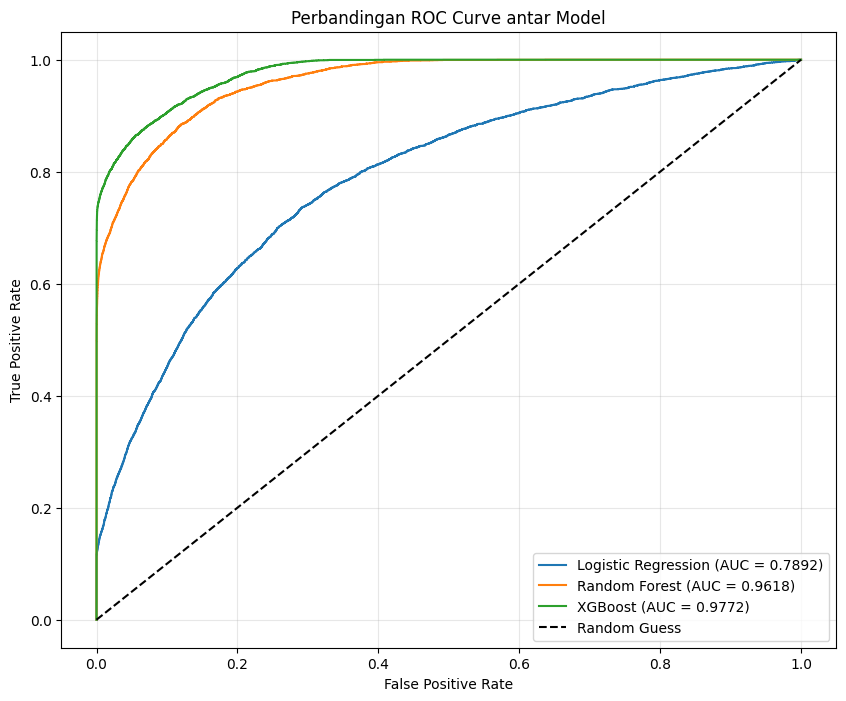

In [104]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# 1. Inisialisasi Model dalam Dictionary
# Kita simpan model dalam dictionary agar mudah di-looping
models = {
    "Logistic Regression": LogisticRegression(random_state=42, solver='liblinear'),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, n_jobs=-1)
}

# DataFrame untuk menyimpan hasil evaluasi
results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'])

# Dictionary untuk menyimpan probabilitas (untuk plotting kurva ROC nanti)
probas = {}

print("Mulai pelatihan model perbandingan...")

# 2. Looping untuk Training dan Evaluasi
for name, model in models.items():
    print(f"\nSedang melatih {name}...")

    # Train model menggunakan data SMOTE (X_train_res)
    model.fit(X_train_res, y_train_res)

    # Prediksi ke data Test (X_test_scaled)
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1] # Ambil probabilitas kelas 1

    # Simpan probabilitas untuk plot
    probas[name] = y_prob

    # Hitung Metrik
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)

    # Masukkan ke DataFrame (menggunakan pd.concat karena .append sudah deprecated)
    new_row = pd.DataFrame([{
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1,
        'ROC-AUC': auc
    }])
    results_df = pd.concat([results_df, new_row], ignore_index=True)

print("\n--- Hasil Perbandingan Model ---")
# Urutkan berdasarkan ROC-AUC tertinggi
display(results_df.sort_values(by='ROC-AUC', ascending=False))

# 3. Visualisasi Perbandingan ROC Curve
plt.figure(figsize=(10, 8))

for name, y_prob in probas.items():
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.4f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Perbandingan ROC Curve antar Model')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()